# Pendahuluan

## Judul:


Efektifitas Diskon Pada Penjualan Produk di E-commerce

## Problem Statement:


Suatu e-commerce ingin melihat efektifitas diskon pada sales produk2

## Objektif:

Melihat pengaruh Diskon pada peningkatan sales/penjualan suatu produk

## Dijelaskan

### TEAM TRX

di final project guideline https://drive.google.com/file/d/1rNf_NBSods4WdQMZIEjbVfRgPSAuMQ55/view

Setiap tim hanya diperbolehkan mengerjakan 4 provinsi yang ada di Team Trx
Data supaya data tidak terlalu besar dan unique setiap tim, 2 level saling
berdekatan untuk melihat efek spasial.



Sebagai Tim 26B, kita tim nomor 102

level 1 = 33
level 2 = 16
level 3 = 17
level 4 = 81

### Revisi

Sudah replace data lama (https://drive.google.com/file/d/1-xTSpkU5joEFftCPyrM0o9Ek3hh2Zc1k/view) dengan data revisi (https://drive.google.com/drive/folders/1GBmk0hYD5vNTnNo_Rsjay4k-gLAx7aI4)

### Karena Dummy Data

Dikarenakan Dataset ini berupa dummy data, maka dataset ini kita anggap Cut of Time adalah akhir tahun 2024 (31-12-2024)  

## Yang Diperlukan

FS memerlukan Gender untuk di Encoding

# Loading Data

## Load Library

In [ ]:
import pandas as pd
import glob
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

%matplotlib inline

## Load Data

In [ ]:
#gsheet file import ke Google Colab
from google.colab import drive

In [ ]:
#Menghubungkan Google Drive dengan Colab
drive.mount('/content/drive')

Mounted at /content/drive


### loc_ref

In [ ]:
# Membaca file CSV ke DataFrame menggunakan Pandas
df_loc_ref = pd.read_csv('/content/drive/MyDrive/Tim 26B Final Project Drive/Pengerjaan Final Project/dataset-1/location_reference.csv')

#### Ubah tipe data kolom 'kode provinsi' pada df_loc_ref menjadi object

In [ ]:
df_loc_ref['kode provinsi'] = df_loc_ref['kode provinsi'].astype(str)

### prod_ref

In [ ]:
df_prod_ref = pd.read_csv('/content/drive/MyDrive/Tim 26B Final Project Drive/Pengerjaan Final Project/dataset-1/product_reference.csv', delimiter=';')

### user

In [ ]:
df_user = pd.read_csv('/content/drive/MyDrive/Tim 26B Final Project Drive/Pengerjaan Final Project/dataset-1/user.csv')

### TRX

#### melihat ukuran baris setiap csv

#### Add Location Tag to TRX (Feature Engineering)

In [ ]:
# Daftar semua file csv
files = ['/content/drive/MyDrive/Tim 26B Final Project Drive/Pengerjaan Final Project/dataset-1/trx/16_processed.csv',
         '/content/drive/MyDrive/Tim 26B Final Project Drive/Pengerjaan Final Project/dataset-1/trx/17_processed.csv',
         '/content/drive/MyDrive/Tim 26B Final Project Drive/Pengerjaan Final Project/dataset-1/trx/33_processed.csv',
         '/content/drive/MyDrive/Tim 26B Final Project Drive/Pengerjaan Final Project/dataset-1/trx/81_processed.csv']

# Inisialisasi list kosong untuk menyimpan semua dataframe
df_list = []

# Loop melalui semua file
for file in files:
    # Membaca file csv ke dalam dataframe
    df = pd.read_csv(file)

    # Mendapatkan dua karakter pertama dari nama file
    kode_provinsi = file.split('/')[-1][:2]

    # Menambahkan kolom baru 'location_code' ke dataframe
    df['kode provinsi'] = kode_provinsi

    # Menambahkan dataframe ke list
    df_list.append(df)

#### Merge TRX

In [ ]:
# Menggabungkan semua dataframe menjadi satu
df_trx = pd.concat(df_list, ignore_index=True)

# Data Understanding

## location_reference.csv

location_reference.csv: Menyediakan rinci lokasi geografis yang penting untuk
analisis regional.

In [ ]:
df_loc_ref.head()

,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
0,GORONTALO,75,BOALEMO,7502,BOTUMOITO,750206
1,GORONTALO,75,BOALEMO,7502,DULUPI,750203
2,GORONTALO,75,BOALEMO,7502,MANANGGU,750205
3,GORONTALO,75,BOALEMO,7502,PAGUYAMAN,750201
4,GORONTALO,75,BOALEMO,7502,PAGUYAMAN PANTAI,750207


Keterangan :
*   nama provinsi  = Nama suatu provinsi
*   kode provinsi  = Kode untuk nama provinsi
*   nama kabupaten = Nama suatu kabupaten
*   kode kabupaten = Kode untuk nama kabupaten
*   nama kecamatan = Nama suatu kecamatan
*   kode kecamatan = Kode untuk nama kecamatan


#### Tipe Data

In [ ]:
df_loc_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7407 entries, 0 to 7406
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nama provinsi   7407 non-null   object
 1   kode provinsi   7407 non-null   object
 2   nama kabupaten  7407 non-null   object
 3   kode kabupaten  7407 non-null   object
 4   nama kecamatan  7407 non-null   object
 5   kode kecamatan  7407 non-null   object
dtypes: object(6)
memory usage: 347.3+ KB


#### Jumlah Baris & Kolom

In [ ]:
print("\nJumlah baris dan kolom:")
print("Jumlah baris:", df_loc_ref.shape[0])
print("Jumlah kolom:", df_loc_ref.shape[1])


Jumlah baris dan kolom:
Jumlah baris: 7407
Jumlah kolom: 6


#### Deskripsi Data

In [ ]:
# sebaran data
df_loc_ref.describe()

,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
count,7407,7407,7407,7407,7407,7407
unique,39,39,643,643,7026,7405
top,JAWA TIMUR,35,YAHUKIMO,9503,KARANGANYAR,650103
freq,666,666,51,51,6,2


## product_reference.csv

product_reference.csv: Menawarkan gambaran lengkap tentang jajaran
produk, yang vital untuk menghubungkan preferensi regional dengan tawaran
spesifik.

In [ ]:
df_prod_ref.head()

,id,product name
0,1,Man Fashion
1,2,Woman Fashion
2,3,Food & Drink
3,4,Ride Hailing
4,5,Keperluan Rumah Tangga


Keterangan :
*   Id           = Kode untuk product (unique)
*   product name = Nama produk



#### Tipe Data

In [ ]:
df_prod_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            18 non-null     int64 
 1   product name  18 non-null     object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


#### Jumlah Baris & Kolom

In [ ]:
print("\nJumlah baris dan kolom:")
print("Jumlah baris:", df_loc_ref.shape[0])
print("Jumlah kolom:", df_loc_ref.shape[1])


Jumlah baris dan kolom:
Jumlah baris: 7407
Jumlah kolom: 6


#### Deskripsi Data

In [ ]:
# sebaran data
df_prod_ref.describe()

,id
count,18.000000
mean,9.500000
std,5.338539
min,1.000000
25%,5.250000
50%,9.500000
75%,13.750000
max,18.000000


## user.csv

user.csv: Berisi informasi terperinci mengenai pengguna, meliputi data
demografis dan riwayat transaksi yang membantu memahami perilaku
pengguna.

In [ ]:
df_user.head()

,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth
0,SC7502062007001,PRIYANTI FIORI,perempuan,2270000.0,130000.0,480000.0,2023-11-05,1984-07-25
1,SC7502062007002,KURNIA MUHAMAD WANIMBO,laki-laki,2370000.0,140000.0,500000.0,2023-12-27,1991-02-12
2,SC7502062007003,AJENG LESTARI,perempuan,0.0,0.0,0.0,2024-07-19,1982-06-18
3,SC7502062007004,TIA IRIANI S.E.,perempuan,0.0,0.0,0.0,2024-05-24,1972-09-27
4,SC7502062006001,ANCE,perempuan,0.0,0.0,0.0,2024-11-25,1992-06-11


Keterangan :   
*   id = No id user (unique)
*   full Name = Nama lengkap user
*   gender = Jenis kelamin user
*   money_spent = total uang yang dibelanjakan user
*   refund = uang yang direfund user
*   wallet_balance = sisa uang di wallet user
*   join_date = tanggal user join
*   birth = tanggal lahir user

#### Tipe Data

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427486 entries, 0 to 427485
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              427486 non-null  object 
 1   full_name       427486 non-null  object 
 2   gender          427486 non-null  object 
 3   money_spent     427484 non-null  float64
 4   refund          427484 non-null  float64
 5   wallet_balance  427484 non-null  float64
 6   join_date       427486 non-null  object 
 7   birth           427486 non-null  object 
dtypes: float64(3), object(5)
memory usage: 26.1+ MB


#### Jumlah Baris & Kolom

In [ ]:
print("\nJumlah baris dan kolom:")
print("Jumlah baris:", df_user.shape[0])
print("Jumlah kolom:", df_user.shape[1])


Jumlah baris dan kolom:
Jumlah baris: 427486
Jumlah kolom: 8


#### Deskripsi Data

In [ ]:
df_user.describe()

,money_spent,refund,wallet_balance
count,4.274840e+05,4.274840e+05,4.274840e+05
mean,1.808423e+06,2.378728e+05,6.203909e+05
std,4.962408e+05,4.171056e+07,2.947369e+06
min,0.000000e+00,-1.995000e+07,-1.962000e+07
25%,1.610000e+06,8.000000e+04,4.200000e+05
50%,1.870000e+06,1.500000e+05,6.000000e+05
75%,2.090000e+06,2.400000e+05,7.700000e+05
max,2.273000e+07,2.727112e+10,1.280390e+09


## TRX

Trx folder: Catatan historis transaksi yang mendetail memungkinkan analisis tren
pembelian dan pengaruh promosi.

In [ ]:
df_trx.head()

,id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi
0,TRX406919,SC1607192015001,1,97700.0,NaN,2024-02-29,16
1,TRX406920,SC1607192015001,1,42300.0,40000.0,2024-07-28,16
2,TRX406921,SC1607192015001,2,68600.0,NaN,2024-03-24,16
3,TRX406922,SC1607192015001,2,57900.0,NaN,2024-01-30,16
4,TRX406923,SC1607192015001,2,53500.0,53500.0,2024-12-25,16


Keterangan :    
*   id = Kode transaksi (unique)
*   user_id = Kode user (unique)
*   product Id = Kode untuk product (unique)
*   gross_amount = pengekuaran explore
*   tranction date = tanggal ada issue
*   kode provinsi  = Kode untuk nama provinsi








In [ ]:
df_trx.tail()

,id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi
2752972,TRX720839,SC8105142002002,8,1000.0,NaN,2024-04-14,81
2752973,TRX720840,SC8105142002002,12,31700.0,NaN,2024-02-14,81
2752974,TRX720841,SC8105142002002,12,134900.0,NaN,2024-12-07,81
2752975,TRX720842,SC8105142002002,12,128100.0,NaN,2024-12-30,81
2752976,TRX720843,SC8105142002002,12,305300.0,NaN,2024-07-14,81


### Tipe Data

In [ ]:
df_trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752977 entries, 0 to 2752976
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                object 
 1   user_id           object 
 2   product_id        int64  
 3   gross_amount      float64
 4   discounts         float64
 5   transaction_date  object 
 6   kode provinsi     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 147.0+ MB


### Jumlah baris & Kolom

In [ ]:
print("\nJumlah baris dan kolom:")
print("Jumlah baris:", df_trx.shape[0])
print("Jumlah kolom:", df_trx.shape[1])


Jumlah baris dan kolom:
Jumlah baris: 2752977
Jumlah kolom: 7


### Deskripsi Data

In [ ]:
df_trx.describe()

,product_id,gross_amount,discounts
count,2.752977e+06,2.736907e+06,8.456400e+05
mean,8.128736e+00,5.681348e+04,3.047355e+04
std,5.465211e+00,9.737621e+04,4.146824e+04
min,1.000000e+00,-1.000000e+02,-1.000000e+02
25%,3.000000e+00,6.400000e+03,8.400000e+03
50%,7.000000e+00,2.050000e+04,1.730000e+04
75%,1.400000e+01,6.400000e+04,3.880000e+04
max,1.800000e+01,2.622800e+06,1.571300e+06


# Data Preparation

## resolve missing value

### loc_ref

In [ ]:
# berapa null
df_loc_ref.isnull().sum()

nama provinsi     0
kode provinsi     0
nama kabupaten    0
kode kabupaten    0
nama kecamatan    0
kode kecamatan    0
dtype: int64

### prod_ref

In [ ]:
# berapa null
df_prod_ref.isnull().sum()

id              0
product name    0
dtype: int64

### user

In [ ]:
# berapa null
df_user.isnull().sum()

id                0
full_name         0
gender            0
money_spent       2
refund            2
wallet_balance    2
join_date         0
birth             0
dtype: int64

Menghitung mean untuk setiap kolom


In [ ]:
mean_money_spent = df_user['money_spent'].mean()
mean_refund = df_user['refund'].mean()
mean_wallet_balance = df_user['wallet_balance'].mean()

Mengisi nilai yang hilang dengan mean

In [ ]:
df_user['money_spent'].fillna(mean_money_spent, inplace=True)
df_user['refund'].fillna(mean_refund, inplace=True)
df_user['wallet_balance'].fillna(mean_wallet_balance, inplace=True)

In [ ]:
# berapa null
df_user.isnull().sum()

id                0
full_name         0
gender            0
money_spent       0
refund            0
wallet_balance    0
join_date         0
birth             0
dtype: int64

### TRX

In [ ]:
# berapa null
df_trx.isnull().sum()

id                        0
user_id                   0
product_id                0
gross_amount          16070
discounts           1907337
transaction_date          0
kode provinsi             0
dtype: int64

menganggap kalau

'gross_amount' = null

itu berarti transaksi tidak jadi (batal)

#### gross_amount

In [ ]:
# Menghapus baris di mana 'gross_amount' adalah null
df_trx = df_trx.dropna(subset=['gross_amount'])

In [ ]:
df_trx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736907 entries, 0 to 2752976
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                object 
 1   user_id           object 
 2   product_id        int64  
 3   gross_amount      float64
 4   discounts         float64
 5   transaction_date  object 
 6   kode provinsi     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 167.0+ MB


In [ ]:
# berapa null
df_trx.isnull().sum()

id                        0
user_id                   0
product_id                0
gross_amount              0
discounts           1891267
transaction_date          0
kode provinsi             0
dtype: int64

#### discounts

In [ ]:
# Mengisi nilai null di 'discounts' dengan 0
df_trx['discounts'].fillna(0, inplace=True)

In [ ]:
# berapa null
df_trx.isnull().sum()

id                  0
user_id             0
product_id          0
gross_amount        0
discounts           0
transaction_date    0
kode provinsi       0
dtype: int64

## resolves duplicate value

### loc_ref

In [ ]:
df_loc_ref.duplicated().sum()

2

In [ ]:
df_loc_ref = df_loc_ref.drop_duplicates()

In [ ]:
df_loc_ref.duplicated().sum()

0

### prod_ref

In [ ]:
df_prod_ref.duplicated().sum()

0

### user

In [ ]:
df_user.duplicated().sum()

0

### TRX

In [ ]:
df_trx.duplicated().sum()

0

## handling outliers

### loc_ref

In [ ]:
# tidak mungkin ada outlier, karena ini kode loc_ref

### prod_ref

In [ ]:
# tidak mungkin ada outlier, karena ini kode prod_ref

### user

#### deteksi Outlier data numerik menggunakan IQR

In [ ]:
# Import library yang diperlukan lagi untuk redundancy agar modular
import numpy as np

##### Kolom 'money_spent'

In [ ]:
P33 = df_user['money_spent'].quantile(0.25)
P17 = df_user['money_spent'].quantile(0.75)
IQR = P17 - P33
lower_bound = P33 - 1.5 * IQR
upper_bound = P17 + 1.5 * IQR

before

In [ ]:
outliers_money_spent = df_user[(df_user['money_spent'] < lower_bound) | (df_user['money_spent'] > upper_bound)]
print(f"Jumlah outlier untuk 'money_spent': {len(outliers_money_spent)}")

Jumlah outlier untuk 'money_spent': 16385


In [ ]:
df_user['money_spent'] = df_user['money_spent'].mask(df_user['money_spent'] > upper_bound, upper_bound)
df_user['money_spent'] = df_user['money_spent'].mask(df_user['money_spent'] < lower_bound, lower_bound)

***keterangan yang dilakukan***

after

In [ ]:
outliers_money_spent = df_user[(df_user['money_spent'] < lower_bound) | (df_user['money_spent'] > upper_bound)]
print(f"Jumlah outlier untuk 'money_spent': {len(outliers_money_spent)}")

Jumlah outlier untuk 'money_spent': 0


##### Kolom 'refund'

In [ ]:
P33 = df_user['refund'].quantile(0.25)
P17 = df_user['refund'].quantile(0.75)
IQR = P17 - P33
lower_bound = P33 - 1.5 * IQR
upper_bound = P17 + 1.5 * IQR

In [ ]:
outliers_refund = df_user[(df_user['refund'] < lower_bound) | (df_user['refund'] > upper_bound)]
print(f"Jumlah outlier untuk 'refund': {len(outliers_refund)}")

Jumlah outlier untuk 'refund': 13064


In [ ]:
df_user['refund'] = df_user['refund'].mask(df_user['refund'] > upper_bound, upper_bound)
df_user['refund'] = df_user['refund'].mask(df_user['refund'] < lower_bound, lower_bound)

In [ ]:
outliers_refund = df_user[(df_user['refund'] < lower_bound) | (df_user['refund'] > upper_bound)]
print(f"Jumlah outlier untuk 'refund': {len(outliers_refund)}")

Jumlah outlier untuk 'refund': 0


##### Kolom 'wallet_balance'

In [ ]:
P33 = df_user['wallet_balance'].quantile(0.25)
P17 = df_user['wallet_balance'].quantile(0.75)
IQR = P17 - P33
lower_bound = P33 - 1.5 * IQR
upper_bound = P17 + 1.5 * IQR

In [ ]:
outliers_wallet_balance = df_user[(df_user['wallet_balance'] < lower_bound) | (df_user['wallet_balance'] > upper_bound)]
print(f"Jumlah outlier untuk 'wallet_balance': {len(outliers_wallet_balance)}")

Jumlah outlier untuk 'wallet_balance': 11781


In [ ]:
df_user['wallet_balance'] = df_user['wallet_balance'].mask(df_user['wallet_balance'] > upper_bound, upper_bound)
df_user['wallet_balance'] = df_user['wallet_balance'].mask(df_user['wallet_balance'] < lower_bound, lower_bound)

In [ ]:
outliers_wallet_balance = df_user[(df_user['wallet_balance'] < lower_bound) | (df_user['wallet_balance'] > upper_bound)]
print(f"Jumlah outlier untuk 'wallet_balance': {len(outliers_wallet_balance)}")

Jumlah outlier untuk 'wallet_balance': 0


#### ‘join_date’ dan ‘birth’ yang berupa date

Fitur ‘join_date’ dan ‘birth’ yang merupakan tanggal, pendekatan untuk mendeteksi outlier mungkin berbeda dan tergantung pada konteks data Anda. Misalnya, jika ‘birth’ jauh lebih awal dari yang diharapkan (misalnya, sebelum tahun 1900) atau ‘join_date’ di masa depan, itu bisa dianggap sebagai outlier.

Join Date paling sekarang dianggap bisa sampai akhir tahun 2024, karna data ini berupa dummy data

In [ ]:
# Ubah kolom 'birth' dan 'join_date' menjadi tipe data datetime
df_user['birth'] = pd.to_datetime(df_user['birth'])
df_user['join_date'] = pd.to_datetime(df_user['join_date'])

# Mendefinisikan batas untuk outlier
birth_lower_bound = pd.Timestamp(year=1945, month=1, day=1) # kelahiran paling tua
join_date_upper_bound = pd.Timestamp(year=2024, month=12, day=31) # join paling sekarang

# Mendeteksi outlier
birth_outliers = df_user[df_user['birth'] < birth_lower_bound]
join_date_outliers = df_user[df_user['join_date'] > join_date_upper_bound]

print(f"Jumlah outlier untuk 'birth': {len(birth_outliers)}")
print(f"Jumlah outlier untuk 'join_date': {len(join_date_outliers)}")

Jumlah outlier untuk 'birth': 0
Jumlah outlier untuk 'join_date': 0


Diketahui bahwa ternyata dari awal sudah bersih

### TRX

In [ ]:
df_trx

,id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi
0,TRX406919,SC1607192015001,1,97700.0,0.0,2024-02-29,16
1,TRX406920,SC1607192015001,1,42300.0,40000.0,2024-07-28,16
2,TRX406921,SC1607192015001,2,68600.0,0.0,2024-03-24,16
3,TRX406922,SC1607192015001,2,57900.0,0.0,2024-01-30,16
4,TRX406923,SC1607192015001,2,53500.0,53500.0,2024-12-25,16
...,...,...,...,...,...,...,...
2752972,TRX720839,SC8105142002002,8,1000.0,0.0,2024-04-14,81
2752973,TRX720840,SC8105142002002,12,31700.0,0.0,2024-02-14,81
2752974,TRX720841,SC8105142002002,12,134900.0,0.0,2024-12-07,81
2752975,TRX720842,SC8105142002002,12,128100.0,0.0,2024-12-30,81


#### Kolom user_id

bisa dibandingkan dengan df_user, jika 'user_id' di df diatas ada yang tidak tertera di df_user, maka outlier

#### Kolom gross_amount

In [ ]:
P33 = df_trx['gross_amount'].quantile(0.25)
P17 = df_trx['gross_amount'].quantile(0.75)
IQR = P17 - P33
lower_bound = P33 - 1.5 * IQR
upper_bound = P17 + 1.5 * IQR

In [ ]:
outliers_gross_amount = df_trx[(df_trx['gross_amount'] < lower_bound) | (df_trx['gross_amount'] > upper_bound)]
print(f"Jumlah outlier untuk 'gross_amount': {len(outliers_gross_amount)}")

Jumlah outlier untuk 'gross_amount': 275338


In [ ]:
df_trx['gross_amount'] = df_trx['gross_amount'].mask(df_trx['gross_amount'] > upper_bound, upper_bound)
df_trx['gross_amount'] = df_trx['gross_amount'].mask(df_trx['gross_amount'] < lower_bound, lower_bound)

In [ ]:
outliers_gross_amount = df_trx[(df_trx['gross_amount'] < lower_bound) | (df_trx['gross_amount'] > upper_bound)]
print(f"Jumlah outlier untuk 'gross_amount': {len(outliers_gross_amount)}")

Jumlah outlier untuk 'gross_amount': 0


#### Kolom discounts

In [ ]:
P33 = df_trx['discounts'].quantile(0.25)
P17 = df_trx['discounts'].quantile(0.75)
IQR = P17 - P33
lower_bound = P33 - 1.5 * IQR
upper_bound = P17 + 1.5 * IQR

In [ ]:
outliers_discounts = df_trx[(df_trx['discounts'] < lower_bound) | (df_trx['discounts'] > upper_bound)]
print(f"Jumlah outlier untuk 'discounts': {len(outliers_discounts)}")

Jumlah outlier untuk 'discounts': 434558


In [ ]:
df_trx['discounts'] = df_trx['discounts'].mask(df_trx['discounts'] > upper_bound, upper_bound)
df_trx['discounts'] = df_trx['discounts'].mask(df_trx['discounts'] < lower_bound, lower_bound)

In [ ]:
outliers_discounts = df_trx[(df_trx['discounts'] < lower_bound) | (df_trx['discounts'] > upper_bound)]
print(f"Jumlah outlier untuk 'discounts': {len(outliers_discounts)}")

Jumlah outlier untuk 'discounts': 0


#### Kolom transaction_date

In [ ]:
# Ubah kolom 'transaction_date' menjadi tipe data datetime
df_trx['transaction_date'] = pd.to_datetime(df_trx['transaction_date'])

# Mendefinisikan batas untuk outlier
transaction_upper_bound = pd.Timestamp(year=2024, month=12, day=31) # transaksi paling terbaru
transaction_lower_bound = pd.Timestamp(year=2000, month=1, day=1) # transaksi paling lama

# Mendeteksi outlier
transaction_date_outliers = df_trx[(df_trx['transaction_date'] < transaction_lower_bound) | (df_trx['transaction_date'] > transaction_upper_bound)]

print(f"Jumlah outlier untuk 'join_date': {len(transaction_date_outliers)}")

Jumlah outlier untuk 'join_date': 0


## resolve imbalance data

### loc_ref

In [ ]:
df_loc_ref

,nama provinsi,kode provinsi,nama kabupaten,kode kabupaten,nama kecamatan,kode kecamatan
0,GORONTALO,75,BOALEMO,7502,BOTUMOITO,750206
1,GORONTALO,75,BOALEMO,7502,DULUPI,750203
2,GORONTALO,75,BOALEMO,7502,MANANGGU,750205
3,GORONTALO,75,BOALEMO,7502,PAGUYAMAN,750201
4,GORONTALO,75,BOALEMO,7502,PAGUYAMAN PANTAI,750207
...,...,...,...,...,...,...
7402,SUMATERA UTARA,12,TOBA,1212,SIANTAR NARUMONDA,121220
7403,SUMATERA UTARA,12,TOBA,1212,SIGUMPAR,121219
7404,SUMATERA UTARA,12,TOBA,1212,SILAEN,121203
7405,SUMATERA UTARA,12,TOBA,1212,TAMPAHAN,121222


karena ini list location reference code, maka pasti aman dari imbalance

### prod_ref

In [ ]:
df_prod_ref

,id,product name
0,1,Man Fashion
1,2,Woman Fashion
2,3,Food & Drink
3,4,Ride Hailing
4,5,Keperluan Rumah Tangga
5,6,Travel
6,7,Keperluan Anak
7,8,Elektronik
8,9,Other
9,10,"Transportasi (Kereta, Pesawat, Kapal)"


karena ini list product reference code, maka pasti aman dari imbalance

### user

In [ ]:
df_user

,id,full_name,gender,money_spent,refund,wallet_balance,join_date,birth
0,SC7502062007001,PRIYANTI FIORI,perempuan,2270000.0,130000.0,480000.0,2023-11-05,1984-07-25
1,SC7502062007002,KURNIA MUHAMAD WANIMBO,laki-laki,2370000.0,140000.0,500000.0,2023-12-27,1991-02-12
2,SC7502062007003,AJENG LESTARI,perempuan,890000.0,0.0,0.0,2024-07-19,1982-06-18
3,SC7502062007004,TIA IRIANI S.E.,perempuan,890000.0,0.0,0.0,2024-05-24,1972-09-27
4,SC7502062006001,ANCE,perempuan,890000.0,0.0,0.0,2024-11-25,1992-06-11
...,...,...,...,...,...,...,...,...
427481,SC1212102018001,ACHMAD,laki-laki,1040000.0,60000.0,360000.0,2023-10-14,1982-10-20
427482,SC1212102018004,AJIE AHMAD Masykur,laki-laki,1510000.0,60000.0,550000.0,2023-12-04,1997-08-03
427483,SC1212102008001,WIWIN WAHYUNI,perempuan,2120000.0,100000.0,800000.0,2023-12-10,1978-12-17
427484,SC1212102010001,NYIMAS,perempuan,1700000.0,50000.0,490000.0,2023-10-18,1993-04-04


Karna fitur target tidak ada di table user, maka semua fitur disini aman

### TRX

In [ ]:
df_trx

,id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi
0,TRX406919,SC1607192015001,1,97700.0,0.0,2024-02-29,16
1,TRX406920,SC1607192015001,1,42300.0,16250.0,2024-07-28,16
2,TRX406921,SC1607192015001,2,68600.0,0.0,2024-03-24,16
3,TRX406922,SC1607192015001,2,57900.0,0.0,2024-01-30,16
4,TRX406923,SC1607192015001,2,53500.0,16250.0,2024-12-25,16
...,...,...,...,...,...,...,...
2752972,TRX720839,SC8105142002002,8,1000.0,0.0,2024-04-14,81
2752973,TRX720840,SC8105142002002,12,31700.0,0.0,2024-02-14,81
2752974,TRX720841,SC8105142002002,12,134900.0,0.0,2024-12-07,81
2752975,TRX720842,SC8105142002002,12,128100.0,0.0,2024-12-30,81


In [ ]:
df_trx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736907 entries, 0 to 2752976
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                object        
 1   user_id           object        
 2   product_id        int64         
 3   gross_amount      float64       
 4   discounts         float64       
 5   transaction_date  datetime64[ns]
 6   kode provinsi     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 167.0+ MB


## Feature engineering

### Merge loc_ref & prod_ref & user

Untuk memudahkan, kita merge loc_ref & prod_ref & user

In [ ]:
df = pd.merge(df_trx, df_prod_ref, left_on='product_id', right_on='id', how='left')

In [ ]:
df = df.drop('id_y', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736907 entries, 0 to 2736906
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id_x              object        
 1   user_id           object        
 2   product_id        int64         
 3   gross_amount      float64       
 4   discounts         float64       
 5   transaction_date  datetime64[ns]
 6   kode provinsi     object        
 7   product name      object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 167.0+ MB


In [ ]:
df = pd.merge(df, df_user, left_on='user_id', right_on='id', how='left')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736907 entries, 0 to 2736906
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id_x              object        
 1   user_id           object        
 2   product_id        int64         
 3   gross_amount      float64       
 4   discounts         float64       
 5   transaction_date  datetime64[ns]
 6   kode provinsi     object        
 7   product name      object        
 8   id                object        
 9   full_name         object        
 10  gender            object        
 11  money_spent       float64       
 12  refund            float64       
 13  wallet_balance    float64       
 14  join_date         datetime64[ns]
 15  birth             datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(1), object(7)
memory usage: 334.1+ MB


In [ ]:
df = df.drop('id', axis=1)
df = df.rename(columns={'id_x': 'transaction_id'})

In [ ]:
df.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,money_spent,refund,wallet_balance,join_date,birth
0,TRX406919,SC1607192015001,1,97700.0,0.0,2024-02-29,16,Man Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20
1,TRX406920,SC1607192015001,1,42300.0,16250.0,2024-07-28,16,Man Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20
2,TRX406921,SC1607192015001,2,68600.0,0.0,2024-03-24,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20
3,TRX406922,SC1607192015001,2,57900.0,0.0,2024-01-30,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20
4,TRX406923,SC1607192015001,2,53500.0,16250.0,2024-12-25,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20


untuk mengefisienkan line ini

df = pd.merge(df, df_loc_ref[['kode provinsi', 'nama provinsi']], on='kode provinsi', how='left')

maka kita gunakan code dibawah ini

In [ ]:
# Membuat kamus pemetaan
provinsi_mapping = df_loc_ref.set_index('kode provinsi')['nama provinsi'].to_dict()

In [ ]:
# Mengubah 'kode provinsi' menjadi 'nama provinsi'
df['nama_provinsi'] = df['kode provinsi'].map(provinsi_mapping)

In [ ]:
df.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,nama_provinsi
0,TRX406919,SC1607192015001,1,97700.0,0.0,2024-02-29,16,Man Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN
1,TRX406920,SC1607192015001,1,42300.0,16250.0,2024-07-28,16,Man Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN
2,TRX406921,SC1607192015001,2,68600.0,0.0,2024-03-24,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN
3,TRX406922,SC1607192015001,2,57900.0,0.0,2024-01-30,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN
4,TRX406923,SC1607192015001,2,53500.0,16250.0,2024-12-25,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736907 entries, 0 to 2736906
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_id    object        
 1   user_id           object        
 2   product_id        int64         
 3   gross_amount      float64       
 4   discounts         float64       
 5   transaction_date  datetime64[ns]
 6   kode provinsi     object        
 7   product name      object        
 8   full_name         object        
 9   gender            object        
 10  money_spent       float64       
 11  refund            float64       
 12  wallet_balance    float64       
 13  join_date         datetime64[ns]
 14  birth             datetime64[ns]
 15  nama_provinsi     object        
dtypes: datetime64[ns](3), float64(5), int64(1), object(7)
memory usage: 334.1+ MB


### Membuat Feature is_discounted

In [ ]:
df['is_discounted'] = df['discounts'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,nama_provinsi,is_discounted
0,TRX406919,SC1607192015001,1,97700.0,0.0,2024-02-29,16,Man Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0
1,TRX406920,SC1607192015001,1,42300.0,16250.0,2024-07-28,16,Man Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,1
2,TRX406921,SC1607192015001,2,68600.0,0.0,2024-03-24,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0
3,TRX406922,SC1607192015001,2,57900.0,0.0,2024-01-30,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0
4,TRX406923,SC1607192015001,2,53500.0,16250.0,2024-12-25,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736907 entries, 0 to 2736906
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_id    object        
 1   user_id           object        
 2   product_id        int64         
 3   gross_amount      float64       
 4   discounts         float64       
 5   transaction_date  datetime64[ns]
 6   kode provinsi     object        
 7   product name      object        
 8   full_name         object        
 9   gender            object        
 10  money_spent       float64       
 11  refund            float64       
 12  wallet_balance    float64       
 13  join_date         datetime64[ns]
 14  birth             datetime64[ns]
 15  nama_provinsi     object        
 16  is_discounted     int64         
dtypes: datetime64[ns](3), float64(5), int64(2), object(7)
memory usage: 355.0+ MB


### Membuat Feature nett_amount

In [ ]:
df['nett_amount'] = df['gross_amount'] - df['discounts']

In [ ]:
df.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,nama_provinsi,is_discounted,nett_amount
0,TRX406919,SC1607192015001,1,97700.0,0.0,2024-02-29,16,Man Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0,97700.0
1,TRX406920,SC1607192015001,1,42300.0,16250.0,2024-07-28,16,Man Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,1,26050.0
2,TRX406921,SC1607192015001,2,68600.0,0.0,2024-03-24,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0,68600.0
3,TRX406922,SC1607192015001,2,57900.0,0.0,2024-01-30,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0,57900.0
4,TRX406923,SC1607192015001,2,53500.0,16250.0,2024-12-25,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,1,37250.0


### Membuat Feature free_gift

In [ ]:
df['free_gift'] = df['nett_amount'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
df.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,nama_provinsi,is_discounted,nett_amount,free_gift
0,TRX406919,SC1607192015001,1,97700.0,0.0,2024-02-29,16,Man Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0,97700.0,0
1,TRX406920,SC1607192015001,1,42300.0,16250.0,2024-07-28,16,Man Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,1,26050.0,0
2,TRX406921,SC1607192015001,2,68600.0,0.0,2024-03-24,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0,68600.0,0
3,TRX406922,SC1607192015001,2,57900.0,0.0,2024-01-30,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0,57900.0,0
4,TRX406923,SC1607192015001,2,53500.0,16250.0,2024-12-25,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,1,37250.0,0


### Membuat Feature age

In [ ]:
# Calculate age
df['age'] = (pd.Timestamp('2024-12-31') - df['birth']).dt.days // 365

In [ ]:
df.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,money_spent,refund,wallet_balance,join_date,birth,nama_provinsi,is_discounted,nett_amount,free_gift,age
0,TRX406919,SC1607192015001,1,97700.0,0.0,2024-02-29,16,Man Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0,97700.0,0,33
1,TRX406920,SC1607192015001,1,42300.0,16250.0,2024-07-28,16,Man Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,1,26050.0,0,33
2,TRX406921,SC1607192015001,2,68600.0,0.0,2024-03-24,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0,68600.0,0,33
3,TRX406922,SC1607192015001,2,57900.0,0.0,2024-01-30,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0,57900.0,0,33
4,TRX406923,SC1607192015001,2,53500.0,16250.0,2024-12-25,16,Woman Fashion,Z. H.,laki-laki,1370000.0,140000.0,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,1,37250.0,0,33


### Membuat Feature lama_menjadi_member

In [ ]:
df['days_since_joined'] = (pd.Timestamp('2024-12-31') - df['join_date']).dt.days

### Burn Rate

Burn Rate adalah uang yang dibakar untuk diskon

In [ ]:
# Hitung burn rate percentage
df['burn_rate_percentage'] = (df['discounts'] / df['gross_amount']) * 100

In [ ]:
df

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,wallet_balance,join_date,birth,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage
0,TRX406919,SC1607192015001,1,97700.0,0.0,2024-02-29,16,Man Fashion,Z. H.,laki-laki,...,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0,97700.0,0,33,389,0.000000
1,TRX406920,SC1607192015001,1,42300.0,16250.0,2024-07-28,16,Man Fashion,Z. H.,laki-laki,...,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,1,26050.0,0,33,389,38.416076
2,TRX406921,SC1607192015001,2,68600.0,0.0,2024-03-24,16,Woman Fashion,Z. H.,laki-laki,...,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0,68600.0,0,33,389,0.000000
3,TRX406922,SC1607192015001,2,57900.0,0.0,2024-01-30,16,Woman Fashion,Z. H.,laki-laki,...,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,0,57900.0,0,33,389,0.000000
4,TRX406923,SC1607192015001,2,53500.0,16250.0,2024-12-25,16,Woman Fashion,Z. H.,laki-laki,...,470000.0,2023-12-08,1991-04-20,SUMATERA SELATAN,1,37250.0,0,33,389,30.373832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736902,TRX720839,SC8105142002002,8,1000.0,0.0,2024-04-14,81,Elektronik,EVELINDA,perempuan,...,610000.0,2023-11-25,1976-07-02,MALUKU,0,1000.0,0,48,402,0.000000
2736903,TRX720840,SC8105142002002,12,31700.0,0.0,2024-02-14,81,Otomotif,EVELINDA,perempuan,...,610000.0,2023-11-25,1976-07-02,MALUKU,0,31700.0,0,48,402,0.000000
2736904,TRX720841,SC8105142002002,12,134900.0,0.0,2024-12-07,81,Otomotif,EVELINDA,perempuan,...,610000.0,2023-11-25,1976-07-02,MALUKU,0,134900.0,0,48,402,0.000000
2736905,TRX720842,SC8105142002002,12,128100.0,0.0,2024-12-30,81,Otomotif,EVELINDA,perempuan,...,610000.0,2023-11-25,1976-07-02,MALUKU,0,128100.0,0,48,402,0.000000


### Z-Score Burn Rate

In [ ]:
# Misalnya burn_rates adalah kumpulan burn rate
burn_rates = df['burn_rate_percentage']

# Hitung Z-Score dari burn_rates
z_scores = stats.zscore(burn_rates)

# Tambahkan kolom 'burn_rate_zscore' ke dataframe df
df['burn_rate_zscore'] = z_scores

In [ ]:
std_burn_rate = df['burn_rate_percentage'].std()
print(std_burn_rate)

29.125498710715846


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736907 entries, 0 to 2736906
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   transaction_id        object        
 1   user_id               object        
 2   product_id            int64         
 3   gross_amount          float64       
 4   discounts             float64       
 5   transaction_date      datetime64[ns]
 6   kode provinsi         object        
 7   product name          object        
 8   full_name             object        
 9   gender                object        
 10  money_spent           float64       
 11  refund                float64       
 12  wallet_balance        float64       
 13  join_date             datetime64[ns]
 14  birth                 datetime64[ns]
 15  nama_provinsi         object        
 16  is_discounted         int64         
 17  nett_amount           float64       
 18  free_gift             int64         
 19  

In [ ]:
df.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,join_date,birth,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore
0,TRX406919,SC1607192015001,1,97700.0,0.0,2024-02-29,16,Man Fashion,Z. H.,laki-laki,...,2023-12-08,1991-04-20,SUMATERA SELATAN,0,97700.0,0,33,389,0.000000,-0.498908
1,TRX406920,SC1607192015001,1,42300.0,16250.0,2024-07-28,16,Man Fashion,Z. H.,laki-laki,...,2023-12-08,1991-04-20,SUMATERA SELATAN,1,26050.0,0,33,389,38.416076,0.820076
2,TRX406921,SC1607192015001,2,68600.0,0.0,2024-03-24,16,Woman Fashion,Z. H.,laki-laki,...,2023-12-08,1991-04-20,SUMATERA SELATAN,0,68600.0,0,33,389,0.000000,-0.498908
3,TRX406922,SC1607192015001,2,57900.0,0.0,2024-01-30,16,Woman Fashion,Z. H.,laki-laki,...,2023-12-08,1991-04-20,SUMATERA SELATAN,0,57900.0,0,33,389,0.000000,-0.498908
4,TRX406923,SC1607192015001,2,53500.0,16250.0,2024-12-25,16,Woman Fashion,Z. H.,laki-laki,...,2023-12-08,1991-04-20,SUMATERA SELATAN,1,37250.0,0,33,389,30.373832,0.543952


### Periode

dikarenakan limitasi ram, kami memutuskan memisah dataset ini dengan periode transaksi

In [ ]:
# Menentukan tanggal minimum
min_date = df['transaction_date'].min()

# Membuat fitur 'periode'
df['periode'] = np.ceil((df['transaction_date'] - min_date) / np.timedelta64(3, 'M')).astype(int)

In [ ]:
df.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,birth,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode
0,TRX406919,SC1607192015001,1,97700.0,0.0,2024-02-29,16,Man Fashion,Z. H.,laki-laki,...,1991-04-20,SUMATERA SELATAN,0,97700.0,0,33,389,0.000000,-0.498908,1
1,TRX406920,SC1607192015001,1,42300.0,16250.0,2024-07-28,16,Man Fashion,Z. H.,laki-laki,...,1991-04-20,SUMATERA SELATAN,1,26050.0,0,33,389,38.416076,0.820076,3
2,TRX406921,SC1607192015001,2,68600.0,0.0,2024-03-24,16,Woman Fashion,Z. H.,laki-laki,...,1991-04-20,SUMATERA SELATAN,0,68600.0,0,33,389,0.000000,-0.498908,1
3,TRX406922,SC1607192015001,2,57900.0,0.0,2024-01-30,16,Woman Fashion,Z. H.,laki-laki,...,1991-04-20,SUMATERA SELATAN,0,57900.0,0,33,389,0.000000,-0.498908,1
4,TRX406923,SC1607192015001,2,53500.0,16250.0,2024-12-25,16,Woman Fashion,Z. H.,laki-laki,...,1991-04-20,SUMATERA SELATAN,1,37250.0,0,33,389,30.373832,0.543952,4


In [ ]:
df['periode'].value_counts()

periode
2    677233
1    676711
4    670607
3    668054
5     36907
0      7395
Name: count, dtype: int64

In [ ]:
df_periode_0_5 = df[df['periode'].isin([0, 5])]

In [ ]:
df_periode_0_5

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,birth,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode
38,TRX406957,SC1607192013001,3,150400.0,0.0,2024-12-30,16,Food & Drink,YUDHA,laki-laki,...,1996-12-02,SUMATERA SELATAN,0,150400.0,0,28,437,0.000000,-0.498908,5
64,TRX406983,SC1607192013002,4,150400.0,16250.0,2024-12-31,16,Ride Hailing,HARAPAN Iwan,laki-laki,...,1984-09-05,SUMATERA SELATAN,1,134150.0,0,40,394,10.804521,-0.127944,5
72,TRX406991,SC1607192013002,8,11900.0,0.0,2024-01-01,16,Elektronik,HARAPAN Iwan,laki-laki,...,1984-09-05,SUMATERA SELATAN,0,11900.0,0,40,394,0.000000,-0.498908,0
212,TRX407131,SC1607192001003,4,141300.0,0.0,2024-12-29,16,Ride Hailing,HANA KHURMATUL S.E.,perempuan,...,1995-10-05,SUMATERA SELATAN,0,141300.0,0,29,375,0.000000,-0.498908,5
215,TRX407134,SC1607192001003,5,150400.0,0.0,2024-12-28,16,Keperluan Rumah Tangga,HANA KHURMATUL S.E.,perempuan,...,1995-10-05,SUMATERA SELATAN,0,150400.0,0,29,375,0.000000,-0.498908,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736820,TRX720756,SC8105142009001,16,38100.0,0.0,2024-12-28,81,Sewa Motor/Mobil,UNTU,laki-laki,...,1959-10-12,MALUKU,0,38100.0,0,65,430,0.000000,-0.498908,5
2736829,TRX720765,SC8105142009002,2,12700.0,0.0,2024-12-28,81,Woman Fashion,WINDI FITRIA,perempuan,...,2007-05-06,MALUKU,0,12700.0,0,17,418,0.000000,-0.498908,5
2736830,TRX720766,SC8105142009002,2,10200.0,0.0,2024-12-29,81,Woman Fashion,WINDI FITRIA,perempuan,...,2007-05-06,MALUKU,0,10200.0,0,17,418,0.000000,-0.498908,5
2736901,TRX720838,SC8105142002002,8,29000.0,0.0,2024-12-31,81,Elektronik,EVELINDA,perempuan,...,1976-07-02,MALUKU,0,29000.0,0,48,402,0.000000,-0.498908,5


# Export to CSV

In [ ]:
#df.to_csv('Dataset1_Merged.csv', index=False)

In [ ]:
#from google.colab import files
#files.download('Dataset1_Merged.csv')

# EDA BUSINESS & STATISTIC

#### Overview

##### Total Transaction

In [ ]:
# Menghitung Total Transaction
df['transaction_id'].count()

2736907

##### Total Income

In [ ]:
# Menghitung Total Orders/Cluster
df['nett_amount'].sum()

107903405100.0

##### Total Discount

In [ ]:
# Menghitung Total Discounts
df['discounts'].sum()

10222365099.999998

##### Total Customer Transaction

In [ ]:
count_unique_customer_id = df['user_id'].nunique()
print("Jumlah User ID yang Unik:", count_unique_customer_id)

Jumlah User ID yang Unik: 87502


#### KPI

##### Average Order Value

In [ ]:
# Hitung AOV
total_revenue = df['nett_amount'].sum()
total_orders = df['transaction_id'].nunique()

aov = total_revenue / total_orders
print("Average Order Value (AOV):", aov)


Average Order Value (AOV): 45632.06454259422


##### Order Frequency

In [ ]:
# Hitung Order Frequency
total_orders = len(df)
total_customers = df['user_id'].nunique()

order_frequency = total_orders / total_customers
print("Order Frequency:", order_frequency)


Order Frequency: 31.278222212063724


##### Customer Lifetime Value

In [ ]:
# Hitung CLV sederhana
clv  = aov * order_frequency
print("Customer Lifetime Value (CLV):", clv)

Customer Lifetime Value (CLV): 1427289.854758496


In [ ]:
df.describe()

,product_id,gross_amount,discounts,transaction_date,money_spent,refund,wallet_balance,join_date,birth,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode
count,2.736907e+06,2.736907e+06,2.736907e+06,2736907,2.736907e+06,2.736907e+06,2.736907e+06,2736907,2736907,2.736907e+06,2.736907e+06,2.736907e+06,2.736907e+06,2.736907e+06,2.736907e+06,2.736907e+06,2.736907e+06
mean,8.122036e+00,4.316032e+04,3.735006e+03,2024-07-01 02:18:55.373616896,1.825759e+06,1.889407e+05,5.897514e+05,2023-11-17 08:29:21.163531776,1989-04-22 22:32:39.600380928,3.088976e-01,3.942531e+04,6.418815e-02,3.521441e+01,4.096463e+02,1.453095e+01,3.189788e-16,2.521935e+00
min,1.000000e+00,-1.000000e+02,-1.000000e+02,2024-01-01 00:00:00,8.900000e+05,-1.600000e+05,-1.050000e+05,2023-10-01 00:00:00,1959-01-01 00:00:00,0.000000e+00,-3.637979e-12,0.000000e+00,1.700000e+01,3.000000e+00,0.000000e+00,-4.989082e-01,0.000000e+00
25%,3.000000e+00,6.400000e+03,0.000000e+00,2024-04-01 00:00:00,1.610000e+06,1.100000e+05,4.200000e+05,2023-10-25 00:00:00,1982-01-27 00:00:00,0.000000e+00,4.400000e+03,0.000000e+00,2.700000e+01,3.870000e+02,0.000000e+00,-4.989082e-01,2.000000e+00
50%,7.000000e+00,2.050000e+04,0.000000e+00,2024-06-30 00:00:00,1.850000e+06,1.800000e+05,5.700000e+05,2023-11-17 00:00:00,1989-07-27 00:00:00,0.000000e+00,1.670000e+04,0.000000e+00,3.500000e+01,4.100000e+02,0.000000e+00,-4.989082e-01,3.000000e+00
75%,1.400000e+01,6.400000e+04,6.500000e+03,2024-10-01 00:00:00,2.060000e+06,2.600000e+05,7.400000e+05,2023-12-10 00:00:00,1997-01-17 00:00:00,1.000000e+00,5.865000e+04,0.000000e+00,4.200000e+01,4.330000e+02,1.140243e+01,-1.074149e-01,4.000000e+00
max,1.800000e+01,1.504000e+05,1.625000e+04,2024-12-31 00:00:00,2.810000e+06,4.800000e+05,1.295000e+06,2024-12-28 00:00:00,2007-12-28 00:00:00,1.000000e+00,1.504000e+05,1.000000e+00,6.600000e+01,4.570000e+02,1.000000e+02,2.934510e+00,5.000000e+00
std,5.464341e+00,4.885857e+04,6.259252e+03,NaN,3.387545e+05,1.145605e+05,2.479966e+05,NaN,NaN,4.620389e-01,4.739218e+04,2.450879e-01,1.059612e+01,3.054685e+01,2.912550e+01,1.000000e+00,1.153775e+00


#### KPI / Discounts

##### Product / Discounts

In [ ]:
# Menampilkan nilai unik dalam kolom 'product_id'
unique_values = df['product name'].unique()
print(unique_values)

['Man Fashion' 'Woman Fashion' 'Food & Drink' 'Ride Hailing'
 'Keperluan Rumah Tangga' 'Elektronik'
 'Transportasi (Kereta, Pesawat, Kapal)' 'Otomotif' 'Kesehatan'
 'Investasi' 'Travel' 'Sewa Motor/Mobil' 'Keperluan Anak' 'Top Up Game'
 'Pulsa' 'Hotel' 'Tagihan (WIFI, PLN)' 'Other']


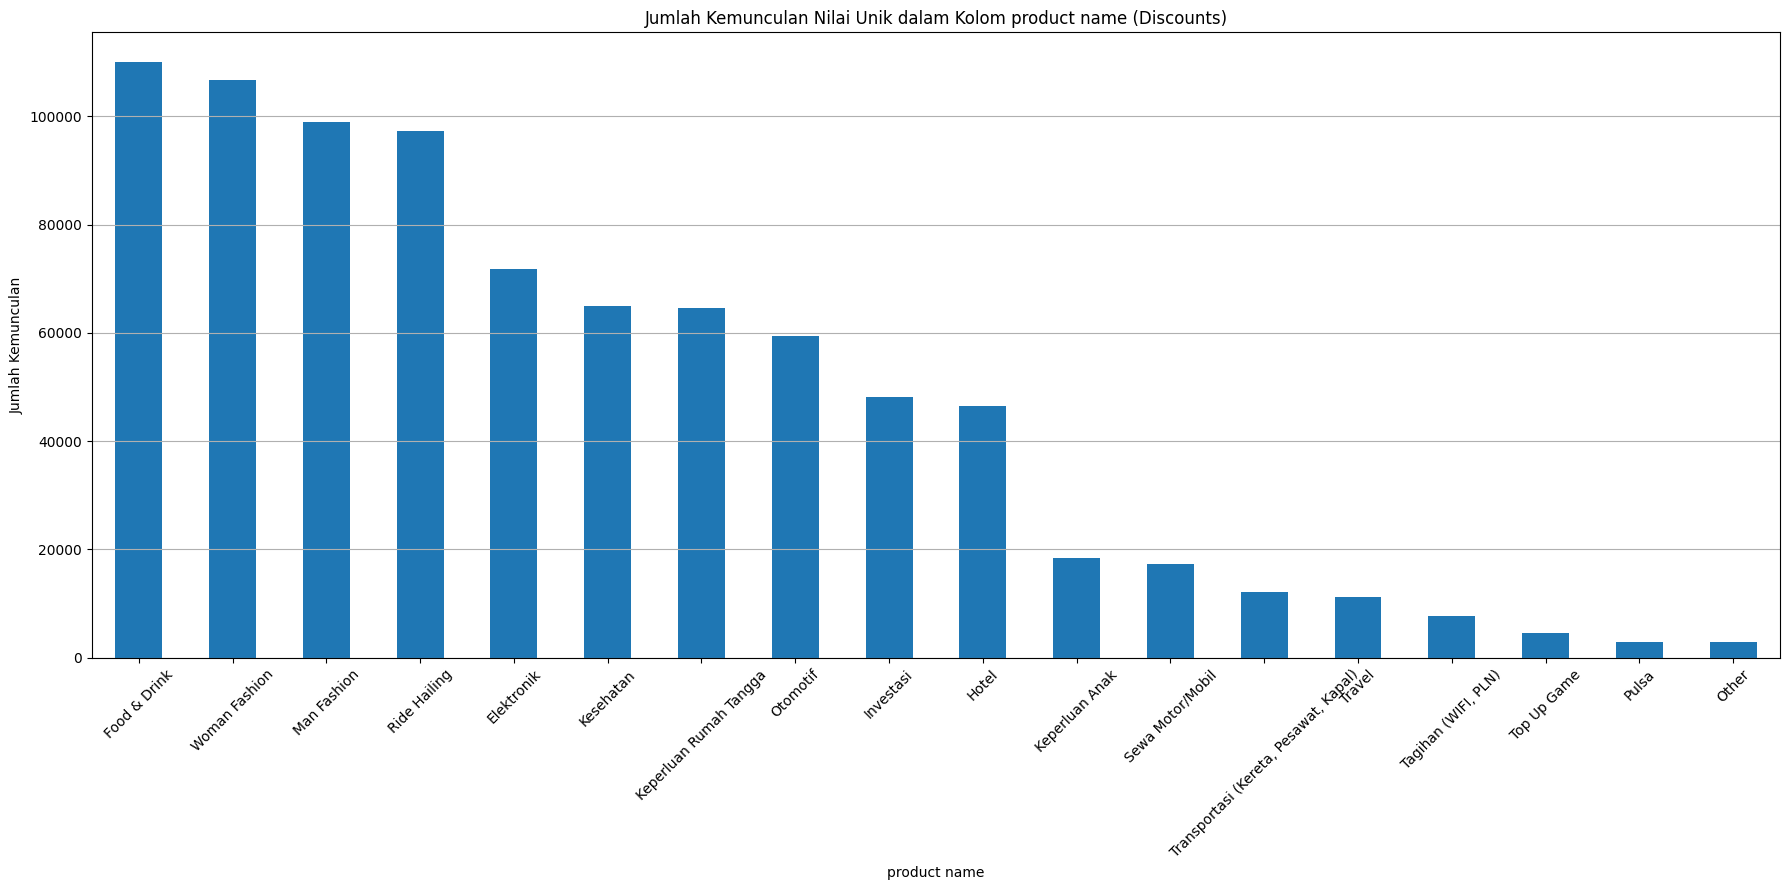

In [ ]:
# Filter data where 'is_discounted' = 1
df_discounted = df[df['is_discounted'] == 1]

# Menghitung jumlah kemunculan setiap nilai dalam kolom 'product name' (Discounts)
value_counts = df_discounted['product name'].value_counts()

# Membuat bar plot
plt.figure(figsize=(18, 9))
value_counts.plot(kind='bar')
plt.title('Jumlah Kemunculan Nilai Unik dalam Kolom product name (Discounts)')
plt.xlabel('product name')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.grid(axis='y')  # Menampilkan grid pada sumbu y
plt.tight_layout()
plt.show()

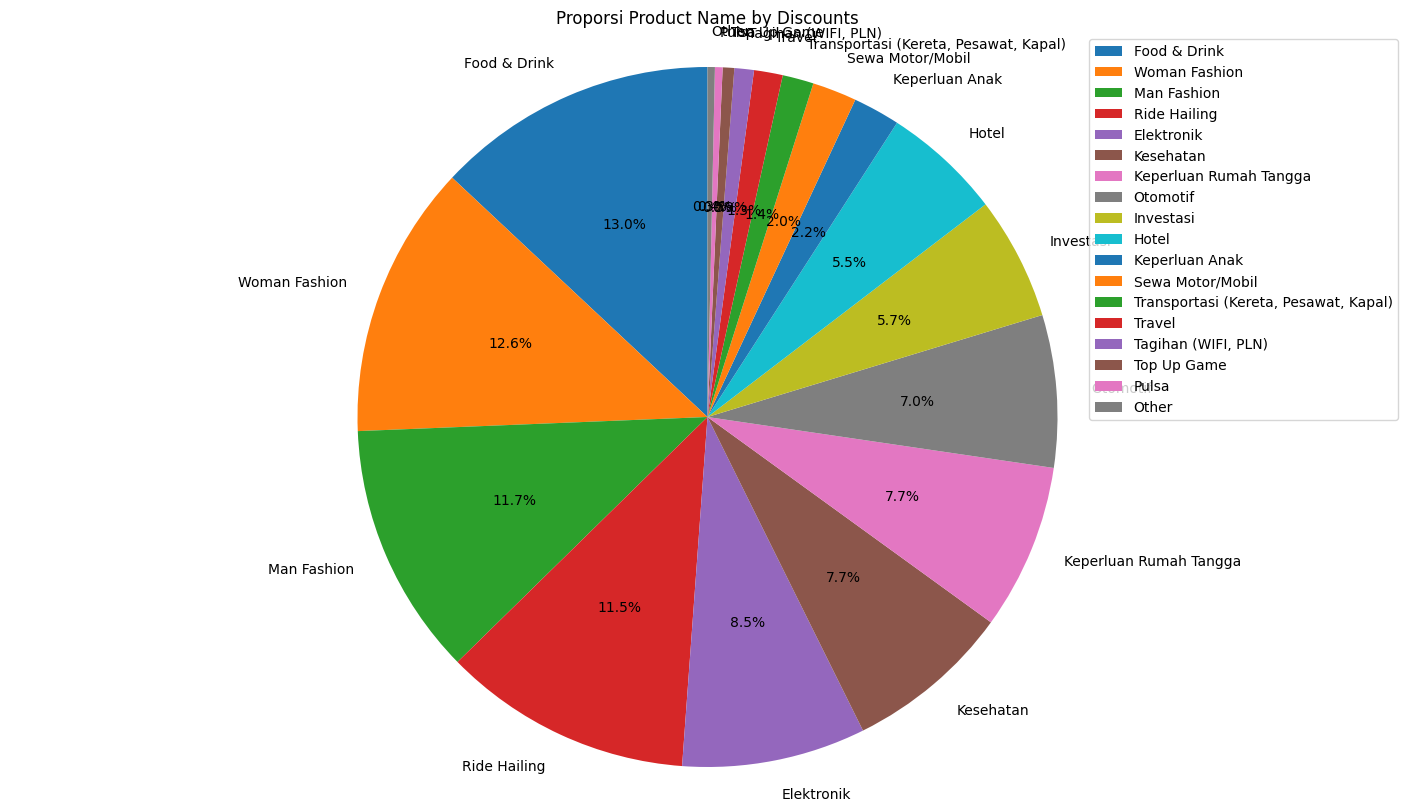

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah observasi untuk setiap nilai unik dalam kolom 'product name' (Discounts)
value_counts = df_discounted['product name'].value_counts()

# Membuat diagram pie
plt.figure(figsize=(18, 10))
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Product Name by Discounts')
plt.ylabel('')  # Menghilangkan label sumbu y
plt.axis('equal')  # Memastikan lingkaran terlihat sebagai lingkaran, bukan elips
plt.legend(labels=value_counts.index, loc='upper right')  # Menambahkan legenda
plt.show()

##### Budget / Discounts

In [ ]:
# Mengelompokkan bTerdasarkan 'promo_code' dan menjumlahkan 'promo_amount'
grouped_disc = df.groupby('product name')['discounts'].sum().reset_index()
grouped_disc.head()

,product name,discounts
0,Elektronik,8.343980e+08
1,Food & Drink,1.605455e+09
2,Hotel,5.054868e+08
3,Investasi,5.044592e+08
4,Keperluan Anak,1.573201e+08


Total Pengeluaran yang dikeluarkan untuk memberikan discounts

##### Total Nett Amount / Discounts

In [ ]:
# Mengelompokkan berdasarkan 'product name' dan menjumlahkan 'nett_amount' with Discounts
grouped_nett = df_discounted.groupby('product name')['nett_amount'].sum().reset_index()
grouped_nett

,product name,nett_amount
0,Elektronik,2.585393e+09
1,Food & Drink,8.594554e+09
2,Hotel,1.277909e+09
3,Investasi,9.478179e+08
4,Keperluan Anak,1.681572e+08
5,Keperluan Rumah Tangga,3.020345e+09
6,Kesehatan,2.410082e+09
7,Man Fashion,4.904628e+09
8,Other,2.073430e+07
9,Otomotif,2.291013e+09


##### Total Orders / Discounts

In [ ]:
# Menghitung total order (total transaction_id unik) untuk setiap product discounts
total_order_per_prod_disc = df_discounted.groupby('product name')['transaction_id'].nunique()

print("Total order (transaction_id unik) untuk setiap product discounts:\n", total_order_per_prod_disc)


Total order (booking_id unik) untuk setiap product discounts:
 product name
Elektronik                                71522
Food & Drink                             109583
Hotel                                     46438
Investasi                                 48047
Keperluan Anak                            18319
Keperluan Rumah Tangga                    64400
Kesehatan                                 64775
Man Fashion                               98507
Other                                      2859
Otomotif                                  59224
Pulsa                                      2973
Ride Hailing                              96820
Sewa Motor/Mobil                          17299
Tagihan (WIFI, PLN)                        7613
Top Up Game                                4517
Transportasi (Kereta, Pesawat, Kapal)     12138
Travel                                    11204
Woman Fashion                            106240
Name: transaction_id, dtype: int64


##### Total Customer / Discounts

In [ ]:
# Menghitung jumlah total pelanggan unik untuk setiap product discounts
total_unique_customers_per_prod_disc = df_discounted.groupby('product name')['user_id'].nunique()

print("Jumlah total pelanggan unik untuk setiap product discounts:\n", total_unique_customers_per_prod_disc)


Jumlah total pelanggan unik untuk setiap product discounts:
 product name
Elektronik                               53865
Food & Drink                             82425
Hotel                                    34950
Investasi                                36116
Keperluan Anak                           13792
Keperluan Rumah Tangga                   48538
Kesehatan                                48748
Man Fashion                              74133
Other                                     2170
Otomotif                                 44552
Pulsa                                     2215
Ride Hailing                             72964
Sewa Motor/Mobil                         12979
Tagihan (WIFI, PLN)                       5706
Top Up Game                               3395
Transportasi (Kereta, Pesawat, Kapal)     9179
Travel                                    8428
Woman Fashion                            80233
Name: user_id, dtype: int64


##### Average Order Value / Discounts

In [ ]:
# Menghitung rasio sum nett_amount per transaction_id unik untuk setiap product discounts
ratio_total_amount_per_transaction_id = df_discounted.groupby('product name').apply(lambda x: x['nett_amount'].sum() / x['transaction_id'].nunique())

print("AOV / Promo:\n", ratio_total_amount_per_transaction_id)


AOV / Promo:
 product name
Elektronik                               36148.220827
Food & Drink                             78429.631421
Hotel                                    27518.602222
Investasi                                19726.889296
Keperluan Anak                            9179.387521
Keperluan Rumah Tangga                   46899.770963
Kesehatan                                37206.971054
Man Fashion                              49789.640838
Other                                     7252.291011
Otomotif                                 38683.866338
Pulsa                                     6107.349479
Ride Hailing                             56888.622702
Sewa Motor/Mobil                         11087.883693
Tagihan (WIFI, PLN)                       7017.706555
Top Up Game                               3164.157627
Transportasi (Kereta, Pesawat, Kapal)    15926.268743
Travel                                    3412.964120
Woman Fashion                            45677.963102
d

##### Order Frequency / Discounts

In [ ]:
# Menghitung rasio total user_id per total pelanggan unik untuk setiap product discounts
ratio_trans_id_per_unique_user = df_discounted.groupby('product name').apply(lambda x: x['transaction_id'].nunique() / x['user_id'].nunique())

print("Rasio total user_id per total pelanggan unik untuk setiap product discounts:\n", ratio_trans_id_per_unique_user)


Rasio total user_id per total pelanggan unik untuk setiap product discounts:
 product name
Elektronik                               1.327801
Food & Drink                             1.329487
Hotel                                    1.328698
Investasi                                1.330352
Keperluan Anak                           1.328234
Keperluan Rumah Tangga                   1.326796
Kesehatan                                1.328772
Man Fashion                              1.328787
Other                                    1.317512
Otomotif                                 1.329323
Pulsa                                    1.342212
Ride Hailing                             1.326956
Sewa Motor/Mobil                         1.332845
Tagihan (WIFI, PLN)                      1.334210
Top Up Game                              1.330486
Transportasi (Kereta, Pesawat, Kapal)    1.322366
Travel                                   1.329378
Woman Fashion                            1.324143
dtype: fl

##### Customer Lifetime Value

In [ ]:
# Menghitung rasio pertama: sum nett_amount per user_id unik untuk setiap product discounts
ratio_1 = df_discounted.groupby('product name').apply(lambda x: x['nett_amount'].sum() / x['transaction_id'].nunique())

# Menghitung rasio kedua: total user_id per total pelanggan unik untuk setiap product discounts
ratio_2 = df_discounted.groupby('product name').apply(lambda x: x['transaction_id'].nunique() / x['user_id'].nunique())

# Menggabungkan kedua rasio dan menghitung hasil perkalian
result = ratio_1 * ratio_2

print("Hasil perkalian dari kedua rasio untuk setiap product discounts:\n", result)


Hasil perkalian dari kedua rasio untuk setiap product discounts:
 product name
Elektronik                                47997.643182
Food & Drink                             104271.207765
Hotel                                     36563.915594
Investasi                                 26243.710544
Keperluan Anak                            12192.372390
Keperluan Rumah Tangga                    62226.405085
Kesehatan                                 49439.598548
Man Fashion                               66159.849864
Other                                      9554.976959
Otomotif                                  51423.354732
Pulsa                                      8197.358916
Ride Hailing                              75488.685516
Sewa Motor/Mobil                          14778.434394
Tagihan (WIFI, PLN)                        9363.091483
Top Up Game                                4209.867452
Transportasi (Kereta, Pesawat, Kapal)     21060.360606
Travel                                   

##### Mean Burn Rate / Discounts

In [ ]:
# Menghitung rata-rata dari kolom 'burn_rate_percentage' untuk setiap product discounts
mean_burn_rate_per_promo_code = df_discounted.groupby('product name')['burn_rate_percentage'].mean()

print("Rata-rata burn_rate_percentage untuk setiap product discounts:\n", mean_burn_rate_per_promo_code)


Rata-rata burn_rate_percentage untuk setiap product discounts:
 product name
Elektronik                               48.745132
Food & Drink                             28.774083
Hotel                                    57.436361
Investasi                                64.604220
Keperluan Anak                           79.039527
Keperluan Rumah Tangga                   41.703391
Kesehatan                                49.123172
Man Fashion                              42.359260
Other                                    79.809643
Otomotif                                 47.301046
Pulsa                                    80.060661
Ride Hailing                             38.517967
Sewa Motor/Mobil                         73.709015
Tagihan (WIFI, PLN)                      78.002639
Top Up Game                              86.309352
Transportasi (Kereta, Pesawat, Kapal)    68.081804
Travel                                   85.165268
Woman Fashion                            44.114762
Name:

#### Discounts Insight (Flag 1,0)

##### Total Transaction (Discounts)

In [ ]:
# Menghitung total pesanan dengan is_discounted = 1
total_orders_is_discounted_1 = df[df['is_discounted'] == 1]['transaction_id'].count()

print("Total pesanan dengan discounts:", total_orders_is_discounted_1)


Total pesanan dengan discounts: 845424


##### Total Income (Discounts)

In [ ]:
# Filter data dengan is_discounted bernilai 1
total_amount_flag_discounts_0 = df[df['is_discounted'] == 0]['nett_amount'].sum()

print("Total Pendapatan Orders Non Discounts", total_amount_flag_discounts_0)


Total Pendapatan Orders Non Discounts 70812751400.0


##### Total Customer Order (Discounts)

In [ ]:
# Menghitung jumlah unik dari user_id dengan is_discounted = 1
total_unique_customers_flag_discounts_1 = df[df['is_discounted'] == 1]['user_id'].nunique()

print("Total customer yang menggunakan discounts :", total_unique_customers_flag_discounts_1)

Total customer yang menggunakan discounts : 87139


Total Customer Order Non Discounts

In [ ]:
# Menghitung jumlah unik dari user_id dengan is_discounted = 0
total_unique_user_discounts_0 = df[df['is_discounted'] == 0]['user_id'].nunique()

print("Total customer Non use Discounts : ", total_unique_user_discounts_0)


Total customer Non use Discounts :  87502


##### ~Total Spending All (Discounts)

In [ ]:
# Menghitung jumlah total 'discounts' di mana is_discounted = 1
total_amount_discounts_1 = df[df['is_discounted'] == 1]['discounts'].sum()

print("Total Spending For All Discounts :", total_amount_discounts_1)

Total Spending For All Discounts : 10222368300.0


Total Spending (Non Discounts)

In [ ]:
# Menghitung jumlah total 'discounts' di mana is_discounted = 0
total_amount_is_discounted_0 = df[df['is_discounted'] == 0]['discounts'].sum()

print("Total Spending For Non Discounts :", total_amount_is_discounted_0)


Total Spending For Non Discounts : -3200.000000000114


##### ~Total Income (Discounts) / Tahun

In [ ]:
# Mengonversi kolom 'join_date' ke tipe data datetime jika belum dilakukan sebelumnya
df['join_date'] = pd.to_datetime(df['join_date'])

# Filter data dengan is_discounted bernilai 1 dan group by tahun untuk menghitung nett_amount
filtered_df = df[df['is_discounted'] == 1]
grouped_by_year = filtered_df.groupby(df['join_date'].dt.year)['nett_amount'].sum()

print(grouped_by_year)


join_date
2023    3.694346e+10
2024    1.471900e+08
Name: nett_amount, dtype: float64


Total Income (Non Discounts) / Tahun

In [ ]:
# Mengonversi kolom 'join_date' ke tipe data datetime jika belum dilakukan sebelumnya
df['join_date'] = pd.to_datetime(df['join_date'])

# Filter data dengan is_discounted bernilai 0 dan group by tahun untuk menghitung nett_amount
filtered_df = df[df['is_discounted'] == 0]
grouped_by_year = filtered_df.groupby(df['join_date'].dt.year)['nett_amount'].sum()

print(grouped_by_year)


join_date
2023    7.053116e+10
2024    2.815879e+08
Name: nett_amount, dtype: float64


##### Gender / Transaction (Discounts)

In [ ]:
# Mengelompokkan data berdasarkan 'is_discounted' yang memiliki nilai 1
grouped_promo_1 = df[df['is_discounted'] == 1]

# Menghitung jumlah nilai 'age' yang 'perempuan' dan 'laki-laki'
count_age_gender = grouped_promo_1['gender'].value_counts()

print(count_age_gender)


gender
perempuan    634198
laki-laki    211226
Name: count, dtype: int64


##### Total Transaction / Provinsi (Discounts)

In [ ]:
grouped_promo_1 = df[df['is_discounted'] == 1]

count_province_location = grouped_promo_1['nama_provinsi'].value_counts()

count_province_location

nama_provinsi
JAWA TENGAH         668191
SUMATERA SELATAN    124086
BENGKULU             43728
MALUKU                9419
Name: count, dtype: int64

Total Transaction / Provinsi (Non Discounts)

In [ ]:
grouped_promo_0 = df[df['is_discounted'] == 0]

count_province_location = grouped_promo_0['nama_provinsi'].value_counts()

count_province_location

nama_provinsi
JAWA TENGAH         1423663
SUMATERA SELATAN     306964
BENGKULU             117944
MALUKU                42912
Name: count, dtype: int64

Maluku

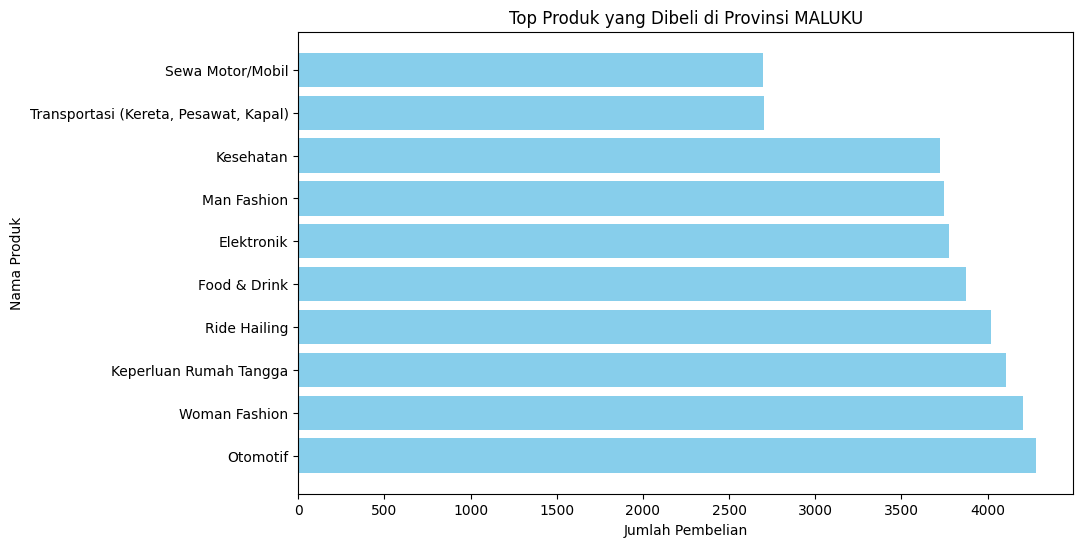

In [ ]:
# Filter data untuk provinsi MALUKU
df_maluku = df[df['nama_provinsi'] == 'MALUKU']

# Menghitung jumlah produk yang dibeli per nama produk di provinsi MALUKU
product_by_product_maluku = df_maluku.groupby('product name')['product_id'].count().reset_index()
product_by_product_maluku.columns = ['product_name', 'product_count']

# Mengurutkan produk berdasarkan jumlah pembelian terbanyak
product_by_product_maluku_sorted = product_by_product_maluku.sort_values(by='product_count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(product_by_product_maluku_sorted['product_name'], product_by_product_maluku_sorted['product_count'], color='skyblue')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Nama Produk')
plt.title('Top Produk yang Dibeli di Provinsi MALUKU')
plt.show()

Bengkulu

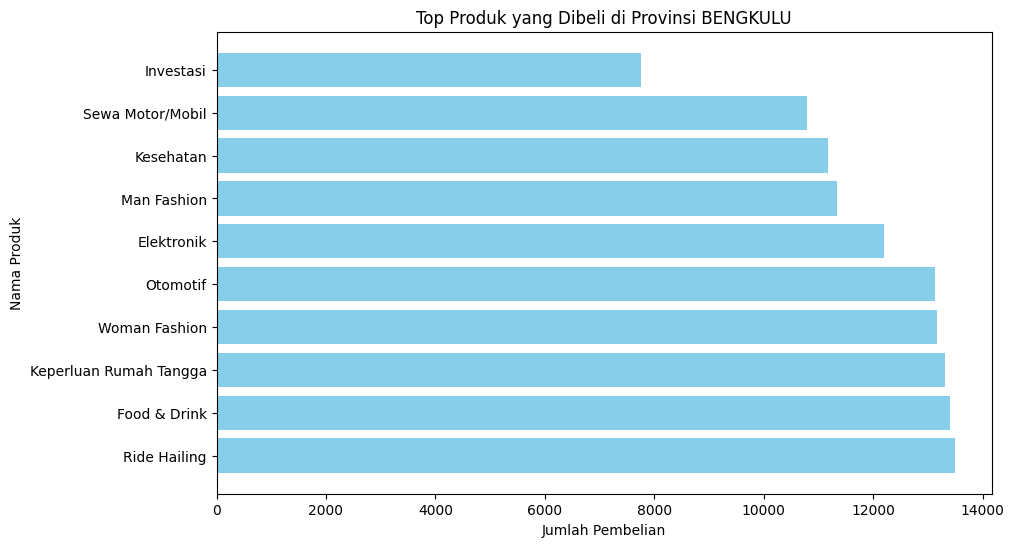

In [ ]:
# Filter data untuk provinsi BENGKULU
df_bengkulu = df[df['nama_provinsi'] == 'BENGKULU']

# Menghitung jumlah produk yang dibeli per nama produk di provinsi BENGKULU
product_by_product_bengkulu = df_bengkulu.groupby('product name')['product_id'].count().reset_index()
product_by_product_bengkulu.columns = ['product_name', 'product_count']

# Mengurutkan produk berdasarkan jumlah pembelian terbanyak
product_by_product_bengkulu_sorted = product_by_product_bengkulu.sort_values(by='product_count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(product_by_product_bengkulu_sorted['product_name'], product_by_product_bengkulu_sorted['product_count'], color='skyblue')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Nama Produk')
plt.title('Top Produk yang Dibeli di Provinsi BENGKULU')
plt.show()

Sumatera Selatan

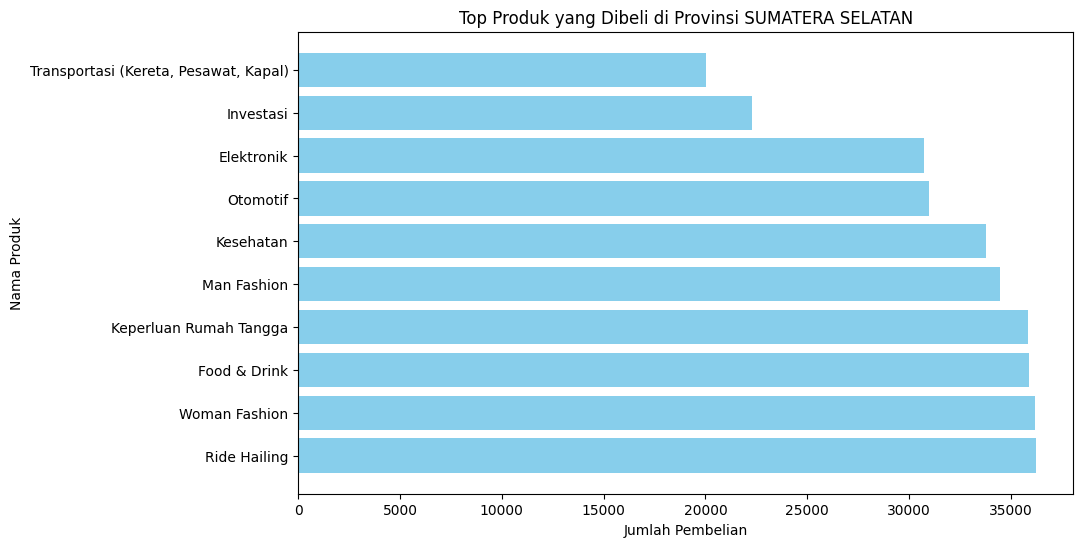

In [ ]:
# Filter data untuk provinsi SUMATERA SELATAN
df_sumatera_selatan = df[df['nama_provinsi'] == 'SUMATERA SELATAN']

# Menghitung jumlah produk yang dibeli per nama produk di provinsi SUMATERA SELATAN
product_by_product_sumatera_selatan = df_sumatera_selatan.groupby('product name')['product_id'].count().reset_index()
product_by_product_sumatera_selatan.columns = ['product_name', 'product_count']

# Mengurutkan produk berdasarkan jumlah pembelian terbanyak
product_by_product_sumatera_selatan_sorted = product_by_product_sumatera_selatan.sort_values(by='product_count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(product_by_product_sumatera_selatan_sorted['product_name'], product_by_product_sumatera_selatan_sorted['product_count'], color='skyblue')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Nama Produk')
plt.title('Top Produk yang Dibeli di Provinsi SUMATERA SELATAN')
plt.show()

Jawa Tengah

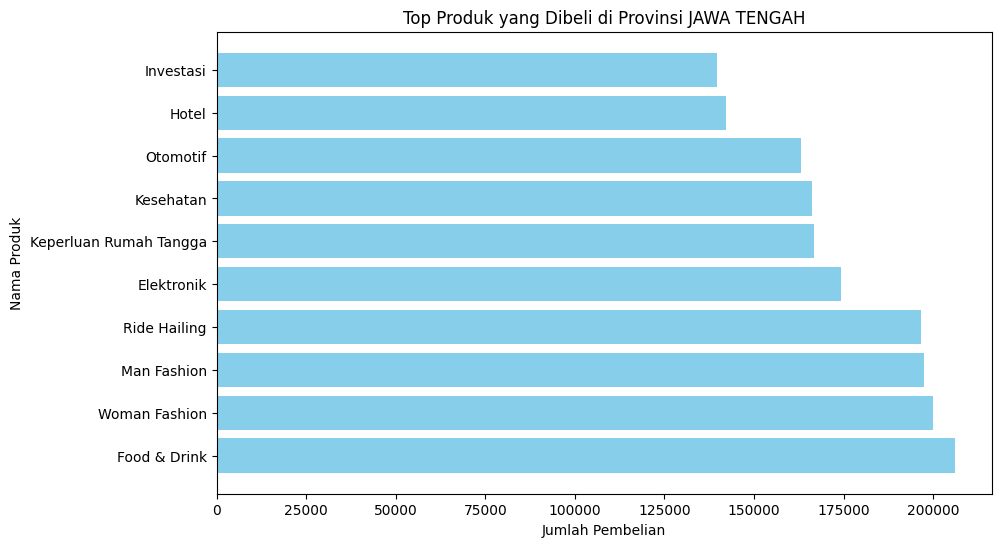

In [ ]:
# Filter data untuk provinsi JAWA TENGAH
df_jawa_tengah = df[df['nama_provinsi'] == 'JAWA TENGAH']

# Menghitung jumlah produk yang dibeli per nama produk di provinsi JAWA TENGAH
product_by_product_jawa_tengah = df_jawa_tengah.groupby('product name')['product_id'].count().reset_index()
product_by_product_jawa_tengah.columns = ['product_name', 'product_count']

# Mengurutkan produk berdasarkan jumlah pembelian terbanyak
product_by_product_jawa_tengah_sorted = product_by_product_jawa_tengah.sort_values(by='product_count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(product_by_product_jawa_tengah_sorted['product_name'], product_by_product_jawa_tengah_sorted['product_count'], color='skyblue')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Nama Produk')
plt.title('Top Produk yang Dibeli di Provinsi JAWA TENGAH')
plt.show()

##### Top Produk by Total Discount

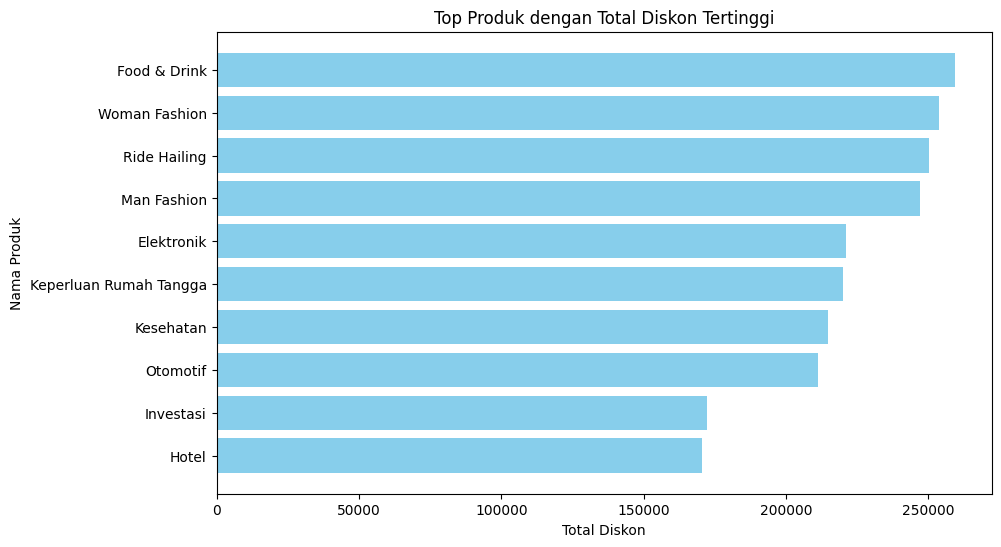

In [ ]:
import matplotlib.pyplot as plt

# Menghitung total diskon per produk
discount_by_product = df.groupby('product name')['discounts'].count().reset_index()
discount_by_product.columns = ['product_name', 'total_discount']

# Mengurutkan produk berdasarkan total diskon terbanyak
discount_by_product_sorted = discount_by_product.sort_values(by='total_discount', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(discount_by_product_sorted['product_name'], discount_by_product_sorted['total_discount'], color='skyblue')
plt.xlabel('Total Diskon')
plt.ylabel('Nama Produk')
plt.title('Top Produk dengan Total Diskon Tertinggi')
plt.gca().invert_yaxis()  # agar produk dengan total diskon tertinggi muncul di atas
plt.show()


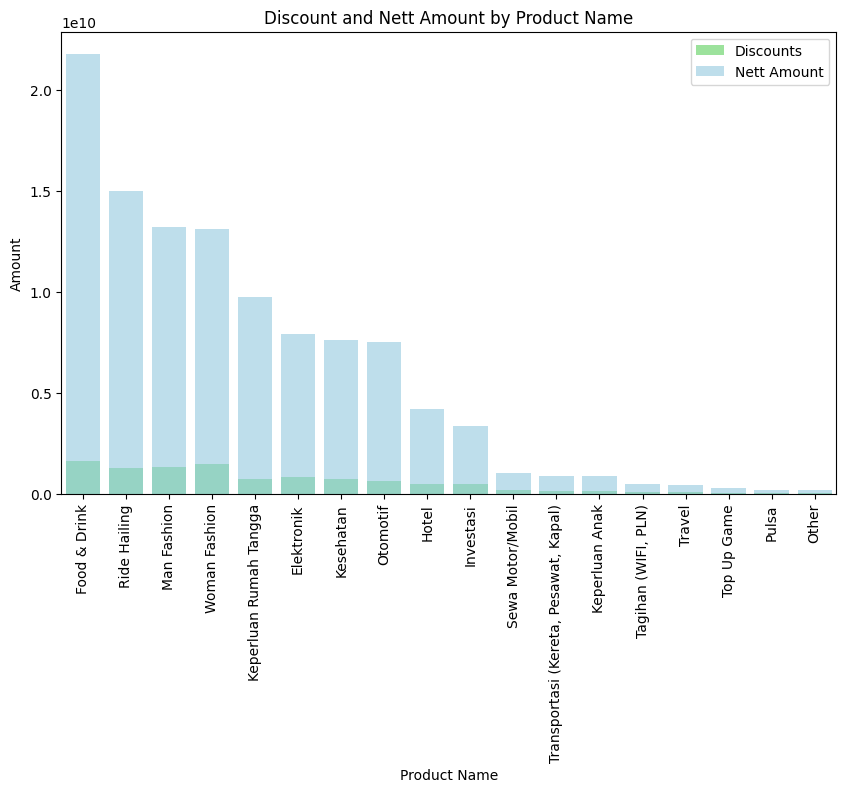

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

transaction_cols = ['discounts', 'nett_amount']

# Group by product name
transaction_product = df.groupby('product name')[transaction_cols].sum()
transaction_product_sorted = transaction_product.sort_values(by='nett_amount', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='product name', y='discounts', data=transaction_product_sorted, color='lightgreen', label='Discounts')
sns.barplot(x='product name', y='nett_amount', data=transaction_product_sorted, color='skyblue', label='Nett Amount', alpha=0.6)
plt.xlabel('Product Name')
plt.ylabel('Amount')
plt.title('Discount and Nett Amount by Product Name')
plt.xticks(rotation=90)
plt.show()


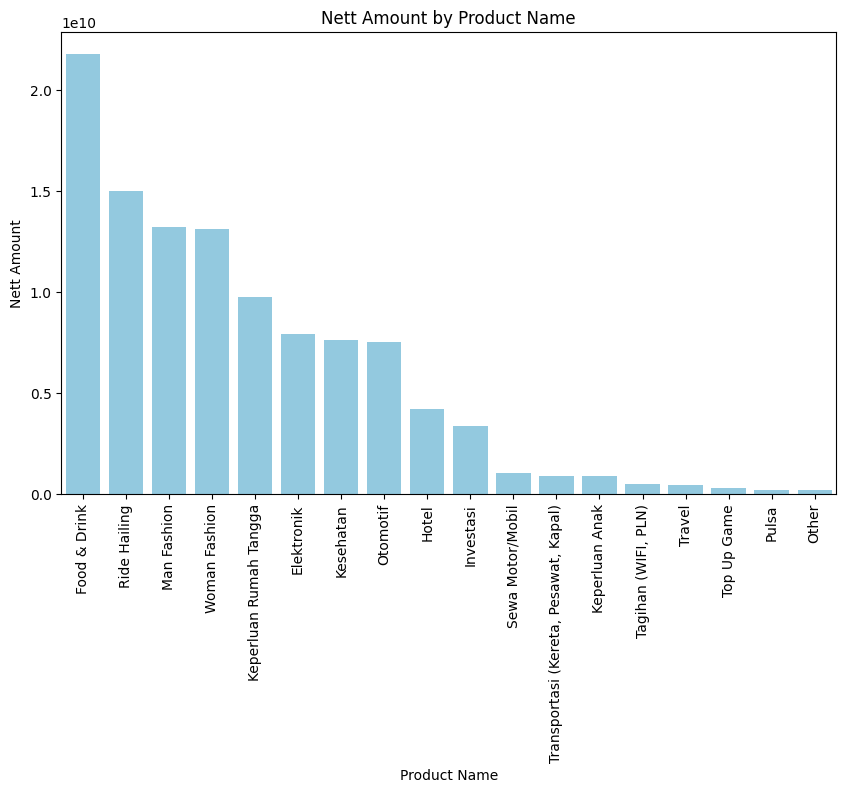

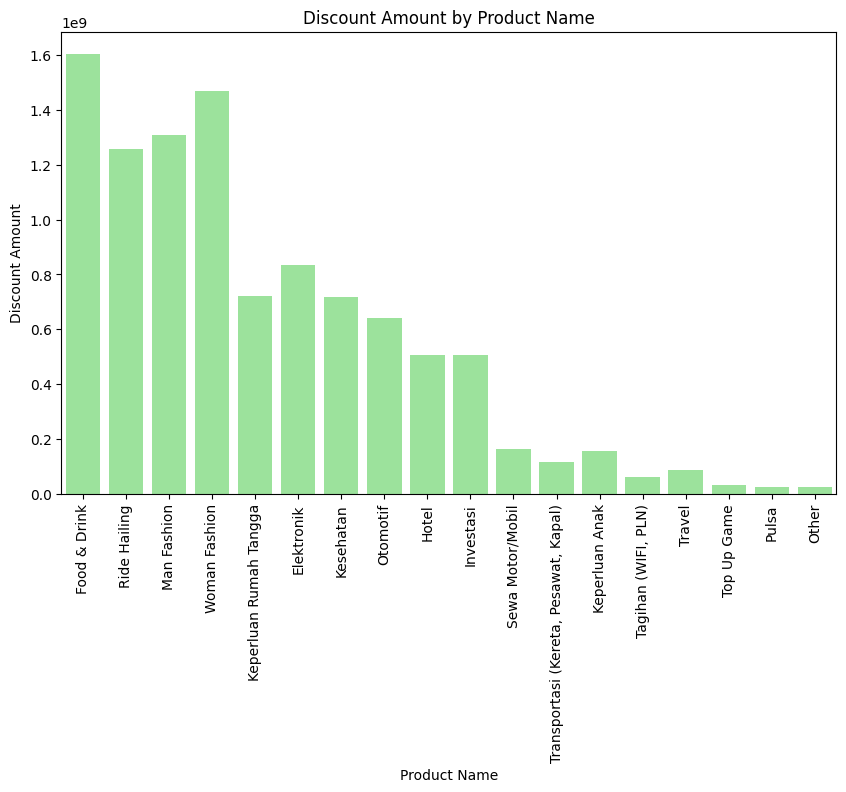

In [ ]:
transaction_cols = ['discounts', 'nett_amount']
transaction_product = df.groupby('product name')[transaction_cols].sum()
transaction_product = transaction_product.sort_values(by='nett_amount', ascending=False)
transaction_product = transaction_product.reset_index()

# Plot the bar chart for nett_amount
plt.figure(figsize=(10, 6))
sns.barplot(x='product name', y='nett_amount', data=transaction_product, color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Nett Amount')
plt.title('Nett Amount by Product Name')
plt.xticks(rotation=90)
plt.show()

# Plot the bar chart for discounts
plt.figure(figsize=(10, 6))
sns.barplot(x='product name', y='discounts', data=transaction_product, color='lightgreen')
plt.xlabel('Product Name')
plt.ylabel('Discount Amount')
plt.title('Discount Amount by Product Name')
plt.xticks(rotation=90)
plt.show()

# Feature Selection

## cek trx per provinsi

In [ ]:
df['nama_provinsi'].value_counts()

nama_provinsi
JAWA TENGAH         2091854
SUMATERA SELATAN     431050
BENGKULU             161672
MALUKU                52331
Name: count, dtype: int64

## Korelasi Antar Variabel - Heatmap

Pemilihan Fitur-fitur yang memiliki korelasi tinggi dengan variabel target atau dengan discounts bisa menjadi kandidat yang baik.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736907 entries, 0 to 2736906
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   transaction_id        object        
 1   user_id               object        
 2   product_id            int64         
 3   gross_amount          float64       
 4   discounts             float64       
 5   transaction_date      datetime64[ns]
 6   kode provinsi         object        
 7   product name          object        
 8   full_name             object        
 9   gender                object        
 10  money_spent           float64       
 11  refund                float64       
 12  wallet_balance        float64       
 13  join_date             datetime64[ns]
 14  birth                 datetime64[ns]
 15  nama_provinsi         object        
 16  is_discounted         int64         
 17  nett_amount           float64       
 18  free_gift             int64         
 19  

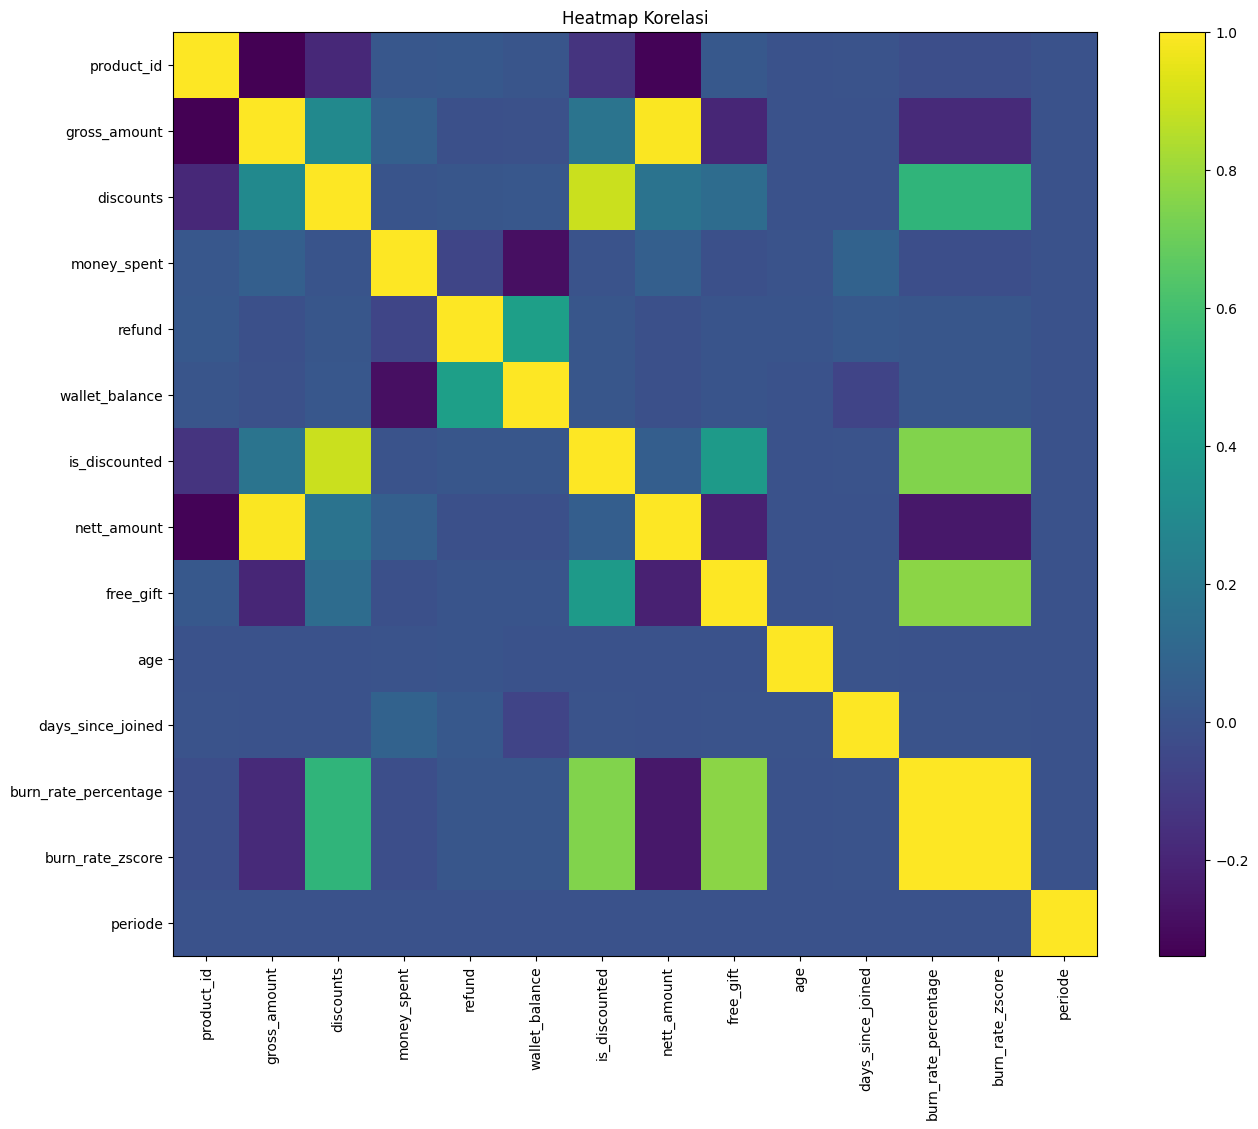

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))  # Set the size of the heatmap
plt.title('Heatmap Korelasi')

# Draw the heatmap
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Add colorbar

# Display x and y axis labels
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation='vertical')
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

plt.show()

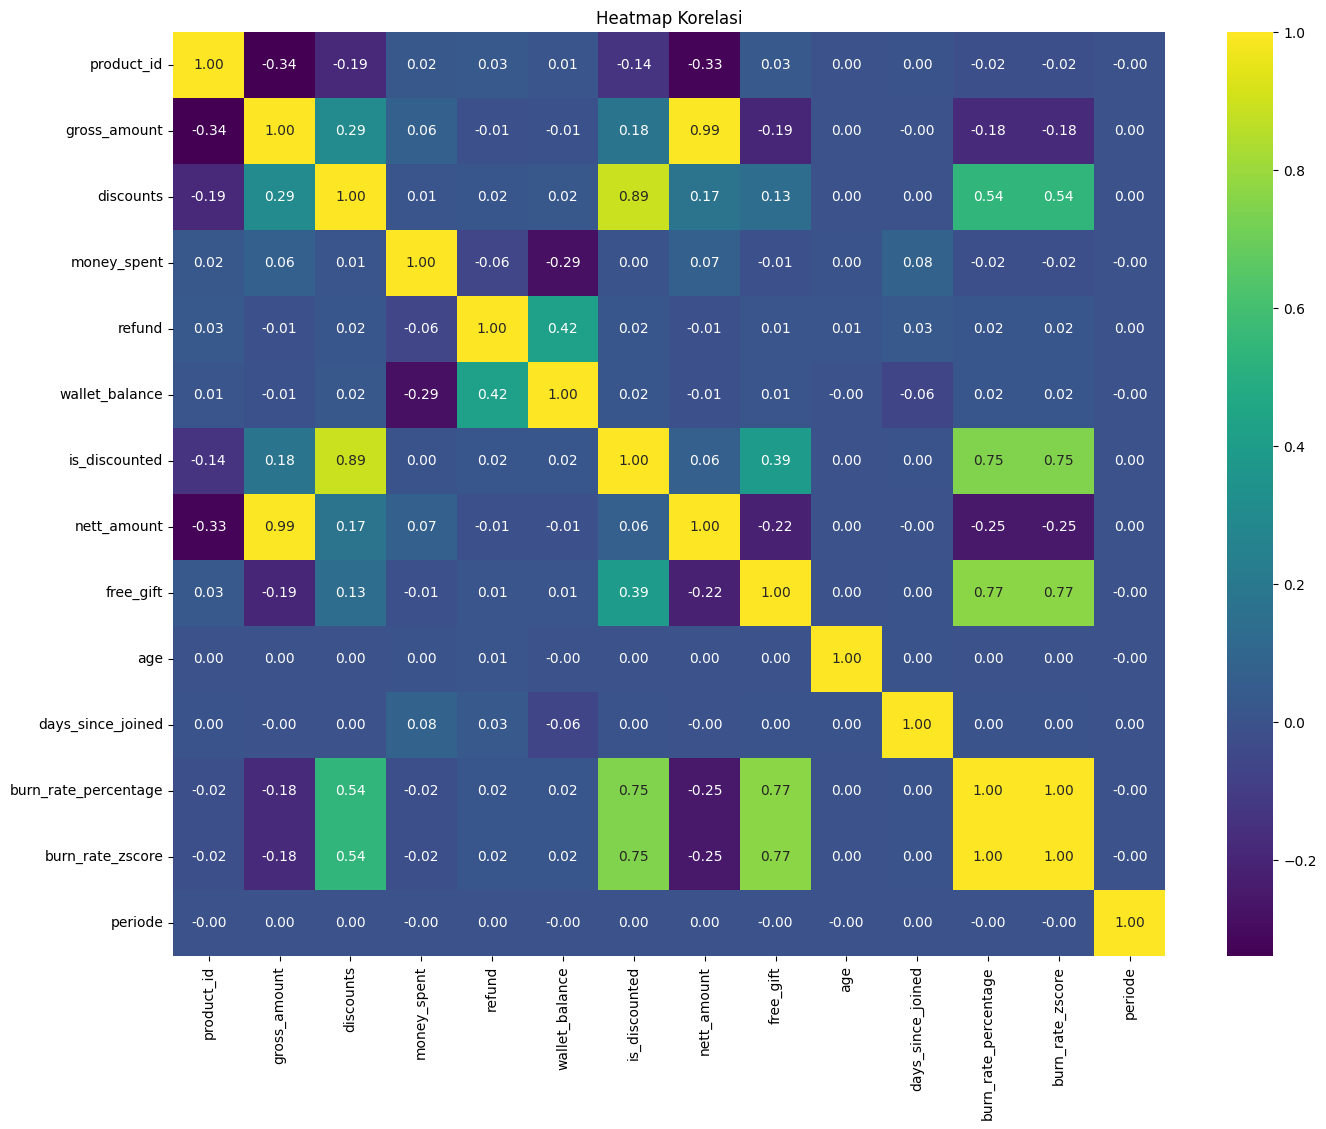

In [ ]:
plt.figure(figsize=(16, 12))  # Ukuran heatmap
plt.title('Heatmap Korelasi')

# Menggambar heatmap dengan angka korelasi
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')

plt.show()


In [ ]:
# Menentukan variabel target
target_variable = 'burn_rate_zscore'

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Menghitung korelasi antara fitur-fitur numerik dengan variabel target
correlations_with_target = numeric_df.corr()[target_variable].sort_values(ascending=False)
print(correlations_with_target)

burn_rate_percentage    1.000000
burn_rate_zscore        1.000000
free_gift               0.768544
is_discounted           0.745664
discounts               0.538653
wallet_balance          0.020640
refund                  0.019791
days_since_joined       0.001120
age                     0.000708
periode                -0.000019
money_spent            -0.016636
product_id             -0.018470
gross_amount           -0.178253
nett_amount            -0.254911
Name: burn_rate_zscore, dtype: float64


## Information Value - IV

Information value (IV) are simple, yet powerful techniques to perform variable transformation and selection

less than 0.02 is	Useless

0.02 to 0.1 is	Weak predictors

0.1 to 0.3 is	Medium Predictors

0.3 to 0.5 is	Strong predictors

more than 0.5 is Suspicious

## Uji Multicollinearity - VIF

Variance Inflation Factor digunakan untuk mengeliminasi feature yang memiliki multikolinearitas (multicollinearity bisa menyebabkan overfitting)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Variabel yang ingin diperiksa VIF-nya (fitur-fitur numerik)
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['number'])


# Hitung VIF dan Toleransi
vif_data = pd.DataFrame()
vif_data["Features"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                Features          VIF  Tolerance
0             product_id     1.147400   0.871536
1           gross_amount          inf   0.000000
2              discounts          inf   0.000000
3            money_spent     1.106097   0.904080
4                 refund     1.223879   0.817075
5         wallet_balance     1.328384   0.752795
6          is_discounted     9.780561   0.102244
7            nett_amount          inf   0.000000
8              free_gift     3.526609   0.283559
9                    age     1.000100   0.999900
10     days_since_joined     1.012367   0.987784
11  burn_rate_percentage  1208.547456   0.000827
12      burn_rate_zscore   965.186452   0.001036
13               periode     1.000002   0.999998


In [ ]:
# Variabel yang ingin diperiksa VIF-nya (fitur-fitur numerik)
numeric_features = ['burn_rate_zscore', 'discounts', 'nett_amount', 'is_discounted' ]  # Ganti dengan fitur-fitur yang relevan

# Buat DataFrame baru hanya dengan fitur-fitur numerik
numeric_df = df[numeric_features]

# Hitung VIF dan Toleransi
vif_data = pd.DataFrame()
vif_data["Features"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

print(vif_data)

           Features        VIF  Tolerance
0  burn_rate_zscore   2.842721   0.351776
1         discounts   7.652910   0.130669
2       nett_amount   1.895869   0.527463
3     is_discounted  11.145742   0.089720


In [ ]:
# Variabel yang ingin diperiksa VIF-nya (fitur-fitur numerik)
numeric_features = ['burn_rate_zscore', 'nett_amount', 'is_discounted' ]  # Ganti dengan fitur-fitur yang relevan

# Buat DataFrame baru hanya dengan fitur-fitur numerik
numeric_df = df[numeric_features]

# Hitung VIF dan Toleransi
vif_data = pd.DataFrame()
vif_data["Features"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

vif_data

,Features,VIF,Tolerance
0,burn_rate_zscore,2.597226,0.385026
1,nett_amount,1.895801,0.527482
2,is_discounted,2.960675,0.337761


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Variabel yang ingin diperiksa VIF-nya (fitur-fitur numerik)
numeric_features = ['burn_rate_zscore', 'nett_amount', 'discounts' ]  # Ganti dengan fitur-fitur yang relevan

# Buat DataFrame baru hanya dengan fitur-fitur numerik
numeric_df = df[numeric_features]

# Hitung VIF dan Toleransi
vif_data = pd.DataFrame()
vif_data["Features"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

vif_data

,Features,VIF,Tolerance
0,burn_rate_zscore,1.702593,0.587339
1,nett_amount,1.661724,0.601785
2,discounts,2.032864,0.491917


Diatas adalah melakukan Eleminasi Features yang memiliki VIF besar dan Tolerance yang Kecil

# Modelling

## Penjelasan

Analisis Tingkat Efektivitas Penggunaan Discounts terhadap Peningkatan Penjualan dengan Menggunakan Metode Z-Score.

Tujuan Clustering adalah Segmentasi Pengguna:

Melalui K-Means atau metode clustering lainnya, membagi pengguna menjadi kelompok berdasarkan pola penggunaan discounts dan tingkat efektivitasnya terhadap peningkatan penjualan. Ini dapat membantu untuk memahami kelompok-kelompok pengguna yang memiliki kecenderungan yang serupa dalam memanfaatkan discounts.

Tujuan:
- Mengidentifikasi dan memahami kelompok pengguna yang paling efektif dalam memanfaatkan diskon atau penawaran khusus. Hal ini dilakukan dengan menggunakan berbagai metode clustering K-Means dan model SVM untuk memisahkan pengguna berdasarkan pola penggunaan diskon.

Dengan demikian, bisnis dapat fokus pada strategi pemasaran yang lebih terarah untuk meningkatkan efektivitas diskon pada kelompok-kelompok yang tepat.

## KMeans

### Plotting Elbow Method

The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm.

#### Initiate

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [ ]:
# feature yang dipilih (FS)
print(vif_data)

           Features       VIF  Tolerance
0  burn_rate_zscore  1.702593   0.587339
1       nett_amount  1.661724   0.601785
2         discounts  2.032864   0.491917


In [ ]:
# Memuat data dan mengambil fitur yang akan digunakan sesuai dengan FS
features = df[['burn_rate_zscore', 'discounts', 'nett_amount']]

In [ ]:
features

,burn_rate_zscore,discounts,nett_amount
0,-0.498908,0.0,97700.0
1,0.820076,16250.0,26050.0
2,-0.498908,0.0,68600.0
3,-0.498908,0.0,57900.0
4,0.543952,16250.0,37250.0
...,...,...,...
2736902,-0.498908,0.0,1000.0
2736903,-0.498908,0.0,31700.0
2736904,-0.498908,0.0,134900.0
2736905,-0.498908,0.0,128100.0


In [ ]:
inertia = []

In [ ]:
for k in range(1, 11):  # Menghitung nilai inersia untuk 10 klaster
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

#### The Graph

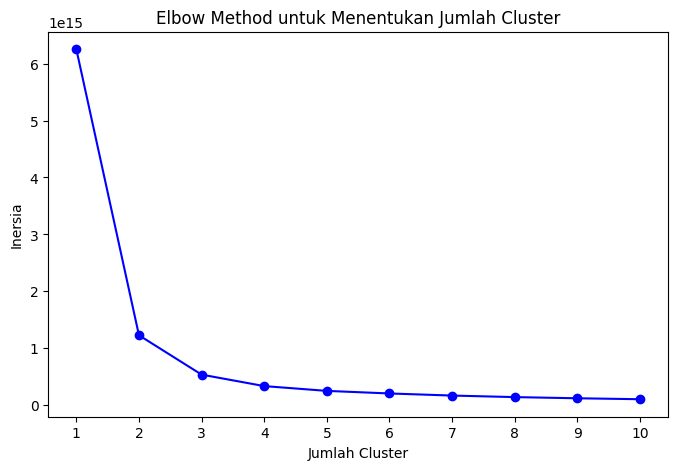

In [ ]:
# Plotting Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xticks(range(1, 11))
plt.grid(False)
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e. the point after which the distortion/inertia starts decreasing in a linear fashion.

Jadi, melihat kurva elbow diatas, kami menetapkan untuk coba menggunakan 2, 3, 4 cluster untuk melihat terlebih dahulu

### Mengambil Sampel Data

In [ ]:
df['kode provinsi'].value_counts()

kode provinsi
33    2091854
16     431050
17     161672
81      52331
Name: count, dtype: int64

In [ ]:
# Membuat subset data berdasarkan provinsi maluku
data_P81 = df[df['kode provinsi'] == '81']
# sample size terendah dijadikan pacuan

In [ ]:
data_P81.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,birth,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode
2684576,TRX668320,SC8104022023001,1,18500.0,0.0,2024-10-16,81,Man Fashion,AGUS LONGKI Bakti,laki-laki,...,2007-04-25,MALUKU,0,18500.0,0,17,393,0.000000,-0.498908,4
2684577,TRX668321,SC8104022023001,1,120600.0,0.0,2024-02-03,81,Man Fashion,AGUS LONGKI Bakti,laki-laki,...,2007-04-25,MALUKU,0,120600.0,0,17,393,0.000000,-0.498908,1
2684578,TRX668322,SC8104022023001,1,150400.0,16250.0,2024-02-06,81,Man Fashion,AGUS LONGKI Bakti,laki-laki,...,2007-04-25,MALUKU,1,134150.0,0,17,393,10.804521,-0.127944,1
2684579,TRX668323,SC8104022023001,2,100300.0,0.0,2024-04-28,81,Woman Fashion,AGUS LONGKI Bakti,laki-laki,...,2007-04-25,MALUKU,0,100300.0,0,17,393,0.000000,-0.498908,2
2684580,TRX668324,SC8104022023001,2,21600.0,0.0,2024-04-14,81,Woman Fashion,AGUS LONGKI Bakti,laki-laki,...,2007-04-25,MALUKU,0,21600.0,0,17,393,0.000000,-0.498908,2


In [ ]:
# Membuat subset data berdasarkan provinsi jateng
data_P33 = df[df['kode provinsi'] == '33']
data_P33 = data_P33.sample(n = 52331, random_state = 42)

In [ ]:
data_P33.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,birth,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode
2449253,TRX2546436,SC3328132013002,2,11300.0,11300.0,2024-08-29,33,Woman Fashion,ENI,perempuan,...,1987-04-19,JAWA TENGAH,1,0.0,1,37,422,100.0,2.934510,3
878932,TRX967487,SC3309112009023,11,4100.0,0.0,2024-06-11,33,Top Up Game,FATIMAH SRI,perempuan,...,1992-06-08,JAWA TENGAH,0,4100.0,0,32,382,0.0,-0.498908,2
2247795,TRX2343869,SC3317102024016,10,2200.0,0.0,2024-10-30,33,"Transportasi (Kereta, Pesawat, Kapal)",SARIFAH YUDHISTI DHINI ARIZA,perempuan,...,1970-05-20,JAWA TENGAH,0,2200.0,0,54,403,0.0,-0.498908,4
2132916,TRX2228415,SC3327042009005,15,2300.0,0.0,2024-06-27,33,Investasi,SUHARTI NURAZIZAH,perempuan,...,1991-11-15,JAWA TENGAH,0,2300.0,0,33,419,0.0,-0.498908,2
951028,TRX1039999,SC3329102009022,7,3800.0,0.0,2024-09-02,33,Keperluan Anak,HESTY KONTERIUS,perempuan,...,1999-03-16,JAWA TENGAH,0,3800.0,0,25,415,0.0,-0.498908,3


In [ ]:
# Membuat subset data berdasarkan provinsi sumsel
data_P16 = df[df['kode provinsi'] == '16']
data_P16 = data_P16.sample(n = 52331, random_state = 42)

In [ ]:
data_P16.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,birth,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode
202563,TRX610966,SC1606012003004,9,16700.0,0.0,2024-06-17,16,Other,TITIN,perempuan,...,1981-06-05,SUMATERA SELATAN,0,16700.0,0,43,431,0.0,-0.498908,2
144494,TRX552393,SC1604101043004,11,5300.0,0.0,2024-12-01,16,Top Up Game,Dra. ANA,perempuan,...,1999-07-10,SUMATERA SELATAN,0,5300.0,0,25,368,0.0,-0.498908,4
362650,TRX772326,SC1608092020001,4,3700.0,0.0,2024-01-29,16,Ride Hailing,RIFAYLI ISKANDAR MUKTI,laki-laki,...,1993-08-22,SUMATERA SELATAN,0,3700.0,0,31,453,0.0,-0.498908,1
138773,TRX546658,SC1604062022003,3,150400.0,0.0,2024-04-04,16,Food & Drink,HIDAYAT H. S.Sos.,laki-laki,...,1980-09-02,SUMATERA SELATAN,0,150400.0,0,44,390,0.0,-0.498908,2
119371,TRX527146,SC1671021003010,3,75400.0,0.0,2024-09-16,16,Food & Drink,Ir. HAYAT,laki-laki,...,1998-05-05,SUMATERA SELATAN,0,75400.0,0,26,423,0.0,-0.498908,3


In [ ]:
# Membuat subset data berdasarkan provinsi bengkulu
data_P17 = df[df['kode provinsi'] == '17']
data_P17 = data_P17.sample(n = 52331, random_state = 42)

In [ ]:
data_P17.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,birth,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode
540576,TRX644537,SC1706012006006,10,20000.0,2600.0,2024-01-02,17,"Transportasi (Kereta, Pesawat, Kapal)",MALAYSIANA,perempuan,...,1991-10-12,BENGKULU,1,17400.0,0,33,424,13.000000,-0.052564,1
454037,TRX557561,SC1703202005001,14,86900.0,0.0,2024-04-23,17,Kesehatan,ENDANG AYU EKA Handayani,perempuan,...,1984-06-05,BENGKULU,0,86900.0,0,40,415,0.000000,-0.498908,2
460238,TRX563832,SC1703122005001,4,77400.0,16250.0,2024-03-11,17,Ride Hailing,SABRI KEMAL,laki-laki,...,1984-09-28,BENGKULU,1,61150.0,0,40,389,20.994832,0.221932,1
533138,TRX637075,SC1707112005002,1,10500.0,0.0,2024-10-11,17,Man Fashion,NIZAR,laki-laki,...,1991-03-05,BENGKULU,0,10500.0,0,33,445,0.000000,-0.498908,4
447720,TRX551202,SC1709092010003,7,6600.0,0.0,2024-12-07,17,Keperluan Anak,DIMUNTUR,laki-laki,...,2007-10-03,BENGKULU,0,6600.0,0,17,387,0.000000,-0.498908,4


### KMeans Clustering per Provinsi

Data yang digunakan untuk klustering didasarkan pada jumlah baris data terkecil dari 4 provinsi.

Proses ini dilaksanakan untuk meverifikasi jika bisa menggunakan kuantitas baris data dari provinsi terkecil.

In [ ]:
df['nama_provinsi'].value_counts()

nama_provinsi
JAWA TENGAH         2091854
SUMATERA SELATAN     431050
BENGKULU             161672
MALUKU                52331
Name: count, dtype: int64

Di kasus ini Maluku memiliki sejumlah 52331 baris data, kita akan gunakan 52331 baris data dari Provinsi lain

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [ ]:
def perform_clustering_KMeans(data, n_clusters):
    # Mengambil fitur yang dipilih
    features = data[['burn_rate_zscore', 'nett_amount', 'discounts']]

    # Melakukan clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(features)

    # Menambahkan kolom 'cluster' ke dalam data
    data['cluster'] = clusters

    # Menampilkan beberapa baris pertama dari data yang telah diklasterisasi
    print(data[['burn_rate_zscore', 'nett_amount', 'discounts', 'cluster']].head())

    # Visualisasi hasil clustering (menggunakan dua fitur pertama untuk visualisasi 2D)
    plt.scatter(data['burn_rate_zscore'], data['nett_amount'], c=clusters, cmap='viridis')
    plt.title(f'Clustering with {n_clusters} clusters')
    plt.xlabel('burn_rate_zscore')
    plt.ylabel('nett_amount')
    plt.show()

  # Mengembalikan fitur dan hasil clustering
    return features, clusters

##### KMeans Clustering Provinsi Jateng

###### Clustering Prov. Jateng with 2 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         burn_rate_zscore  nett_amount  discounts  cluster
2449253          2.934510          0.0    11300.0        1
878932          -0.498908       4100.0        0.0        1
2247795         -0.498908       2200.0        0.0        1
2132916         -0.498908       2300.0        0.0        1
951028          -0.498908       3800.0        0.0        1


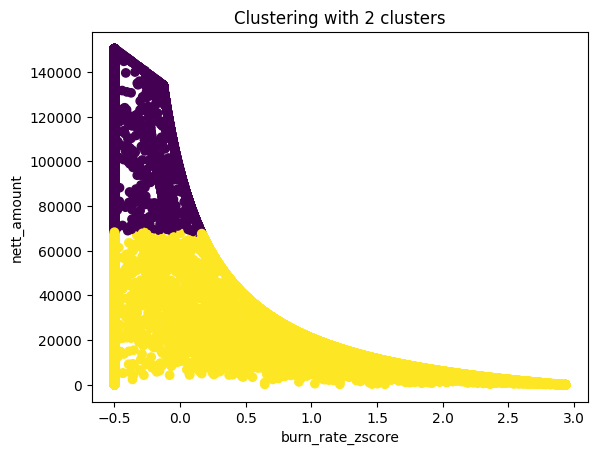

In [ ]:
features_P33_2, clusters_P33_2 = perform_clustering_KMeans(data_P33, 2)

###### Clustering Prov. Jateng with 3 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         burn_rate_zscore  nett_amount  discounts  cluster
2449253          2.934510          0.0    11300.0        1
878932          -0.498908       4100.0        0.0        1
2247795         -0.498908       2200.0        0.0        1
2132916         -0.498908       2300.0        0.0        1
951028          -0.498908       3800.0        0.0        1


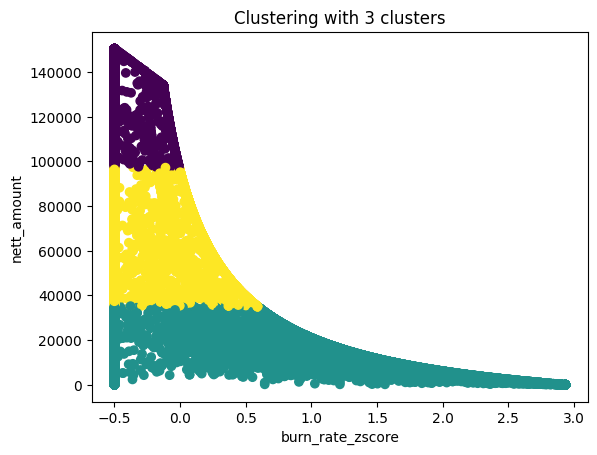

In [ ]:
features_P33_3, clusters_P33_3 = perform_clustering_KMeans(data_P33, 3)

###### Clustering Prov. Jateng with 4 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         burn_rate_zscore  nett_amount  discounts  cluster
2449253          2.934510          0.0    11300.0        0
878932          -0.498908       4100.0        0.0        0
2247795         -0.498908       2200.0        0.0        0
2132916         -0.498908       2300.0        0.0        0
951028          -0.498908       3800.0        0.0        0


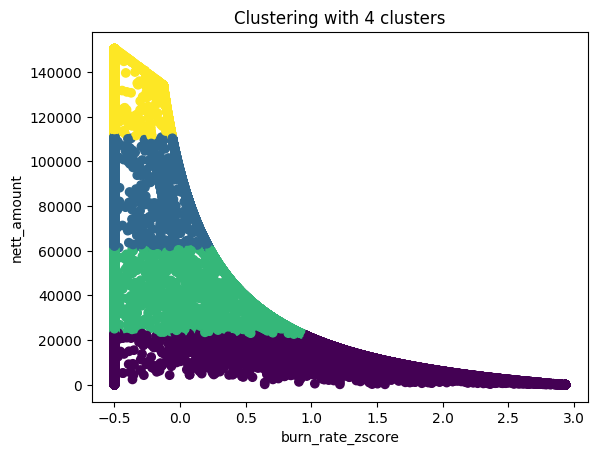

In [ ]:
features_P33_4, clusters_P33_4 = perform_clustering_KMeans(data_P33, 4)

##### KMeans Clustering Provinsi Sumsel

###### Clustering Prov. Sumsel with 2 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        burn_rate_zscore  nett_amount  discounts  cluster
202563         -0.498908      16700.0        0.0        1
144494         -0.498908       5300.0        0.0        1
362650         -0.498908       3700.0        0.0        1
138773         -0.498908     150400.0        0.0        0
119371         -0.498908      75400.0        0.0        0


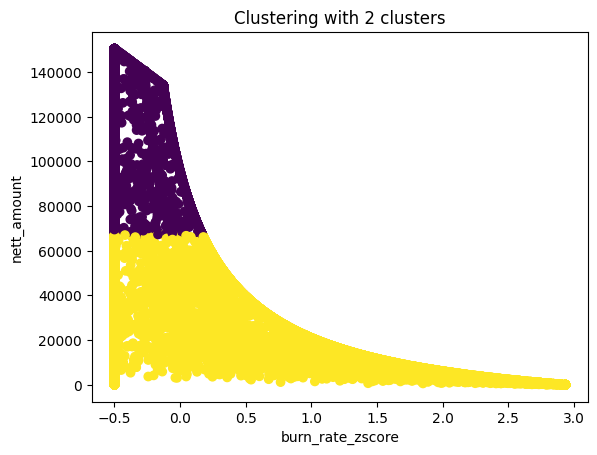

In [ ]:
features_P16_2, clusters_P16_2 = perform_clustering_KMeans(data_P16, 2)

###### Clustering Prov. Sumsel with 3 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        burn_rate_zscore  nett_amount  discounts  cluster
202563         -0.498908      16700.0        0.0        1
144494         -0.498908       5300.0        0.0        1
362650         -0.498908       3700.0        0.0        1
138773         -0.498908     150400.0        0.0        0
119371         -0.498908      75400.0        0.0        2


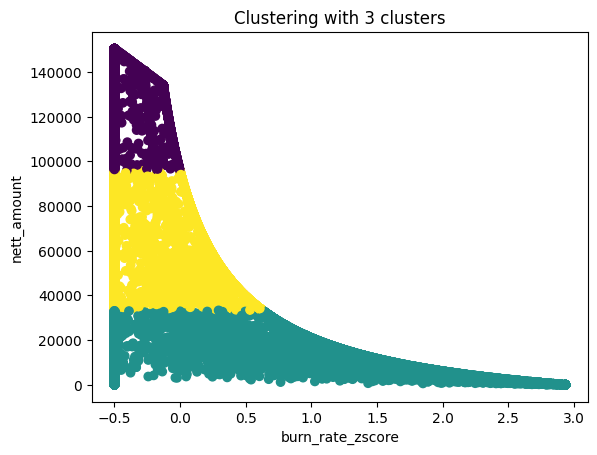

In [ ]:
features_P16_3, clusters_P16_3 = perform_clustering_KMeans(data_P16, 3)

###### Clustering Prov. Sumsel with 4 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        burn_rate_zscore  nett_amount  discounts  cluster
202563         -0.498908      16700.0        0.0        1
144494         -0.498908       5300.0        0.0        1
362650         -0.498908       3700.0        0.0        1
138773         -0.498908     150400.0        0.0        2
119371         -0.498908      75400.0        0.0        3


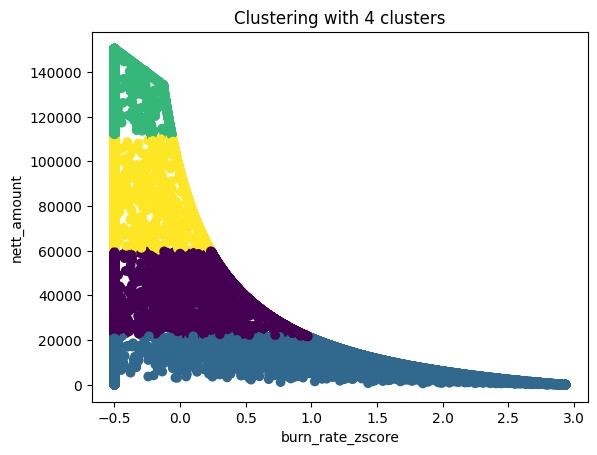

In [ ]:
features_P16_4, clusters_P16_4 = perform_clustering_KMeans(data_P16, 4)

##### KMeans Clustering Provinsi Bengkulu

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        burn_rate_zscore  nett_amount  discounts  cluster
540576         -0.052564      17400.0     2600.0        0
454037         -0.498908      86900.0        0.0        1
460238          0.221932      61150.0    16250.0        0
533138         -0.498908      10500.0        0.0        0
447720         -0.498908       6600.0        0.0        0


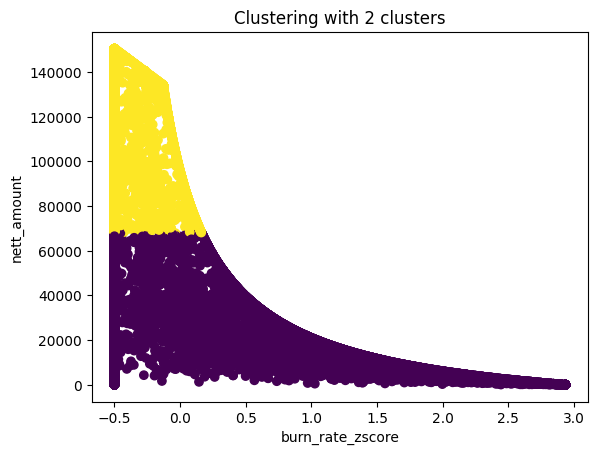

In [ ]:
features_P17_2, clusters_P17_2 = perform_clustering_KMeans(data_P17, 2)

###### Clustering Prov. Bengkulu with 2 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        burn_rate_zscore  nett_amount  discounts  cluster
540576         -0.052564      17400.0     2600.0        1
454037         -0.498908      86900.0        0.0        2
460238          0.221932      61150.0    16250.0        2
533138         -0.498908      10500.0        0.0        1
447720         -0.498908       6600.0        0.0        1


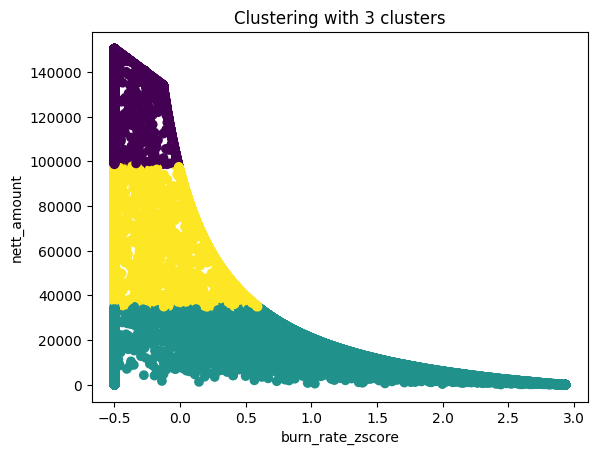

In [ ]:
features_P17_3, clusters_P17_3 = perform_clustering_KMeans(data_P17, 3)

###### Clustering Prov. Bengkulu with 3 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        burn_rate_zscore  nett_amount  discounts  cluster
540576         -0.052564      17400.0     2600.0        0
454037         -0.498908      86900.0        0.0        2
460238          0.221932      61150.0    16250.0        2
533138         -0.498908      10500.0        0.0        0
447720         -0.498908       6600.0        0.0        0


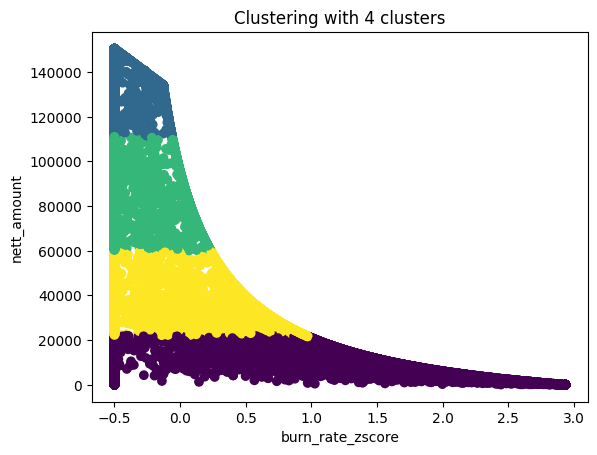

In [ ]:
features_P17_4, clusters_P17_4 = perform_clustering_KMeans(data_P17, 4)

###### Clustering Prov. Bengkulu with 4 clusters

##### KMeans Clustering Provinsi Maluku

###### Clustering Prov. Maluku with 2 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-176-eecdaa7b38c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = clusters


         burn_rate_zscore  nett_amount  discounts  cluster
2684576         -0.498908      18500.0        0.0        0
2684577         -0.498908     120600.0        0.0        1
2684578         -0.127944     134150.0    16250.0        1
2684579         -0.498908     100300.0        0.0        1
2684580         -0.498908      21600.0        0.0        0


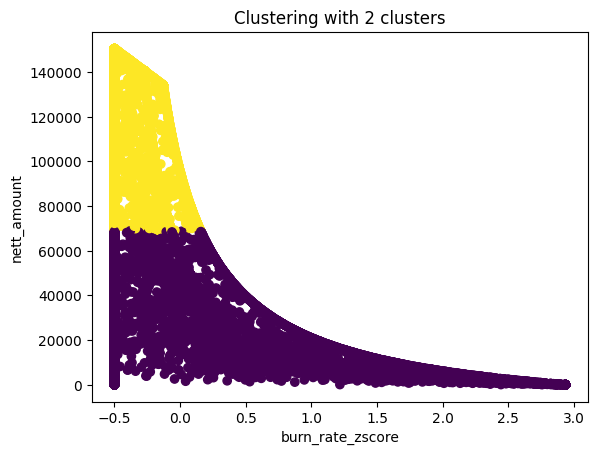

In [ ]:
features_P81_2, clusters_P81_2 = perform_clustering_KMeans(data_P81, 2)

###### Clustering Prov. Maluku with 3 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-176-eecdaa7b38c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = clusters


         burn_rate_zscore  nett_amount  discounts  cluster
2684576         -0.498908      18500.0        0.0        1
2684577         -0.498908     120600.0        0.0        0
2684578         -0.127944     134150.0    16250.0        0
2684579         -0.498908     100300.0        0.0        0
2684580         -0.498908      21600.0        0.0        1


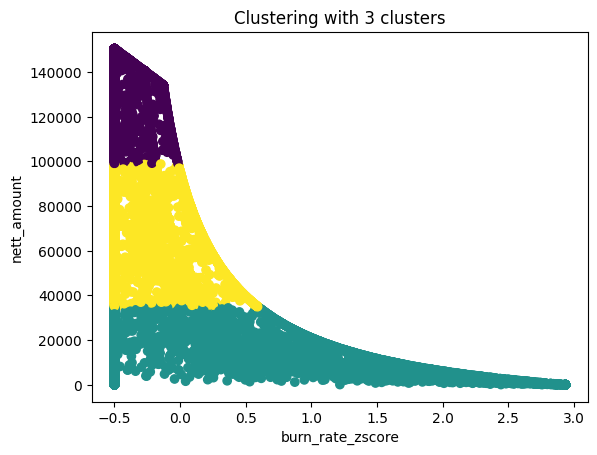

In [ ]:
features_P81_3, clusters_P81_3 = perform_clustering_KMeans(data_P81, 3)

###### Clustering Prov. Maluku with 4 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-176-eecdaa7b38c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = clusters


         burn_rate_zscore  nett_amount  discounts  cluster
2684576         -0.498908      18500.0        0.0        0
2684577         -0.498908     120600.0        0.0        1
2684578         -0.127944     134150.0    16250.0        1
2684579         -0.498908     100300.0        0.0        2
2684580         -0.498908      21600.0        0.0        0


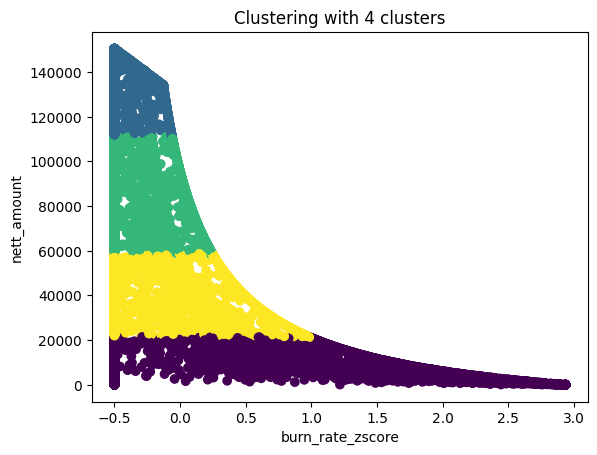

In [ ]:
features_P81_4, clusters_P81_4 = perform_clustering_KMeans(data_P81, 4)

#### Metric Evaluation

##### Davies-Bouldin Index (DBI)

The Davies-Bouldin Index (DBI) is a measure used to evaluate the quality of clustering. It considers both the scatter within clusters and the separation between clusters. Here's how to interpret the DBI:


---


Interpretation of Davies-Bouldin Index:
Lower DBI Values: Indicate better clustering performance. This means that clusters are more compact and well-separated from each other.

Higher DBI Values: Suggest poorer clustering performance, where clusters are less distinct and more overlapping.

**TLDR:**

Range = 0 - 1

semakin kecil = semakin bagus

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
def calculate_dbi_KMeans(features, clusters):
    return davies_bouldin_score(features, clusters)

###### Provinsi Jateng

In [ ]:
# Menghitung DBI untuk P33 dengan jumlah cluster yang berbeda
dbi_P33_2 = davies_bouldin_score(features_P33_2, clusters_P33_2)
dbi_P33_3 = davies_bouldin_score(features_P33_3, clusters_P33_3)
dbi_P33_4 = davies_bouldin_score(features_P33_4, clusters_P33_4)

# Menyimpan hasil evaluasi DBI untuk P33
results_P33 = {
    'n_clusters': [2, 3, 4],
    'DBI': [dbi_P33_2, dbi_P33_3, dbi_P33_4]
}

# Membuat DataFrame dari hasil evaluasi
results_P33_df = pd.DataFrame(results_P33)

# Menampilkan hasil evaluasi
results_P33_df

,n_clusters,DBI
0,2,0.409425
1,3,0.507741
2,4,0.578117


n=2 cluster memiliki skor terbaik

###### Provinsi Sumsel

In [ ]:
# Menghitung DBI untuk P16 dengan jumlah cluster yang berbeda
dbi_P16_2 = davies_bouldin_score(features_P16_2, clusters_P16_2)
dbi_P16_3 = davies_bouldin_score(features_P16_3, clusters_P16_3)
dbi_P16_4 = davies_bouldin_score(features_P16_4, clusters_P16_4)

# Menyimpan hasil evaluasi DBI untuk P16
results_P16 = {
    'n_clusters': [2, 3, 4],
    'DBI': [dbi_P16_2, dbi_P16_3, dbi_P16_4]
}

# Membuat DataFrame dari hasil evaluasi
results_P16_df = pd.DataFrame(results_P16)

# Menampilkan hasil evaluasi
results_P16_df

,n_clusters,DBI
0,2,0.404451
1,3,0.503715
2,4,0.565584


n=2 cluster memiliki skor terbaik

###### Provinsi Bengkulu

In [ ]:
# Menghitung DBI untuk P17 dengan jumlah cluster yang berbeda
dbi_P17_2 = davies_bouldin_score(features_P17_2, clusters_P17_2)
dbi_P17_3 = davies_bouldin_score(features_P17_3, clusters_P17_3)
dbi_P17_4 = davies_bouldin_score(features_P17_4, clusters_P17_4)

# Menyimpan hasil evaluasi DBI untuk P17
results_P17 = {
    'n_clusters': [2, 3, 4],
    'DBI': [dbi_P17_2, dbi_P17_3, dbi_P17_4]
}

# Membuat DataFrame dari hasil evaluasi
results_P17_df = pd.DataFrame(results_P17)

# Menampilkan hasil evaluasi
results_P17_df

,n_clusters,DBI
0,2,0.384813
1,3,0.485626
2,4,0.552127


n=2 cluster memiliki skor terbaik

###### Provinsi Maluku

In [ ]:
# Menghitung DBI untuk P81 dengan jumlah cluster yang berbeda
dbi_P81_2 = davies_bouldin_score(features_P81_2, clusters_P81_2)
dbi_P81_3 = davies_bouldin_score(features_P81_3, clusters_P81_3)
dbi_P81_4 = davies_bouldin_score(features_P81_4, clusters_P81_4)

# Menyimpan hasil evaluasi DBI untuk P81
results_P81 = {
    'n_clusters': [2, 3, 4],
    'DBI': [dbi_P81_2, dbi_P81_3, dbi_P81_4]
}

# Membuat DataFrame dari hasil evaluasi
results_P81_df = pd.DataFrame(results_P81)

# Menampilkan hasil evaluasi
results_P81_df

,n_clusters,DBI
0,2,0.369597
1,3,0.457947
2,4,0.513951


n=2 cluster memiliki skor terbaik

###### Summary DBI (saran tambah menggunakan grafik)

In [ ]:
# Menyimpan hasil evaluasi DBI untuk P33, P16, P17, dan P81 dalam satu DataFrame
summary_results = pd.concat([results_P33_df, results_P16_df, results_P17_df, results_P81_df], keys=['P33', 'P16', 'P17', 'P81'])

# Menampilkan summary
print("Summary of Davies-Bouldin Index (DBI) Evaluation:")
summary_results

Summary of Davies-Bouldin Index (DBI) Evaluation:


n_clusters       DBI
P33 0           2  0.409425
    1           3  0.507741
    2           4  0.578117
P16 0           2  0.404451
    1           3  0.503715
    2           4  0.565584
P17 0           2  0.384813
    1           3  0.485626
    2           4  0.552127
P81 0           2  0.369597
    1           3  0.457947
    2           4  0.513951

Kesimpulan:

n = 2 cluster itu memiliki skor DBI paling bagus

##### Silhouette Score

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

Range = 0 - 1

semakin besar = semakin bagus

In [ ]:
from sklearn.metrics import silhouette_score

def calculate_silhouette_score(features, clusters):
      return silhouette_score(features, clusters)

###### Provinsi Jateng

In [ ]:
# Menghitung Silhouette Score untuk P33 dengan jumlah cluster yang berbeda
silhouette_P33_2 = calculate_silhouette_score(features_P33_2, clusters_P33_2)
silhouette_P33_3 = calculate_silhouette_score(features_P33_3, clusters_P33_3)
silhouette_P33_4 = calculate_silhouette_score(features_P33_4, clusters_P33_4)

# Menyimpan hasil evaluasi Silhouette Score untuk P81
results_silhouette_P33 = {
    'n_clusters': [2, 3, 4],
    'Silhouette Score': [silhouette_P33_2, silhouette_P33_3, silhouette_P33_4]
}

# Membuat DataFrame dari hasil evaluasi
results_silhouette_P33_df = pd.DataFrame(results_silhouette_P33)

# Menampilkan hasil evaluasi
print("Silhouette Score for P33:")
results_silhouette_P33_df

Silhouette Score for P33:


,n_clusters,Silhouette Score
0,2,0.739358
1,3,0.662761
2,4,0.606827


In [ ]:
# Menampilkan hasil evaluasi
print("Silhouette Score for P33:")
results_silhouette_P33_df

Silhouette Score for P33:


,n_clusters,Silhouette Score
0,2,0.739358
1,3,0.662761
2,4,0.606827


n=2 cluster memiliki skor terbaik

###### Provinsi Sumsel

In [ ]:
# Menghitung Silhouette Score untuk P16 dengan jumlah cluster yang berbeda
silhouette_P16_2 = silhouette_score(features_P16_2, clusters_P16_2)
silhouette_P16_3 = silhouette_score(features_P16_3, clusters_P16_3)
silhouette_P16_4 = silhouette_score(features_P16_4, clusters_P16_4)

# Menyimpan hasil evaluasi Silhouette Score untuk P16
results_silhouette_P16 = {
    'n_clusters': [2, 3, 4],
    'Silhouette Score': [silhouette_P16_2, silhouette_P16_3, silhouette_P16_4]
}

# Membuat DataFrame dari hasil evaluasi
results_silhouette_P16_df = pd.DataFrame(results_silhouette_P16)

# Menampilkan hasil evaluasi
print("Silhouette Score for P16:")
results_silhouette_P16_df

Silhouette Score for P16:


,n_clusters,Silhouette Score
0,2,0.754194
1,3,0.673053
2,4,0.620302


n=2 cluster memiliki skor terbaik

###### Provinsi Bengkulu

In [ ]:
# Menghitung Silhouette Score untuk P17 dengan jumlah cluster yang berbeda
silhouette_P17_2 = silhouette_score(features_P17_2, clusters_P17_2)
silhouette_P17_3 = silhouette_score(features_P17_3, clusters_P17_3)
silhouette_P17_4 = silhouette_score(features_P17_4, clusters_P17_4)

# Menyimpan hasil evaluasi Silhouette Score untuk P17
results_silhouette_P17 = {
    'n_clusters': [2, 3, 4],
    'Silhouette Score': [silhouette_P17_2, silhouette_P17_3, silhouette_P17_4]
}

# Membuat DataFrame dari hasil evaluasi
results_silhouette_P17_df = pd.DataFrame(results_silhouette_P17)

# Menampilkan hasil evaluasi
print("Silhouette Score for P17:")
results_silhouette_P17_df

Silhouette Score for P17:


,n_clusters,Silhouette Score
0,2,0.765656
1,3,0.690214
2,4,0.629458


n=2 cluster memiliki skor terbaik

###### Provinsi Maluku

In [ ]:
# Menghitung Silhouette Score untuk P81 dengan jumlah cluster yang berbeda
silhouette_P81_2 = silhouette_score(features_P81_2, clusters_P81_2)
silhouette_P81_3 = silhouette_score(features_P81_3, clusters_P81_3)
silhouette_P81_4 = silhouette_score(features_P81_4, clusters_P81_4)

# Menyimpan hasil evaluasi Silhouette Score untuk P81
results_silhouette_P81 = {
    'n_clusters': [2, 3, 4],
    'Silhouette Score': [silhouette_P81_2, silhouette_P81_3, silhouette_P81_4]
}

# Membuat DataFrame dari hasil evaluasi
results_silhouette_P81_df = pd.DataFrame(results_silhouette_P81)

# Menampilkan hasil evaluasi
print("Silhouette Score for P81:")
results_silhouette_P81_df

Silhouette Score for P81:


,n_clusters,Silhouette Score
0,2,0.780892
1,3,0.712651
2,4,0.653287


n=2 cluster memiliki skor terbaik

###### Summary Silhouette Score (SS) (saran tambah menggunakan grafik)

In [ ]:
# Menyimpan hasil evaluasi Silhoutte Score untuk P33, P16, P17, dan P81 dalam satu DataFrame
summary_results = pd.concat([results_silhouette_P33_df, results_silhouette_P16_df, results_silhouette_P17_df, results_silhouette_P81_df], keys=['P33', 'P16', 'P17', 'P81'])

In [ ]:
# Menampilkan summary
print("Summary of Silhoutte Score Evaluation:")
summary_results

Summary of Silhoutte Score Evaluation:


n_clusters  Silhouette Score
P33 0           2          0.739358
    1           3          0.662761
    2           4          0.606827
P16 0           2          0.754194
    1           3          0.673053
    2           4          0.620302
P17 0           2          0.765656
    1           3          0.690214
    2           4          0.629458
P81 0           2          0.780892
    1           3          0.712651
    2           4          0.653287

Kesimpulan:

n = 2 cluster itu memiliki skor SS paling bagus

##### Kesimpulan

### KMeans Clustering for All Province

Walaupun DBI score dan Silhouette Score per provinsi mirip, karna kita tidak bisa melambangkan provinsi 'A' dengan provinsi 'B', jadi kita akan merge semua provinsi dengan si

Karena telah disimpulkan 2 klaster yang paling bagus, kita hanya cek 2 klaster

#### Understanding the data used

##### Jateng

In [ ]:
data_P33.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
2449253,TRX2546436,SC3328132013002,2,11300.0,11300.0,2024-08-29,33,Woman Fashion,ENI,perempuan,...,JAWA TENGAH,1,0.0,1,37,422,100.0,2.934510,3,0
878932,TRX967487,SC3309112009023,11,4100.0,0.0,2024-06-11,33,Top Up Game,FATIMAH SRI,perempuan,...,JAWA TENGAH,0,4100.0,0,32,382,0.0,-0.498908,2,0
2247795,TRX2343869,SC3317102024016,10,2200.0,0.0,2024-10-30,33,"Transportasi (Kereta, Pesawat, Kapal)",SARIFAH YUDHISTI DHINI ARIZA,perempuan,...,JAWA TENGAH,0,2200.0,0,54,403,0.0,-0.498908,4,0
2132916,TRX2228415,SC3327042009005,15,2300.0,0.0,2024-06-27,33,Investasi,SUHARTI NURAZIZAH,perempuan,...,JAWA TENGAH,0,2300.0,0,33,419,0.0,-0.498908,2,0
951028,TRX1039999,SC3329102009022,7,3800.0,0.0,2024-09-02,33,Keperluan Anak,HESTY KONTERIUS,perempuan,...,JAWA TENGAH,0,3800.0,0,25,415,0.0,-0.498908,3,0


##### Bengkulu

In [ ]:
data_P17.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
540576,TRX644537,SC1706012006006,10,20000.0,2600.0,2024-01-02,17,"Transportasi (Kereta, Pesawat, Kapal)",MALAYSIANA,perempuan,...,BENGKULU,1,17400.0,0,33,424,13.000000,-0.052564,1,0
454037,TRX557561,SC1703202005001,14,86900.0,0.0,2024-04-23,17,Kesehatan,ENDANG AYU EKA Handayani,perempuan,...,BENGKULU,0,86900.0,0,40,415,0.000000,-0.498908,2,2
460238,TRX563832,SC1703122005001,4,77400.0,16250.0,2024-03-11,17,Ride Hailing,SABRI KEMAL,laki-laki,...,BENGKULU,1,61150.0,0,40,389,20.994832,0.221932,1,2
533138,TRX637075,SC1707112005002,1,10500.0,0.0,2024-10-11,17,Man Fashion,NIZAR,laki-laki,...,BENGKULU,0,10500.0,0,33,445,0.000000,-0.498908,4,0
447720,TRX551202,SC1709092010003,7,6600.0,0.0,2024-12-07,17,Keperluan Anak,DIMUNTUR,laki-laki,...,BENGKULU,0,6600.0,0,17,387,0.000000,-0.498908,4,0


##### Sumsel

In [ ]:
data_P16.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
202563,TRX610966,SC1606012003004,9,16700.0,0.0,2024-06-17,16,Other,TITIN,perempuan,...,SUMATERA SELATAN,0,16700.0,0,43,431,0.0,-0.498908,2,1
144494,TRX552393,SC1604101043004,11,5300.0,0.0,2024-12-01,16,Top Up Game,Dra. ANA,perempuan,...,SUMATERA SELATAN,0,5300.0,0,25,368,0.0,-0.498908,4,1
362650,TRX772326,SC1608092020001,4,3700.0,0.0,2024-01-29,16,Ride Hailing,RIFAYLI ISKANDAR MUKTI,laki-laki,...,SUMATERA SELATAN,0,3700.0,0,31,453,0.0,-0.498908,1,1
138773,TRX546658,SC1604062022003,3,150400.0,0.0,2024-04-04,16,Food & Drink,HIDAYAT H. S.Sos.,laki-laki,...,SUMATERA SELATAN,0,150400.0,0,44,390,0.0,-0.498908,2,2
119371,TRX527146,SC1671021003010,3,75400.0,0.0,2024-09-16,16,Food & Drink,Ir. HAYAT,laki-laki,...,SUMATERA SELATAN,0,75400.0,0,26,423,0.0,-0.498908,3,3


##### Maluku

In [ ]:
data_P81.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
2684576,TRX668320,SC8104022023001,1,18500.0,0.0,2024-10-16,81,Man Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,0,18500.0,0,17,393,0.000000,-0.498908,4,0
2684577,TRX668321,SC8104022023001,1,120600.0,0.0,2024-02-03,81,Man Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,0,120600.0,0,17,393,0.000000,-0.498908,1,1
2684578,TRX668322,SC8104022023001,1,150400.0,16250.0,2024-02-06,81,Man Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,1,134150.0,0,17,393,10.804521,-0.127944,1,1
2684579,TRX668323,SC8104022023001,2,100300.0,0.0,2024-04-28,81,Woman Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,0,100300.0,0,17,393,0.000000,-0.498908,2,2
2684580,TRX668324,SC8104022023001,2,21600.0,0.0,2024-04-14,81,Woman Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,0,21600.0,0,17,393,0.000000,-0.498908,2,0


#### Merging 4 Province

In [ ]:
df_province = pd.concat([data_P33, data_P81, data_P17, data_P16], ignore_index=True)

In [ ]:
df_province.info()

In [ ]:
df_province.head()

#### Initiate Clustering

sesuai perjanjian, kita pakai 2 kluster

##### Proses Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   burn_rate_zscore  nett_amount  discounts  cluster
0          2.934510          0.0    11300.0        0
1         -0.498908       4100.0        0.0        0
2         -0.498908       2200.0        0.0        0
3         -0.498908       2300.0        0.0        0
4         -0.498908       3800.0        0.0        0


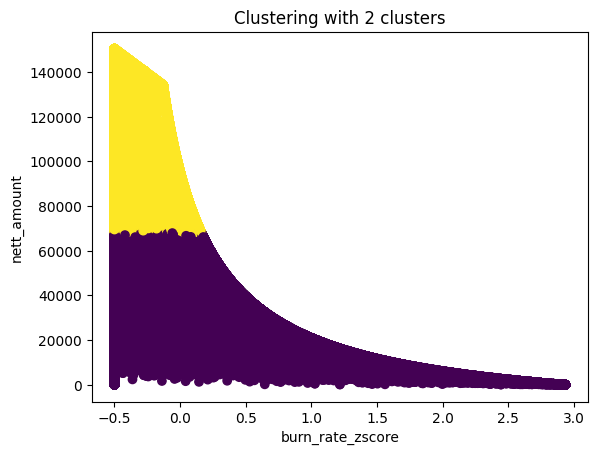

In [ ]:
features_df_province_2, clusters_df_province_2 = perform_clustering_KMeans(df_province, 2)

#### Metric Evaluation

##### Davies-Bouldin Index (DBI)

The Davies-Bouldin Index (DBI) is a measure used to evaluate the quality of clustering. It considers both the scatter within clusters and the separation between clusters. Here's how to interpret the DBI:


---


Interpretation of Davies-Bouldin Index:
Lower DBI Values: Indicate better clustering performance. This means that clusters are more compact and well-separated from each other.

Higher DBI Values: Suggest poorer clustering performance, where clusters are less distinct and more overlapping.

**TLDR:**

Range = 0 - 1

semakin kecil = semakin bagus

In [ ]:
dbi_province_2 = davies_bouldin_score(features_df_province_2, clusters_df_province_2)

In [ ]:
dbi_province_2

0.39284719268506074

##### Silhouette Score

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [ ]:
silhouette_province_2 = calculate_silhouette_score(features_df_province_2, clusters_df_province_2)

In [ ]:
silhouette_province_2

0.7595173231768331

##### Kesimpulan

In [ ]:
# Menghitung Total Orders/Cluster
df_province['cluster'].value_counts()

cluster
0    165783
1     43541
Name: count, dtype: int64

In [ ]:
unique_transaction_count = df_province['transaction_id'].nunique()
print("Jumlah total transaction_id yang unik:", unique_transaction_count)

Jumlah total transaction_id yang unik: 187350


In [ ]:
transaction = df_province['transaction_id'].count()
print("Jumlah total transaction_id :", transaction)

Jumlah total transaction_id : 209324


In [ ]:
count_cluster_0 = (df_province['cluster'] == 0).sum()
print("Total kemunculan Cluster 0:", count_cluster_0)

Total kemunculan Cluster 0: 165783


In [ ]:
count_cluster_1 = (df_province['cluster'] == 1).sum()
print("Total kemunculan Cluster 1:", count_cluster_1)

Total kemunculan Cluster 1: 43541


In [ ]:
df_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209324 entries, 0 to 209323
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transaction_id        209324 non-null  object        
 1   user_id               209324 non-null  object        
 2   product_id            209324 non-null  int64         
 3   gross_amount          209324 non-null  float64       
 4   discounts             209324 non-null  float64       
 5   transaction_date      209324 non-null  datetime64[ns]
 6   kode provinsi         209324 non-null  object        
 7   product name          209324 non-null  object        
 8   full_name             209324 non-null  object        
 9   gender                209324 non-null  object        
 10  money_spent           209324 non-null  float64       
 11  refund                209324 non-null  float64       
 12  wallet_balance        209324 non-null  float64       
 13 

In [ ]:
# List of features for which to calculate the mean
features = ['discounts', 'nett_amount', 'burn_rate_zscore']

# Calculate the mean for the specified features
df_means = df_province.groupby('cluster')[features].mean().reset_index()

In [ ]:
# Displaying the means of the specified features
df_means

,cluster,discounts,nett_amount,burn_rate_zscore
0,0,2538.053962,15760.711291,-0.001121
1,1,4967.343423,120450.731494,-0.365264


In [ ]:
# Melihat dataset hanya untuk Cluster 0
cluster_0_data = df_province[df_province['cluster'] == 0]

# Menampilkan data hasil
cluster_0_data.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
0,TRX2546436,SC3328132013002,2,11300.0,11300.0,2024-08-29,33,Woman Fashion,ENI,perempuan,...,JAWA TENGAH,1,0.0,1,37,422,100.0,2.934510,3,0
1,TRX967487,SC3309112009023,11,4100.0,0.0,2024-06-11,33,Top Up Game,FATIMAH SRI,perempuan,...,JAWA TENGAH,0,4100.0,0,32,382,0.0,-0.498908,2,0
2,TRX2343869,SC3317102024016,10,2200.0,0.0,2024-10-30,33,"Transportasi (Kereta, Pesawat, Kapal)",SARIFAH YUDHISTI DHINI ARIZA,perempuan,...,JAWA TENGAH,0,2200.0,0,54,403,0.0,-0.498908,4,0
3,TRX2228415,SC3327042009005,15,2300.0,0.0,2024-06-27,33,Investasi,SUHARTI NURAZIZAH,perempuan,...,JAWA TENGAH,0,2300.0,0,33,419,0.0,-0.498908,2,0
4,TRX1039999,SC3329102009022,7,3800.0,0.0,2024-09-02,33,Keperluan Anak,HESTY KONTERIUS,perempuan,...,JAWA TENGAH,0,3800.0,0,25,415,0.0,-0.498908,3,0


In [ ]:
# Melihat dataset hanya untuk Cluster 0
cluster_1_data = df_province[df_province['cluster'] == 1]

# Menampilkan data hasil
cluster_1_data.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
6,TRX793936,SC3302012008017,5,150400.0,0.0,2024-04-29,33,Keperluan Rumah Tangga,DIAN,perempuan,...,JAWA TENGAH,0,150400.0,0,44,429,0.000000,-0.498908,2,1
12,TRX1661077,SC3310042010006,1,150400.0,0.0,2024-11-20,33,Man Fashion,"AHMAD FIRDAUS S.I.P., M.Si.",laki-laki,...,JAWA TENGAH,0,150400.0,0,39,407,0.000000,-0.498908,4,1
14,TRX1385257,SC3320022007017,17,150400.0,0.0,2024-01-23,33,Hotel,DWI ROBUNI,perempuan,...,JAWA TENGAH,0,150400.0,0,30,382,0.000000,-0.498908,1,1
15,TRX2641746,SC3323052004005,3,150400.0,16250.0,2024-03-26,33,Food & Drink,AGUSTINUS,laki-laki,...,JAWA TENGAH,1,134150.0,0,55,418,10.804521,-0.127944,1,1
16,TRX1296739,SC3315152004008,14,150400.0,16250.0,2024-12-09,33,Kesehatan,JOHAN OKTAVIANI,perempuan,...,JAWA TENGAH,1,134150.0,0,34,417,10.804521,-0.127944,4,1


## SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#### Understanding the data used

In [ ]:
data_P33.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
2449253,TRX2546436,SC3328132013002,2,11300.0,11300.0,2024-08-29,33,Woman Fashion,ENI,perempuan,...,JAWA TENGAH,1,0.0,1,37,422,100.0,2.934510,3,0
878932,TRX967487,SC3309112009023,11,4100.0,0.0,2024-06-11,33,Top Up Game,FATIMAH SRI,perempuan,...,JAWA TENGAH,0,4100.0,0,32,382,0.0,-0.498908,2,0
2247795,TRX2343869,SC3317102024016,10,2200.0,0.0,2024-10-30,33,"Transportasi (Kereta, Pesawat, Kapal)",SARIFAH YUDHISTI DHINI ARIZA,perempuan,...,JAWA TENGAH,0,2200.0,0,54,403,0.0,-0.498908,4,0
2132916,TRX2228415,SC3327042009005,15,2300.0,0.0,2024-06-27,33,Investasi,SUHARTI NURAZIZAH,perempuan,...,JAWA TENGAH,0,2300.0,0,33,419,0.0,-0.498908,2,0
951028,TRX1039999,SC3329102009022,7,3800.0,0.0,2024-09-02,33,Keperluan Anak,HESTY KONTERIUS,perempuan,...,JAWA TENGAH,0,3800.0,0,25,415,0.0,-0.498908,3,0


In [ ]:
# Menghapus kolom 'cluster'
data_P33.drop(columns=['cluster'], inplace=True)

In [ ]:
data_P17.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
540576,TRX644537,SC1706012006006,10,20000.0,2600.0,2024-01-02,17,"Transportasi (Kereta, Pesawat, Kapal)",MALAYSIANA,perempuan,...,BENGKULU,1,17400.0,0,33,424,13.000000,-0.052564,1,0
454037,TRX557561,SC1703202005001,14,86900.0,0.0,2024-04-23,17,Kesehatan,ENDANG AYU EKA Handayani,perempuan,...,BENGKULU,0,86900.0,0,40,415,0.000000,-0.498908,2,2
460238,TRX563832,SC1703122005001,4,77400.0,16250.0,2024-03-11,17,Ride Hailing,SABRI KEMAL,laki-laki,...,BENGKULU,1,61150.0,0,40,389,20.994832,0.221932,1,2
533138,TRX637075,SC1707112005002,1,10500.0,0.0,2024-10-11,17,Man Fashion,NIZAR,laki-laki,...,BENGKULU,0,10500.0,0,33,445,0.000000,-0.498908,4,0
447720,TRX551202,SC1709092010003,7,6600.0,0.0,2024-12-07,17,Keperluan Anak,DIMUNTUR,laki-laki,...,BENGKULU,0,6600.0,0,17,387,0.000000,-0.498908,4,0


In [ ]:
# Menghapus kolom 'cluster'
data_P17.drop(columns=['cluster'], inplace=True)

In [ ]:
data_P16.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
202563,TRX610966,SC1606012003004,9,16700.0,0.0,2024-06-17,16,Other,TITIN,perempuan,...,SUMATERA SELATAN,0,16700.0,0,43,431,0.0,-0.498908,2,1
144494,TRX552393,SC1604101043004,11,5300.0,0.0,2024-12-01,16,Top Up Game,Dra. ANA,perempuan,...,SUMATERA SELATAN,0,5300.0,0,25,368,0.0,-0.498908,4,1
362650,TRX772326,SC1608092020001,4,3700.0,0.0,2024-01-29,16,Ride Hailing,RIFAYLI ISKANDAR MUKTI,laki-laki,...,SUMATERA SELATAN,0,3700.0,0,31,453,0.0,-0.498908,1,1
138773,TRX546658,SC1604062022003,3,150400.0,0.0,2024-04-04,16,Food & Drink,HIDAYAT H. S.Sos.,laki-laki,...,SUMATERA SELATAN,0,150400.0,0,44,390,0.0,-0.498908,2,2
119371,TRX527146,SC1671021003010,3,75400.0,0.0,2024-09-16,16,Food & Drink,Ir. HAYAT,laki-laki,...,SUMATERA SELATAN,0,75400.0,0,26,423,0.0,-0.498908,3,3


In [ ]:
# Menghapus kolom 'cluster'
data_P16.drop(columns=['cluster'], inplace=True)

In [ ]:
data_P81.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
2684576,TRX668320,SC8104022023001,1,18500.0,0.0,2024-10-16,81,Man Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,0,18500.0,0,17,393,0.000000,-0.498908,4,0
2684577,TRX668321,SC8104022023001,1,120600.0,0.0,2024-02-03,81,Man Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,0,120600.0,0,17,393,0.000000,-0.498908,1,1
2684578,TRX668322,SC8104022023001,1,150400.0,16250.0,2024-02-06,81,Man Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,1,134150.0,0,17,393,10.804521,-0.127944,1,1
2684579,TRX668323,SC8104022023001,2,100300.0,0.0,2024-04-28,81,Woman Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,0,100300.0,0,17,393,0.000000,-0.498908,2,2
2684580,TRX668324,SC8104022023001,2,21600.0,0.0,2024-04-14,81,Woman Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,0,21600.0,0,17,393,0.000000,-0.498908,2,0


In [ ]:
# Menghapus kolom 'cluster'
data_P81.drop(columns=['cluster'], inplace=True)

<ipython-input-232-717503dcb361>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P81.drop(columns=['cluster'], inplace=True)


### Initiate Clustering

In [ ]:
# Function to perform SVM clustering
def svm_clustering(data, gamma=0.1, nu=0.1):
    # Mengambil fitur yang dipilih
    features = data[['burn_rate_zscore', 'nett_amount', 'discounts']]

    # Standardize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(features)

    # Train One-Class SVM
    ocsvm = OneClassSVM(kernel='rbf', gamma=gamma, nu=nu)
    ocsvm.fit(X)

    # Predict clusters
    cluster_labels = ocsvm.predict(X)

    # Convert -1 labels to 0 for clustering purposes
    cluster_labels = np.where(cluster_labels == -1, 0, 1)

    # Add cluster labels to the original data
    data['cluster'] = cluster_labels

    return data

untuk menghemat resource, kami clustering masing - masing provinsi terlebih dahulu, lalu akan kami merge

#### Jateng

In [ ]:
data_P33_clustered = svm_clustering(data_P33)

#### Sumsel

In [ ]:
data_P16_clustered = svm_clustering(data_P16)

#### Bengkulu

In [ ]:
data_P17_clustered = svm_clustering(data_P17)

#### Maluku

In [ ]:
# Applying SVM clustering to each dataset
data_P81_clustered = svm_clustering(data_P81)

<ipython-input-233-d01444834a62>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = cluster_labels


#### All Province

Tinggal merge saja dari hasil clustering diatas

In [ ]:
df_province2 = pd.concat([data_P33_clustered, data_P81_clustered, data_P17_clustered, data_P16_clustered], ignore_index=True)

In [ ]:
df_province2['cluster'].value_counts()

cluster
1    189429
0     19895
Name: count, dtype: int64

In [ ]:
df_province2.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
0,TRX2546436,SC3328132013002,2,11300.0,11300.0,2024-08-29,33,Woman Fashion,ENI,perempuan,...,JAWA TENGAH,1,0.0,1,37,422,100.0,2.934510,3,1
1,TRX967487,SC3309112009023,11,4100.0,0.0,2024-06-11,33,Top Up Game,FATIMAH SRI,perempuan,...,JAWA TENGAH,0,4100.0,0,32,382,0.0,-0.498908,2,1
2,TRX2343869,SC3317102024016,10,2200.0,0.0,2024-10-30,33,"Transportasi (Kereta, Pesawat, Kapal)",SARIFAH YUDHISTI DHINI ARIZA,perempuan,...,JAWA TENGAH,0,2200.0,0,54,403,0.0,-0.498908,4,1
3,TRX2228415,SC3327042009005,15,2300.0,0.0,2024-06-27,33,Investasi,SUHARTI NURAZIZAH,perempuan,...,JAWA TENGAH,0,2300.0,0,33,419,0.0,-0.498908,2,1
4,TRX1039999,SC3329102009022,7,3800.0,0.0,2024-09-02,33,Keperluan Anak,HESTY KONTERIUS,perempuan,...,JAWA TENGAH,0,3800.0,0,25,415,0.0,-0.498908,3,1


### Metric Evaluation

##### Davies-Bouldin Index (DBI) (not valid)

The Davies-Bouldin Index (DBI) is a measure used to evaluate the quality of clustering. It considers both the scatter within clusters and the separation between clusters. Here's how to interpret the DBI:


---


Interpretation of Davies-Bouldin Index:
Lower DBI Values: Indicate better clustering performance. This means that clusters are more compact and well-separated from each other.

Higher DBI Values: Suggest poorer clustering performance, where clusters are less distinct and more overlapping.

**TLDR:**

Range = 0 - 1

semakin kecil = semakin bagus

In [ ]:
# Function to calculate Davies-Bouldin Index
def calculate_dbi_SVM(data):
    # Mengambil fitur yang dipilih
    features = data[['burn_rate_zscore', 'nett_amount', 'discounts']]
    labels = data['cluster']
    dbi = davies_bouldin_score(features, labels)
    return dbi

# Calculate Davies-Bouldin Index for each dataset
dbi_P33 = calculate_dbi_SVM(data_P33_clustered)
dbi_P16 = calculate_dbi_SVM(data_P16_clustered)
dbi_P17 = calculate_dbi_SVM(data_P17_clustered)
dbi_P81 = calculate_dbi_SVM(data_P81_clustered)
dbi_allProvince = calculate_dbi_SVM(df_province2)

In [ ]:
# Print the Davies-Bouldin Index for each dataset
print(f"Davies-Bouldin Index for data_P33_clustered: {dbi_P33}")
print(f"Davies-Bouldin Index for data_P16_clustered: {dbi_P16}")
print(f"Davies-Bouldin Index for data_P17_clustered: {dbi_P17}")
print(f"Davies-Bouldin Index for data_P81_clustered: {dbi_P81}")
print(f"Davies-Bouldin Index for data_allProvince_clustered: {dbi_allProvince}")

Davies-Bouldin Index for data_P33_clustered: 5.041520953048087
Davies-Bouldin Index for data_P16_clustered: 2.8054743342884763
Davies-Bouldin Index for data_P17_clustered: 10.260585425653689
Davies-Bouldin Index for data_P81_clustered: 11.110935608935272
Davies-Bouldin Index for data_allProvince_clustered: 5.684512673983749


##### Silhouette Score

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

Range = 0 - 1

semakin besar = semakin bagus

In [ ]:
from sklearn.metrics import silhouette_score

def calculate_silhouette_score_SVM(data):
    features = data[['burn_rate_zscore', 'nett_amount', 'discounts']]
    labels = data['cluster']
    silhouette = silhouette_score(features, labels)
    return silhouette

Calculate Silhouette Score for each dataset

In [ ]:
Silhouette_P33 = calculate_silhouette_score_SVM(data_P33_clustered)

In [ ]:
Silhouette_P16 = calculate_silhouette_score_SVM(data_P16_clustered)

In [ ]:
Silhouette_P17 = calculate_silhouette_score_SVM(data_P17_clustered)

In [ ]:
Silhouette_P81 = calculate_silhouette_score_SVM(data_P81_clustered)

In [ ]:
Silhouette_allProvince = calculate_silhouette_score_SVM(df_province2)

In [ ]:
# Print the Silhouette Score for each dataset
print(f"Silhouette Score for data_P33_clustered: {Silhouette_P33}")
print(f"Silhouette Score for data_P16_clustered: {Silhouette_P16}")
print(f"Silhouette Score for data_P17_clustered: {Silhouette_P17}")
print(f"Silhouette Score for data_P81_clustered: {Silhouette_P81}")
print(f"Silhouette Score for data_allProvince_clustered: {Silhouette_allProvince}")

Silhouette Score for data_P33_clustered: 0.27145116328787816
Silhouette Score for data_P16_clustered: 0.39749125107334315
Silhouette Score for data_P17_clustered: 0.21695521731708958
Silhouette Score for data_P81_clustered: 0.1478656285955206
Silhouette Score for data_allProvince_clustered: 0.2807386053219826


##### Kesimpulan

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

#### Understanding the data used

In [ ]:
data_P33.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
2449253,TRX2546436,SC3328132013002,2,11300.0,11300.0,2024-08-29,33,Woman Fashion,ENI,perempuan,...,JAWA TENGAH,1,0.0,1,37,422,100.0,2.934510,3,1
878932,TRX967487,SC3309112009023,11,4100.0,0.0,2024-06-11,33,Top Up Game,FATIMAH SRI,perempuan,...,JAWA TENGAH,0,4100.0,0,32,382,0.0,-0.498908,2,1
2247795,TRX2343869,SC3317102024016,10,2200.0,0.0,2024-10-30,33,"Transportasi (Kereta, Pesawat, Kapal)",SARIFAH YUDHISTI DHINI ARIZA,perempuan,...,JAWA TENGAH,0,2200.0,0,54,403,0.0,-0.498908,4,1
2132916,TRX2228415,SC3327042009005,15,2300.0,0.0,2024-06-27,33,Investasi,SUHARTI NURAZIZAH,perempuan,...,JAWA TENGAH,0,2300.0,0,33,419,0.0,-0.498908,2,1
951028,TRX1039999,SC3329102009022,7,3800.0,0.0,2024-09-02,33,Keperluan Anak,HESTY KONTERIUS,perempuan,...,JAWA TENGAH,0,3800.0,0,25,415,0.0,-0.498908,3,1


In [ ]:
# Menghapus kolom 'cluster'
data_P33_m = data_P33.drop(columns=['cluster'], inplace=True)

In [ ]:
data_P17.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
540576,TRX644537,SC1706012006006,10,20000.0,2600.0,2024-01-02,17,"Transportasi (Kereta, Pesawat, Kapal)",MALAYSIANA,perempuan,...,BENGKULU,1,17400.0,0,33,424,13.000000,-0.052564,1,1
454037,TRX557561,SC1703202005001,14,86900.0,0.0,2024-04-23,17,Kesehatan,ENDANG AYU EKA Handayani,perempuan,...,BENGKULU,0,86900.0,0,40,415,0.000000,-0.498908,2,1
460238,TRX563832,SC1703122005001,4,77400.0,16250.0,2024-03-11,17,Ride Hailing,SABRI KEMAL,laki-laki,...,BENGKULU,1,61150.0,0,40,389,20.994832,0.221932,1,1
533138,TRX637075,SC1707112005002,1,10500.0,0.0,2024-10-11,17,Man Fashion,NIZAR,laki-laki,...,BENGKULU,0,10500.0,0,33,445,0.000000,-0.498908,4,1
447720,TRX551202,SC1709092010003,7,6600.0,0.0,2024-12-07,17,Keperluan Anak,DIMUNTUR,laki-laki,...,BENGKULU,0,6600.0,0,17,387,0.000000,-0.498908,4,1


In [ ]:
# Menghapus kolom 'cluster'
data_P17.drop(columns=['cluster'], inplace=True)

In [ ]:
data_P16.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
202563,TRX610966,SC1606012003004,9,16700.0,0.0,2024-06-17,16,Other,TITIN,perempuan,...,SUMATERA SELATAN,0,16700.0,0,43,431,0.0,-0.498908,2,1
144494,TRX552393,SC1604101043004,11,5300.0,0.0,2024-12-01,16,Top Up Game,Dra. ANA,perempuan,...,SUMATERA SELATAN,0,5300.0,0,25,368,0.0,-0.498908,4,1
362650,TRX772326,SC1608092020001,4,3700.0,0.0,2024-01-29,16,Ride Hailing,RIFAYLI ISKANDAR MUKTI,laki-laki,...,SUMATERA SELATAN,0,3700.0,0,31,453,0.0,-0.498908,1,1
138773,TRX546658,SC1604062022003,3,150400.0,0.0,2024-04-04,16,Food & Drink,HIDAYAT H. S.Sos.,laki-laki,...,SUMATERA SELATAN,0,150400.0,0,44,390,0.0,-0.498908,2,0
119371,TRX527146,SC1671021003010,3,75400.0,0.0,2024-09-16,16,Food & Drink,Ir. HAYAT,laki-laki,...,SUMATERA SELATAN,0,75400.0,0,26,423,0.0,-0.498908,3,1


In [ ]:
# Menghapus kolom 'cluster'
data_P16.drop(columns=['cluster'], inplace=True)

In [ ]:
data_P81.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
2684576,TRX668320,SC8104022023001,1,18500.0,0.0,2024-10-16,81,Man Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,0,18500.0,0,17,393,0.000000,-0.498908,4,1
2684577,TRX668321,SC8104022023001,1,120600.0,0.0,2024-02-03,81,Man Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,0,120600.0,0,17,393,0.000000,-0.498908,1,1
2684578,TRX668322,SC8104022023001,1,150400.0,16250.0,2024-02-06,81,Man Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,1,134150.0,0,17,393,10.804521,-0.127944,1,0
2684579,TRX668323,SC8104022023001,2,100300.0,0.0,2024-04-28,81,Woman Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,0,100300.0,0,17,393,0.000000,-0.498908,2,1
2684580,TRX668324,SC8104022023001,2,21600.0,0.0,2024-04-14,81,Woman Fashion,AGUS LONGKI Bakti,laki-laki,...,MALUKU,0,21600.0,0,17,393,0.000000,-0.498908,2,1


In [ ]:
# Menghapus kolom 'cluster'
data_P81.drop(columns=['cluster'], inplace=True)

<ipython-input-258-717503dcb361>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_P81.drop(columns=['cluster'], inplace=True)


### Initiate Clustering

In [ ]:
# Function to perform DBSCAN clustering
def dbscan_clustering(data, eps=0.5, min_samples=5):
    # Select relevant numerical features for clustering
    features = data[['burn_rate_zscore', 'nett_amount', 'discounts']]

    # Standardize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(features)

    # Fit DBSCAN clustering model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)

    # Add cluster labels to the original data
    data['cluster'] = dbscan.labels_

    # Evaluate clustering performance if there are at least 2 clusters
    if len(set(dbscan.labels_)) > 1:
        silhouette_avg = silhouette_score(X, dbscan.labels_)
        davies_bouldin = davies_bouldin_score(X, dbscan.labels_)
        print(f'Silhouette Score: {silhouette_avg}')
        print(f'Davies-Bouldin Index: {davies_bouldin}')
    else:
        print('DBSCAN resulted in only one cluster or no clusters, metrics not calculated.')

    return data

### Metric Evaluation (DBI & Silhouette Score)

#### Jateng

In [ ]:
result_dbi_33 = dbscan_clustering(data_P33, eps=0.2, min_samples=2)

Silhouette Score: 0.14178370680789448
Davies-Bouldin Index: 0.8043198723247617


In [ ]:
result_dbi_33['cluster'].value_counts()

cluster
 0    52330
-1        1
Name: count, dtype: int64

#### Bengkulu

In [ ]:
result_dbi_17 = dbscan_clustering(data_P17, eps=0.2, min_samples=2)

Silhouette Score: 0.34560935081149696
Davies-Bouldin Index: 0.6761945266278164


In [ ]:
result_dbi_17['cluster'].value_counts()

cluster
 0    52329
-1        2
Name: count, dtype: int64

#### Sumsel

In [ ]:
result_dbi_16 = dbscan_clustering(data_P16, eps=0.2, min_samples=2)

DBSCAN resulted in only one cluster or no clusters, metrics not calculated.


In [ ]:
result_dbi_16['cluster'].value_counts()

cluster
0    52331
Name: count, dtype: int64

#### Maluku

In [ ]:
result_dbi_81 = dbscan_clustering(data_P81, eps=0.2, min_samples=2)

<ipython-input-259-a6857f19a8b3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = dbscan.labels_


Silhouette Score: 0.5322444114483634
Davies-Bouldin Index: 0.7580521979720193


In [ ]:
result_dbi_81['cluster'].value_counts()

cluster
 0    52326
-1        5
Name: count, dtype: int64

#### All Province

In [ ]:
df_province3 = pd.concat([result_dbi_33, result_dbi_17, result_dbi_16, result_dbi_81], ignore_index=True)

In [ ]:
df_province3.head()

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
0,TRX2546436,SC3328132013002,2,11300.0,11300.0,2024-08-29,33,Woman Fashion,ENI,perempuan,...,JAWA TENGAH,1,0.0,1,37,422,100.0,2.934510,3,0
1,TRX967487,SC3309112009023,11,4100.0,0.0,2024-06-11,33,Top Up Game,FATIMAH SRI,perempuan,...,JAWA TENGAH,0,4100.0,0,32,382,0.0,-0.498908,2,0
2,TRX2343869,SC3317102024016,10,2200.0,0.0,2024-10-30,33,"Transportasi (Kereta, Pesawat, Kapal)",SARIFAH YUDHISTI DHINI ARIZA,perempuan,...,JAWA TENGAH,0,2200.0,0,54,403,0.0,-0.498908,4,0
3,TRX2228415,SC3327042009005,15,2300.0,0.0,2024-06-27,33,Investasi,SUHARTI NURAZIZAH,perempuan,...,JAWA TENGAH,0,2300.0,0,33,419,0.0,-0.498908,2,0
4,TRX1039999,SC3329102009022,7,3800.0,0.0,2024-09-02,33,Keperluan Anak,HESTY KONTERIUS,perempuan,...,JAWA TENGAH,0,3800.0,0,25,415,0.0,-0.498908,3,0


In [ ]:
# result_dbi_province3 = dbscan_clustering(df_province3, eps=0.2, min_samples=2)

In [ ]:
# result_dbi_province3['cluster'].value_counts()

In [ ]:
# Display the dataframe with cluster labels
# result_dbi_province3

##### Kesimpulan

## Perbandingan

# **EDA Insight After Cluster**

## Overview

In [ ]:
df_province

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
0,TRX2546436,SC3328132013002,2,11300.0,11300.0,2024-08-29,33,Woman Fashion,ENI,perempuan,...,JAWA TENGAH,1,0.0,1,37,422,100.000000,2.934510,3,0
1,TRX967487,SC3309112009023,11,4100.0,0.0,2024-06-11,33,Top Up Game,FATIMAH SRI,perempuan,...,JAWA TENGAH,0,4100.0,0,32,382,0.000000,-0.498908,2,0
2,TRX2343869,SC3317102024016,10,2200.0,0.0,2024-10-30,33,"Transportasi (Kereta, Pesawat, Kapal)",SARIFAH YUDHISTI DHINI ARIZA,perempuan,...,JAWA TENGAH,0,2200.0,0,54,403,0.000000,-0.498908,4,0
3,TRX2228415,SC3327042009005,15,2300.0,0.0,2024-06-27,33,Investasi,SUHARTI NURAZIZAH,perempuan,...,JAWA TENGAH,0,2300.0,0,33,419,0.000000,-0.498908,2,0
4,TRX1039999,SC3329102009022,7,3800.0,0.0,2024-09-02,33,Keperluan Anak,HESTY KONTERIUS,perempuan,...,JAWA TENGAH,0,3800.0,0,25,415,0.000000,-0.498908,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209319,TRX765134,SC1609152003002,10,3300.0,0.0,2024-06-14,16,"Transportasi (Kereta, Pesawat, Kapal)",ALLEGRA LOUSIANA,perempuan,...,SUMATERA SELATAN,0,3300.0,0,20,408,0.000000,-0.498908,2,0
209320,TRX536558,SC1674062004004,1,1300.0,0.0,2024-10-03,16,Man Fashion,NINU JOHAN,laki-laki,...,SUMATERA SELATAN,0,1300.0,0,29,415,0.000000,-0.498908,4,0
209321,TRX585576,SC1606062008002,13,1000.0,0.0,2024-10-13,16,Pulsa,RACHMAH MOORINA,perempuan,...,SUMATERA SELATAN,0,1000.0,0,34,391,0.000000,-0.498908,4,0
209322,TRX574347,SC1603152003002,1,4300.0,0.0,2024-09-15,16,Man Fashion,ANITA BUNGSU,perempuan,...,SUMATERA SELATAN,0,4300.0,0,23,445,0.000000,-0.498908,3,0


### Total Transaction / Cluster

In [ ]:
# Menghitung Total Orders/Cluster
df_province['cluster'].value_counts()

cluster
0    165783
1     43541
Name: count, dtype: int64

### Total Income / Cluster

In [ ]:
# Menghitung total_amount untuk setiap cluster tanpa filter tambahan
totals_all = df_province.groupby('cluster')['nett_amount'].sum()
totals_all

cluster
0    2.612858e+09
1    5.244545e+09
Name: nett_amount, dtype: float64

### Total Customer / Cluster

In [ ]:
# Menghitung jumlah pelanggan unik di setiap cluster
unique_customers_per_cluster = df_province.groupby('cluster')['user_id'].nunique()

print("Jumlah pelanggan unik di tiap cluster:\n", unique_customers_per_cluster)

Jumlah pelanggan unik di tiap cluster:
 cluster
0    48062
1    23922
Name: user_id, dtype: int64


## KPI / Cluster

In [ ]:
import numpy as np

# Membuat fungsi khusus untuk menghitung beberapa KPI berdasarkan Cluster
def calculate_kpi(group):
    sum_total_nett_amount = group['nett_amount'].sum()
    sum_discount_amount = group['discounts'].sum()
    total_unique_customers = group['user_id'].nunique()
    total_unique_transaction_id = group['transaction_id'].nunique()
    avg_order_value = sum_total_nett_amount / total_unique_transaction_id if total_unique_transaction_id != 0 else np.nan
    order_frequency = total_unique_transaction_id / total_unique_customers if total_unique_customers != 0 else np.nan
    customer_lifetime_value = sum_total_nett_amount / total_unique_customers if total_unique_customers != 0 else np.nan
    burn_rate_percentage = group['burn_rate_percentage'].mean()
    burn_rate_zscore = group['burn_rate_zscore'].mean()

    return pd.Series({
        'Total Income': sum_total_nett_amount,
        'Budget Discount': sum_discount_amount,
        'Total Customers': total_unique_customers,
        'Total Orders': total_unique_transaction_id,
        'AOV': avg_order_value,
        'Order Frequency': order_frequency,
        'Customer_Lifetime_Value': customer_lifetime_value,
        'Burn_rate_percentage': burn_rate_percentage,
        'Burn_rate_Zscore': burn_rate_zscore
    })

# Menghitung KPI untuk setiap Cluster
kpi_by_cluster = df_province.groupby('cluster').apply(calculate_kpi)

kpi_by_cluster


,Total Income,Budget Discount,Total Customers,Total Orders,AOV,Order Frequency,Customer_Lifetime_Value,Burn_rate_percentage,Burn_rate_Zscore
cluster,,,,,,,,,
0,2.612858e+09,420766200.0,48062.0,151385.0,17259.688873,3.149786,54364.321085,14.498291,-0.001121
1,5.244545e+09,216283100.0,23922.0,42665.0,122923.832181,1.783505,219235.235348,3.892467,-0.365264


### Total Income /Cluster

In [ ]:
total_income_per_cluster = df_province.groupby('cluster')['nett_amount'].sum()
print("Total Income per Cluster:\n", total_income_per_cluster)

Total Income per Cluster:
 cluster
0    2.612858e+09
1    5.244545e+09
Name: nett_amount, dtype: float64


### Budget Discount / Cluster

In [ ]:
budget_promo_per_cluster = df_province.groupby('cluster')['discounts'].sum()
print("Budget Promo per Cluster:\n", budget_promo_per_cluster)

Budget Promo per Cluster:
 cluster
0    420766200.0
1    216283100.0
Name: discounts, dtype: float64


### Total Customers / Cluster

In [ ]:
total_customers_per_cluster = df_province.groupby('cluster')['user_id'].nunique()
print("Total Customers per Cluster:\n", total_customers_per_cluster)

Total Customers per Cluster:
 cluster
0    48062
1    23922
Name: user_id, dtype: int64


### Total Orders / Cluster

In [ ]:
total_orders_per_cluster = df_province.groupby('cluster')['transaction_id'].nunique()
print("Total Orders per Cluster:\n", total_orders_per_cluster)

Total Orders per Cluster:
 cluster
0    151385
1     42665
Name: transaction_id, dtype: int64


### Average Order Value (AOV) per Cluster

In [ ]:
avg_order_value_per_cluster = total_income_per_cluster / total_orders_per_cluster
print("Average Order Value (AOV) per Cluster:\n", avg_order_value_per_cluster)

Average Order Value (AOV) per Cluster:
 cluster
0     17259.688873
1    122923.832181
dtype: float64


### Order Frequency per Cluster

In [ ]:
order_frequency_per_cluster = total_orders_per_cluster / total_customers_per_cluster
print("Order Frequency per Cluster:\n", order_frequency_per_cluster)

Order Frequency per Cluster:
 cluster
0    3.149786
1    1.783505
dtype: float64


### Customer Lifetime Value per Cluster

In [ ]:
customer_lifetime_value_per_cluster = total_income_per_cluster / total_customers_per_cluster
print("Customer Lifetime Value per Cluster:\n", customer_lifetime_value_per_cluster)

Customer Lifetime Value per Cluster:
 cluster
0     54364.321085
1    219235.235348
dtype: float64


### Burn_rate_percentage per Cluster

In [ ]:
burn_rate_percentage_per_cluster = df_province.groupby('cluster')['burn_rate_percentage'].mean()
print("Burn_rate_percentage per Cluster:\n", burn_rate_percentage_per_cluster)

Burn_rate_percentage per Cluster:
 cluster
0    14.498291
1     3.892467
Name: burn_rate_percentage, dtype: float64


### Burn_rate_Zscore per Cluster

In [ ]:
burn_rate_zscore_per_cluster = df_province.groupby('cluster')['burn_rate_zscore'].mean()
print("Burn_rate_Zscore per Cluster:\n", burn_rate_zscore_per_cluster)

Burn_rate_Zscore per Cluster:
 cluster
0   -0.001121
1   -0.365264
Name: burn_rate_zscore, dtype: float64


## Discounts Insight / Cluster (Flag 1,0)

### Total Orders / Cluster (Discounts)

In [ ]:
# Menghitung jumlah nilai 'is_discounted' yang bernilai 1 di setiap kelompok 'Cluster'
flag_promo_count = df_province[df_province['is_discounted'] == 1].groupby('cluster')['is_discounted'].count()

print(flag_promo_count)

cluster
0    40319
1    15294
Name: is_discounted, dtype: int64


### Total Orders / Cluster (Non Discounts)

In [ ]:
# Menghitung jumlah nilai 'is_discounted' yang bernilai 0 di setiap kelompok 'Cluster'
flag_promo_count = df_province[df_province['is_discounted'] == 0].groupby('cluster')['is_discounted'].count()

print(flag_promo_count)

cluster
0    125464
1     28247
Name: is_discounted, dtype: int64


### Total Income / Cluster (Discounts)

In [ ]:
# Filter data dengan is_discounted = 1 dan menghitung total_amount untuk setiap cluster
filtered_df = df_province[df_province['is_discounted'] == 1]
totals_flag_promo_1 = filtered_df.groupby('cluster')['nett_amount'].sum()

print("Total Income With Promo / Cluster", totals_flag_promo_1)

Total Income With Promo / Cluster cluster
0    6.602999e+08
1    1.793425e+09
Name: nett_amount, dtype: float64


Total Income / Cluster (Non Discounts)

In [ ]:
# Filter data dengan is_discounted = 0 dan menghitung total_amount untuk setiap cluster
filtered_df = df_province[df_province['is_discounted'] == 0]
totals_flag_promo_0 = filtered_df.groupby('cluster')['nett_amount'].sum()

print("Total Income Non Promo / Cluster:\n", totals_flag_promo_0)

Total Income Non Promo / Cluster:
 cluster
0    1.952558e+09
1    3.451120e+09
Name: nett_amount, dtype: float64


### Total Customer Orders / Cluster (Discounts)

In [ ]:
# Filter data dengan is_discounted = 1
filtered_promo_1 = df_province[df_province['is_discounted'] == 1]

# Menghitung jumlah pelanggan unik di setiap cluster dengan filter is_discounted = 1
unique_customers_per_cluster_promo_1 = filtered_promo_1.groupby('cluster')['user_id'].nunique()

print("Customer Promo / Cluster :\n", unique_customers_per_cluster_promo_1)

Customer Promo / Cluster :
 cluster
0    23665
1    11960
Name: user_id, dtype: int64


### Total Customer Orders / Cluster (Non Discounts)

In [ ]:
# Filter data dengan Flag_Promo = 0
filtered_promo_0 = df_province[df_province['is_discounted'] == 0]

# Menghitung jumlah pelanggan unik di setiap cluster dengan filter Flag_Promo = 0
unique_customers_per_cluster_promo_0 = filtered_promo_0.groupby('cluster')['user_id'].nunique()

print("Customer Non Promo / Cluster :\n", unique_customers_per_cluster_promo_0)

Customer Non Promo / Cluster :
 cluster
0    40119
1    17321
Name: user_id, dtype: int64


### Gender / Cluster (Discounts)

In [ ]:
# Filter data dengan is_discounted = 1 dan menghitung jumlah nilai gender untuk setiap cluster
flag_promo_1_gender_count = df_province[df_province['is_discounted'] == 1].groupby('cluster')['gender'].value_counts()

flag_promo_1_gender_count

cluster  gender   
0        perempuan    26064
         laki-laki    14255
1        perempuan    10136
         laki-laki     5158
Name: count, dtype: int64

### Gender / Cluster (Non Discounts)

In [ ]:
# Filter data dengan is_discounted = 0 dan menghitung jumlah nilai gender untuk setiap cluster
flag_promo_0_gender_count = df_province[df_province['is_discounted'] == 0].groupby('cluster')['gender'].value_counts()

flag_promo_0_gender_count

cluster  gender   
0        perempuan    81937
         laki-laki    43527
1        perempuan    18564
         laki-laki     9683
Name: count, dtype: int64

### Top Produk by Total Discount

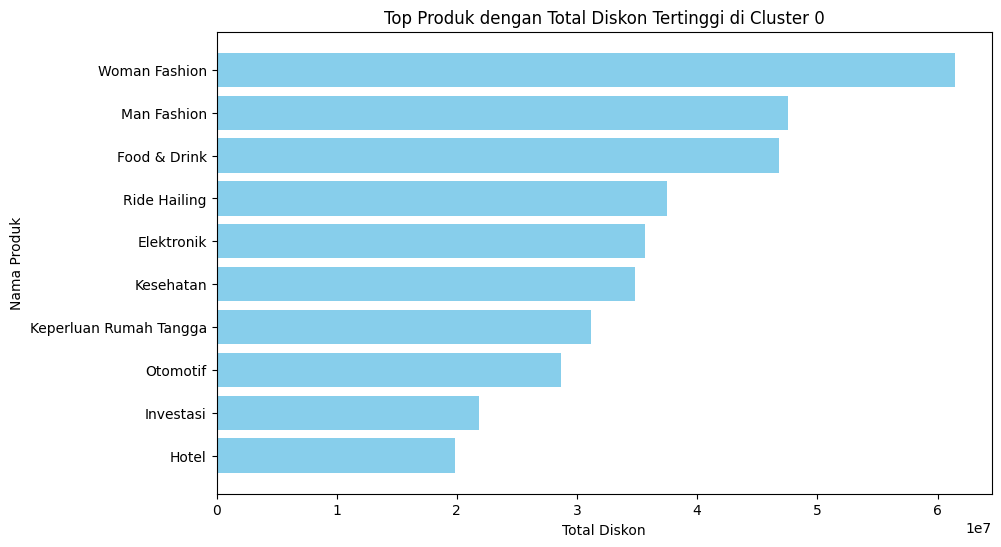

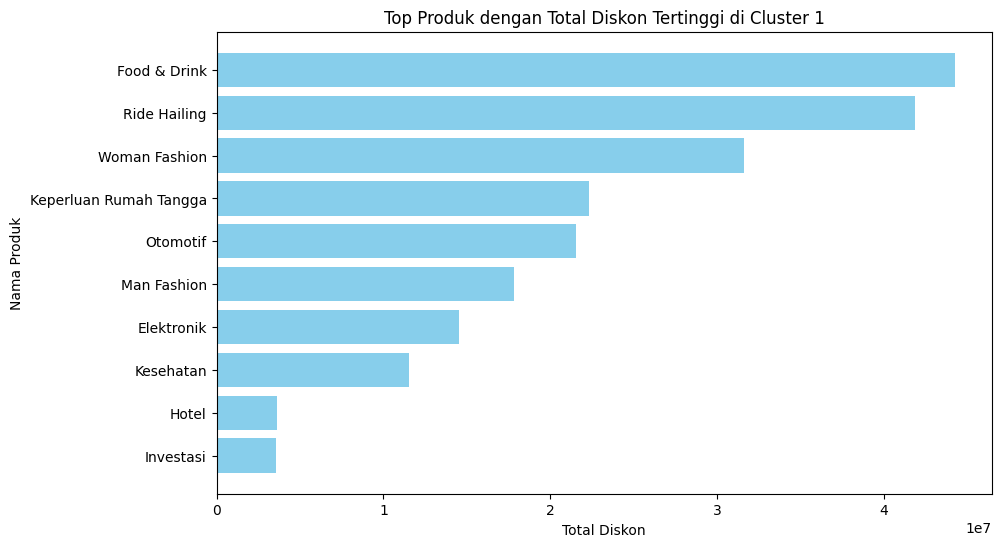

In [ ]:
# Mengelompokkan data berdasarkan cluster
clusters = df_province['cluster'].unique()

for cluster in clusters:
    # Memfilter data untuk setiap cluster
    cluster_data = df_province[df_province['cluster'] == cluster]

    # Menghitung total diskon per produk
    discount_by_product = cluster_data.groupby('product name')['discounts'].sum().reset_index()
    discount_by_product.columns = ['product_name', 'total_discount']

    # Mengurutkan produk berdasarkan total diskon terbanyak
    discount_by_product_sorted = discount_by_product.sort_values(by='total_discount', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(discount_by_product_sorted['product_name'], discount_by_product_sorted['total_discount'], color='skyblue')
    plt.xlabel('Total Diskon')
    plt.ylabel('Nama Produk')
    plt.title(f'Top Produk dengan Total Diskon Tertinggi di Cluster {cluster}')
    plt.gca().invert_yaxis()  # agar produk dengan total diskon tertinggi muncul di atas
    plt.show()

#### Top Produk by Total Discounts

In [ ]:
# Filter data dengan cluster = 1
cluster_1_data = df_province[df_province['cluster'] == 1]

# Menghitung total discounts per produk
total_discount_by_product = cluster_1_data.groupby('product name')[['discounts', 'nett_amount']].sum().reset_index()

# Mengurutkan produk berdasarkan total discounts tertinggi ke terendah
total_discount_by_product_sorted = total_discount_by_product.sort_values(by='discounts', ascending=False)

# Menampilkan hasil
total_discount_by_product_sorted

,product name,discounts,nett_amount
1,Food & Drink,44222450.0,906915850.0
11,Ride Hailing,41865400.0,967944700.0
17,Woman Fashion,31617450.0,659264350.0
5,Keperluan Rumah Tangga,22324000.0,667372900.0
9,Otomotif,21513400.0,657970100.0
7,Man Fashion,17793100.0,385499900.0
0,Elektronik,14503400.0,425683300.0
6,Kesehatan,11531850.0,308124950.0
2,Hotel,3644250.0,79561150.0
3,Investasi,3583150.0,77527950.0


#### Top Produk by Total Non Discounts

In [ ]:
# Filter data dengan cluster = 0
cluster_0_data = df_province[df_province['cluster'] == 0]

# Menghitung total discounts per produk
total_non_discount_by_product = cluster_0_data.groupby('product name')[['discounts', 'nett_amount']].sum().reset_index()

# Mengurutkan produk berdasarkan total discounts tertinggi ke terendah
total_non_discount_by_product_sorted = total_non_discount_by_product.sort_values(by='discounts', ascending=False)

# Menampilkan hasil
total_non_discount_by_product_sorted

,product name,discounts,nett_amount
17,Woman Fashion,61424900.0,301909500.0
7,Man Fashion,47534650.0,244816150.0
1,Food & Drink,46824700.0,256807800.0
11,Ride Hailing,37465150.0,236125650.0
0,Elektronik,35630800.0,230219800.0
6,Kesehatan,34865450.0,220525150.0
5,Keperluan Rumah Tangga,31204700.0,260755500.0
9,Otomotif,28689600.0,227106500.0
3,Investasi,21865550.0,125435050.0
2,Hotel,19818450.0,108769950.0


## Mean Insight (Discounts)

### Avg Discounts Amount / Cluster

In [ ]:
# Menghitung jumlah total 'promo_amount' dan 'transaction_id' untuk setiap 'Cluster'
total_promo_amount_per_cluster = df_province.groupby('cluster')['discounts'].sum()
total_transaction_count_per_cluster = df_province.groupby('cluster')['transaction_id'].nunique()

# Menggabungkan kedua Series tersebut
promo_amount_per_cluster = pd.DataFrame({'Total_Promo_Amount': total_promo_amount_per_cluster, 'Total_Orders': total_transaction_count_per_cluster})
promo_amount_per_cluster.reset_index(inplace=True)

# Membuat kolom baru yang berisi rata-rata 'promo_amount' per 'transaction_id' di setiap 'Cluster'
promo_amount_per_cluster['Avg_Promo_Amount'] = promo_amount_per_cluster['Total_Promo_Amount'] / promo_amount_per_cluster['Total_Orders']

promo_amount_per_cluster


,cluster,Total_Promo_Amount,Total_Orders,Avg_Promo_Amount
0,0,420766200.0,151385,2779.444463
1,1,216283100.0,42665,5069.333177


### Avg Discounts Amount / Cluster (Discounts)

In [ ]:
# Menghitung jumlah total 'discounts' dan 'transaction_id' untuk setiap 'Cluster' dengan is_discounted = 1
filtered_df = df_province[df_province['is_discounted'] == 1]
total_discounts_amount_per_cluster = filtered_df.groupby('cluster')['discounts'].sum()
total_transaction_count_per_cluster = filtered_df.groupby('cluster')['transaction_id'].nunique()

# Menggabungkan kedua Series tersebut
discounts_amount_per_cluster = pd.DataFrame({'Total_Promo_Amount': total_discounts_amount_per_cluster, 'Total_Orders_Use_Promo': total_transaction_count_per_cluster})
discounts_amount_per_cluster.reset_index(inplace=True)

# Membuat kolom baru yang berisi rata-rata 'promo_amount' per 'transaction_id' di setiap 'Cluster'
discounts_amount_per_cluster['Avg_Discounts_Amount_Per_Transaction'] = discounts_amount_per_cluster['Total_Promo_Amount'] / promo_amount_per_cluster['Total_Orders_Use_Promo']

discounts_amount_per_cluster


,cluster,Total_Promo_Amount,Total_Orders_Use_Promo,Avg_Discounts_Amount_Per_Booking
0,0,420766400.0,39508,10650.156930
1,1,216283100.0,15193,14235.707234


### Avg Total Spending Order/ Cluster

In [ ]:
import pandas as pd

# Menghitung total item_price dan jumlah transaction_id keseluruhan
totals = df_province.groupby('cluster').agg({
    'gross_amount': 'sum',      # Menghitung total item_price secara keseluruhan
    'transaction_id': 'nunique'     # Menghitung total transaction_id secara keseluruhan
})

# Menghitung rata-rata item_price untuk semua transaction
average_s = totals['gross_amount'] / totals['transaction_id']

print("Rata-rata Spending untuk tiap cluster:", average_s)


Rata-rata Spending untuk tiap cluster: cluster
0     17259.688873
1    122923.832181
dtype: float64


### Avg Total Spending Order / Cluster (Discounts)

In [ ]:
import pandas as pd

filtere_df = df_province[df_province['Flag Promo'] == 1]

# Menghitung total item_price dan jumlah transaction_id keseluruhan
totals = filtere_df.groupby('cluster').agg({
    'nett_amount': 'sum',      # Menghitung total_amount secara keseluruhan
    'transaction_id': 'nunique'     # Menghitung total transaction_id secara keseluruhan
})

# Menghitung rata-rata item_price untuk semua transaction
average_s = totals['nett_amount'] / transaction_id']

print("Rata-rata Spending untuk tiap cluster:", average_s)


Rata-rata Spending untuk tiap cluster: cluster
0     16713.068239
1    118042.842098
dtype: float64


In [ ]:
# Mengelompokkan berdasarkan 'product name' dan menjumlahkan 'total_amount'
grouped_total_amount = df_province.groupby('product name')['nett_amount'].sum().reset_index()

grouped_total_amount


,product name,nett_amount
0,Elektronik,6.559031e+08
1,Food & Drink,1.163724e+09
2,Hotel,1.883311e+08
3,Investasi,2.029630e+08
4,Keperluan Anak,8.653170e+07
5,Keperluan Rumah Tangga,9.281284e+08
6,Kesehatan,5.286501e+08
7,Man Fashion,6.303160e+08
8,Other,4.785835e+07
9,Otomotif,8.850766e+08


### Avg Burn Rate / Cluster

In [ ]:
import pandas as pd

# Menghitung total item_price dan jumlah transaction_id keseluruhan
totals = df_province.groupby('cluster').agg({
    'burn_rate_percentage': 'sum',      # Menghitung total item_price secara keseluruhan
    'transaction_id': 'nunique'     # Menghitung total transaction_id secara keseluruhan
})

# Menghitung rata-rata item_price untuk semua transaction
average_s = totals['burn_rate_percentage'] / totals['transaction_id']

print("Rata-rata Spending untuk tiap cluster:", average_s)


Rata-rata Spending untuk tiap cluster: cluster
0    15.877201
1     3.972387
dtype: float64


In [ ]:
import pandas as pd

filtered_df = df_province[df_province['is_discounted'] == 1]

# Menghitung total item_price dan jumlah transaction_id keseluruhan
totals = filtered_df.groupby('cluster').agg({
    'burn_rate_percentage': 'sum',      # Menghitung total item_price secara keseluruhan
    'transaction_id': 'nunique'     # Menghitung total transaction_id secara keseluruhan
})

# Menghitung rata-rata item_price untuk semua transaction
average_s = totals['burn_rate_percentage'] / totals['transaction_id']

print("Rata-rata Spending untuk tiap cluster:", average_s)


Rata-rata Spending untuk tiap cluster: cluster
0    60.789464
1    11.155263
dtype: float64


In [ ]:
df_province

,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
0,TRX2546436,SC3328132013002,2,11300.0,11300.0,2024-08-29,33,Woman Fashion,ENI,perempuan,...,JAWA TENGAH,1,0.0,1,37,422,100.000000,2.934510,3,0
1,TRX967487,SC3309112009023,11,4100.0,0.0,2024-06-11,33,Top Up Game,FATIMAH SRI,perempuan,...,JAWA TENGAH,0,4100.0,0,32,382,0.000000,-0.498908,2,0
2,TRX2343869,SC3317102024016,10,2200.0,0.0,2024-10-30,33,"Transportasi (Kereta, Pesawat, Kapal)",SARIFAH YUDHISTI DHINI ARIZA,perempuan,...,JAWA TENGAH,0,2200.0,0,54,403,0.000000,-0.498908,4,0
3,TRX2228415,SC3327042009005,15,2300.0,0.0,2024-06-27,33,Investasi,SUHARTI NURAZIZAH,perempuan,...,JAWA TENGAH,0,2300.0,0,33,419,0.000000,-0.498908,2,0
4,TRX1039999,SC3329102009022,7,3800.0,0.0,2024-09-02,33,Keperluan Anak,HESTY KONTERIUS,perempuan,...,JAWA TENGAH,0,3800.0,0,25,415,0.000000,-0.498908,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209319,TRX765134,SC1609152003002,10,3300.0,0.0,2024-06-14,16,"Transportasi (Kereta, Pesawat, Kapal)",ALLEGRA LOUSIANA,perempuan,...,SUMATERA SELATAN,0,3300.0,0,20,408,0.000000,-0.498908,2,0
209320,TRX536558,SC1674062004004,1,1300.0,0.0,2024-10-03,16,Man Fashion,NINU JOHAN,laki-laki,...,SUMATERA SELATAN,0,1300.0,0,29,415,0.000000,-0.498908,4,0
209321,TRX585576,SC1606062008002,13,1000.0,0.0,2024-10-13,16,Pulsa,RACHMAH MOORINA,perempuan,...,SUMATERA SELATAN,0,1000.0,0,34,391,0.000000,-0.498908,4,0
209322,TRX574347,SC1603152003002,1,4300.0,0.0,2024-09-15,16,Man Fashion,ANITA BUNGSU,perempuan,...,SUMATERA SELATAN,0,4300.0,0,23,445,0.000000,-0.498908,3,0


### Avg Burn Rate / Cluster (Discounts)

In [ ]:
cluster_summary = df_province.select_dtypes(include=['number']).groupby('cluster').mean()  # Rata-rata fitur untuk setiap klaster
print(cluster_summary)

         product_id   gross_amount    discounts   money_spent         refund  \
cluster                                                                        
0          8.872219   18298.765253  2538.053962  1.851556e+06  161818.823402   
1          5.949335  125418.074918  4967.343423  1.912488e+06  157958.475919   

         wallet_balance  is_discounted    nett_amount  free_gift        age  \
cluster                                                                       
0         567306.388472       0.243203   15760.711291   0.068716  35.251479   
1         549236.237110       0.351255  120450.731494   0.000000  35.307549   

         days_since_joined  burn_rate_percentage  burn_rate_zscore   periode  
cluster                                                                       
0               409.019501             14.498291         -0.001121  2.524185  
1               409.411704              3.892467         -0.365264  2.515376  


In [ ]:
selected_columns = ['burn_rate_percentage', 'discounts', 'nett_amount']
selected_cluster_summary = cluster_summary[selected_columns]
selected_cluster_summary

,burn_rate_percentage,discounts,nett_amount
cluster,,,
0,14.498291,2538.053962,15760.711291
1,3.892467,4967.343423,120450.731494


In [ ]:
# Melihat dataset hanya untuk Cluster 0
cluster_0_data = df_province[df_province['cluster'] == 0]

# Menampilkan data hasil
cluster_0_data.head(10)

In [ ]:
# Melihat dataset hanya untuk Cluster 1
cluster_1_data = df_province[df_province['cluster'] == 1]

# Menampilkan data hasil
cluster_1_data.head(10)


,transaction_id,user_id,product_id,gross_amount,discounts,transaction_date,kode provinsi,product name,full_name,gender,...,nama_provinsi,is_discounted,nett_amount,free_gift,age,days_since_joined,burn_rate_percentage,burn_rate_zscore,periode,cluster
6,TRX793936,SC3302012008017,5,150400.0,0.0,2024-04-29,33,Keperluan Rumah Tangga,DIAN,perempuan,...,JAWA TENGAH,0,150400.0,0,44,429,0.000000,-0.498908,2,1
12,TRX1661077,SC3310042010006,1,150400.0,0.0,2024-11-20,33,Man Fashion,"AHMAD FIRDAUS S.I.P., M.Si.",laki-laki,...,JAWA TENGAH,0,150400.0,0,39,407,0.000000,-0.498908,4,1
14,TRX1385257,SC3320022007017,17,150400.0,0.0,2024-01-23,33,Hotel,DWI ROBUNI,perempuan,...,JAWA TENGAH,0,150400.0,0,30,382,0.000000,-0.498908,1,1
15,TRX2641746,SC3323052004005,3,150400.0,16250.0,2024-03-26,33,Food & Drink,AGUSTINUS,laki-laki,...,JAWA TENGAH,1,134150.0,0,55,418,10.804521,-0.127944,1,1
16,TRX1296739,SC3315152004008,14,150400.0,16250.0,2024-12-09,33,Kesehatan,JOHAN OKTAVIANI,perempuan,...,JAWA TENGAH,1,134150.0,0,34,417,10.804521,-0.127944,4,1
21,TRX2464486,SC3314122010008,2,142100.0,0.0,2024-07-09,33,Woman Fashion,"AISAH URIFAH S.H., M.Kn.",perempuan,...,JAWA TENGAH,0,142100.0,0,48,430,0.000000,-0.498908,3,1
28,TRX1982879,SC3308112009009,3,150400.0,16250.0,2024-06-19,33,Food & Drink,DIANA LISA,perempuan,...,JAWA TENGAH,1,134150.0,0,44,431,10.804521,-0.127944,2,1
34,TRX2570028,SC3328152013018,3,150400.0,0.0,2024-09-17,33,Food & Drink,KD NURUL,perempuan,...,JAWA TENGAH,0,150400.0,0,26,449,0.000000,-0.498908,3,1
37,TRX2638374,SC3323102006004,3,109100.0,0.0,2024-04-24,33,Food & Drink,NURUL MAHDIA M.E.,perempuan,...,JAWA TENGAH,0,109100.0,0,44,373,0.000000,-0.498908,2,1
40,TRX1597442,SC3324132014002,8,118900.0,0.0,2024-08-23,33,Elektronik,"SIALLAGAN TIKA S.Ag., M.M.",perempuan,...,JAWA TENGAH,0,118900.0,0,51,367,0.000000,-0.498908,3,1


In [ ]:
df_province['cluster'].value_counts()

cluster
0    165783
1     43541
Name: count, dtype: int64

# Submission File

In [ ]:
df_province.to_csv('/content/drive/MyDrive/Tim 26B Final Project Drive/Dataset Clustering.csv', index=False)

In [ ]:
df_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209324 entries, 0 to 209323
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transaction_id        209324 non-null  object        
 1   user_id               209324 non-null  object        
 2   product_id            209324 non-null  int64         
 3   gross_amount          209324 non-null  float64       
 4   discounts             209324 non-null  float64       
 5   transaction_date      209324 non-null  datetime64[ns]
 6   kode provinsi         209324 non-null  object        
 7   product name          209324 non-null  object        
 8   full_name             209324 non-null  object        
 9   gender                209324 non-null  object        
 10  money_spent           209324 non-null  float64       
 11  refund                209324 non-null  float64       
 12  wallet_balance        209324 non-null  float64       
 13 